In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

#### Select Ameriflux merged stations with GEESEBAL 
Criteria of selection
1. Dry/wet
2. Landcover difference(Same climate preferably) 
3. High Elev/low elev

### List of stations 
1. US-Bi1 (Elev: -2.7, Wetland, Csa, California, 3mm avg ET)
2. US-Var (Elev: 129, Grassland, Csa, California, 0.97mm avg ET )
3. US-Wkg (Elev: 1531, Grassland, Bsk, Arizona, 1.05mm avg ET )
4. US-Whs  (Elev: 1370, Open shrublands, Bsk, Arizona, 0.88m avg ET )
5. US-tw3 (Elev: 361, cropland(maize etc), Dfa, Nebraska, 3.01mm avg ET )
6. US-Ne2 (Elev 362, cropland(maize soybean), Dfa, Nebraska, 2.79mm avg ET)

In [2]:
### Read daily files directly 
dir_daily="D:\\Backup\\Rouhin_Lenovo\\US_project\\GEE_SEBAL_Project\\Csv_Files\Merge_inst_sebal_daily\\"
bi1_d=pd.read_csv(dir_daily+"US-Bi1.csv",parse_dates=["Date"])
var_d=pd.read_csv(dir_daily+"US-Var.csv",parse_dates=["Date"])
wkg_d=pd.read_csv(dir_daily+"US-Wkg.csv",parse_dates=["Date"])
whs_d=pd.read_csv(dir_daily+"US-Whs.csv",parse_dates=["Date"])
ne1_d=pd.read_csv(dir_daily+"US-Ne1.csv",parse_dates=["Date"])
ne2_d=pd.read_csv(dir_daily+"US-Ne2.csv",parse_dates=["Date"])
tw3_d=pd.read_csv(dir_daily+"US-Tw3.csv",parse_dates=["Date"])



In [3]:
## Convert the files to a dictionary and process
## Convert LE to mm/day and remove SEBAL -ves
daily_data={"bi1": bi1_d, "var": var_d, "wkg":wkg_d,"whs":whs_d,"ne1":ne1_d,"ne2":ne2_d,"tw3":tw3_d}
# cols=[bi1_cols,var_cols,wkg_cols,whs_cols,ne1_cols,ne2_cols,tw3_d]
for i, key in enumerate(daily_data):
    # print(daily_data[key]["LE_closed".iloc[0]].dropna().shape)
    daily_data[key]["LE_closed"]=daily_data[key]["LE_closed"]/28.36
    daily_data[key]=daily_data[key][daily_data[key]["ET_24h"]>=0]
    daily_data[key]=daily_data[key].sort_values(by="Date")

### Scatter plots of daily ET... (6-->2each )


In [4]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(( Y_Predicted-Y_actual)/Y_actual)*100
    return mape
from sklearn.metrics import mean_squared_error 
def rmse(Y_actual,Y_Predicted):
    return mean_squared_error(Y_actual,Y_Predicted,squared=False)

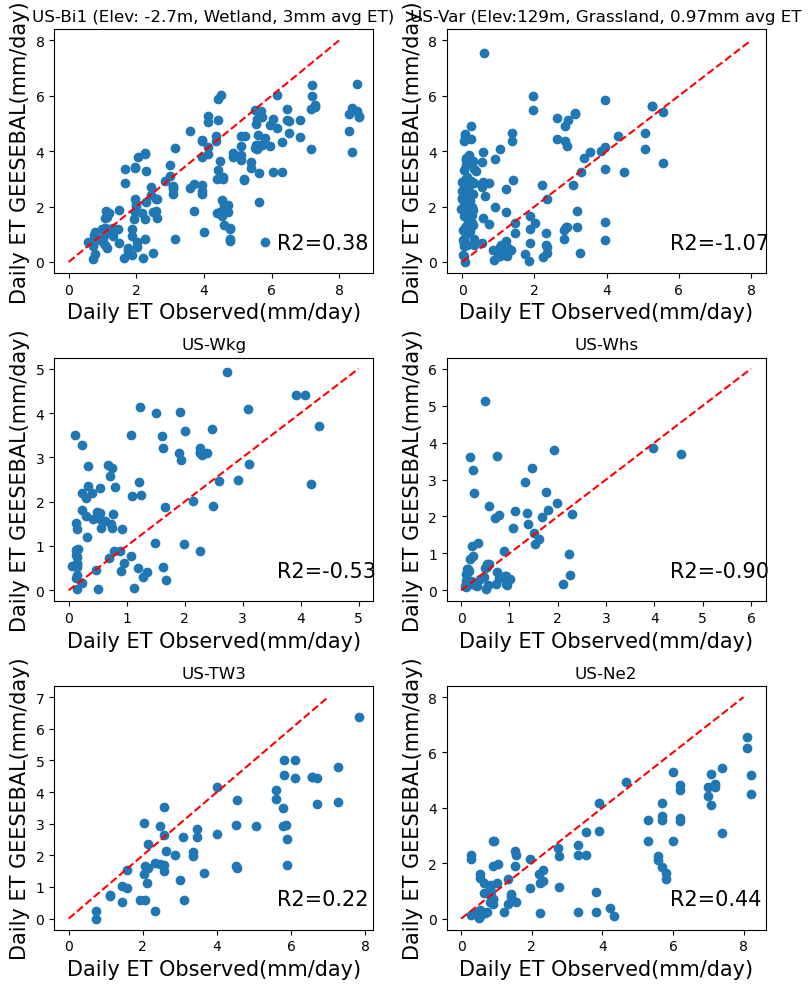

In [5]:
# create a 3x2 grid of subplots
from sklearn.metrics import r2_score
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 10))

# plot data in the first subplot
ax = axes[0, 0]
ax.plot(daily_data["bi1"]["LE_closed"], daily_data["bi1"]["ET_24h"],"o")
ax.plot(np.linspace(0,8,3),np.linspace(0,8,3), ls='--', c='r')
x=daily_data["bi1"][(daily_data["bi1"]["LE_closed"].notna()) & (daily_data["bi1"]["ET_24h"].notna())]["LE_closed"]
y=daily_data["bi1"][(daily_data["bi1"]["LE_closed"].notna()) & (daily_data["bi1"]["ET_24h"].notna())]["ET_24h"]
bias_bi1=MAPE(x,y)
rmse_bi1=rmse(x,y)
r2 = r2_score(x, y)
ax.annotate(f'R2={r2:.2f}', xy=(0.7, 0.1), xycoords='axes fraction',fontsize=15)
ax.set_ylabel("Daily ET GEESEBAL(mm/day)",fontsize=15)
ax.set_xlabel("Daily ET Observed(mm/day)",fontsize=15)

ax.set_title('US-Bi1 (Elev: -2.7m, Wetland, 3mm avg ET)')

# plot data in the second subplot
ax = axes[0, 1]
ax.plot(daily_data["var"]["LE_closed"], daily_data["var"]["ET_24h"],"o")
ax.plot(np.linspace(0,8,3),np.linspace(0,8,3), ls='--', c='r')
x=daily_data["var"][(daily_data["var"]["LE_closed"].notna()) & (daily_data["var"]["ET_24h"].notna())]["LE_closed"]
y=daily_data["var"][(daily_data["var"]["LE_closed"].notna()) & (daily_data["var"]["ET_24h"].notna())]["ET_24h"]
bias_var=MAPE(x,y)
rmse_var=rmse(x,y)
r2 = r2_score(x, y)
ax.annotate(f'R2={r2:.2f}', xy=(0.7, 0.1), xycoords='axes fraction',fontsize=15)
ax.set_title('US-Var (Elev:129m, Grassland, 0.97mm avg ET')
ax.set_ylabel("Daily ET GEESEBAL(mm/day)",fontsize=15)
ax.set_xlabel("Daily ET Observed(mm/day)",fontsize=15)

# plot data in the third subplot
ax = axes[1, 0]
ax.plot(daily_data["wkg"]["LE_closed"], daily_data["wkg"]["ET_24h"],"o")
ax.plot(np.linspace(0,5,3),np.linspace(0,5,3), ls='--', c='r')
x=daily_data["wkg"][(daily_data["wkg"]["LE_closed"].notna()) & (daily_data["wkg"]["ET_24h"].notna())]["LE_closed"]
y=daily_data["wkg"][(daily_data["wkg"]["LE_closed"].notna()) & (daily_data["wkg"]["ET_24h"].notna())]["ET_24h"]
bias_wkg=MAPE(x,y)
rmse_wkg=rmse(x,y)
r2 = r2_score(x, y)
ax.annotate(f'R2={r2:.2f}', xy=(0.7, 0.1), xycoords='axes fraction',fontsize=15)
ax.set_title('US-Wkg')
ax.set_ylabel("Daily ET GEESEBAL(mm/day)",fontsize=15)
ax.set_xlabel("Daily ET Observed(mm/day)",fontsize=15)

# plot data in the fourth subplot
ax = axes[1, 1]
ax.plot(daily_data["whs"]["LE_closed"], daily_data["whs"]["ET_24h"],"o")
ax.plot(np.linspace(0,6,3),np.linspace(0,6,3), ls='--', c='r')
x=daily_data["whs"][(daily_data["whs"]["LE_closed"].notna()) & (daily_data["whs"]["ET_24h"].notna())]["LE_closed"]
y=daily_data["whs"][(daily_data["whs"]["LE_closed"].notna()) & (daily_data["whs"]["ET_24h"].notna())]["ET_24h"]
bias_whs=MAPE(x,y)
rmse_whs=rmse(x,y)
r2 = r2_score(x, y)
ax.annotate(f'R2={r2:.2f}', xy=(0.7, 0.1), xycoords='axes fraction',fontsize=15)
ax.set_title('US-Whs')
ax.set_ylabel("Daily ET GEESEBAL(mm/day)",fontsize=15)
ax.set_xlabel("Daily ET Observed(mm/day)",fontsize=15)

# plot data in the fifth subplot
ax = axes[2, 0]
ax.plot(daily_data["tw3"]["LE_closed"], daily_data["tw3"]["ET_24h"],"o")
ax.plot(np.linspace(0,7,3),np.linspace(0,7,3), ls='--', c='r')
x=daily_data["tw3"][(daily_data["tw3"]["LE_closed"].notna()) & (daily_data["tw3"]["ET_24h"].notna())]["LE_closed"]
y=daily_data["tw3"][(daily_data["tw3"]["LE_closed"].notna()) & (daily_data["tw3"]["ET_24h"].notna())]["ET_24h"]
bias_ne1=MAPE(x,y)
rmse_ne1=rmse(x,y)
r2 = r2_score(x, y)
ax.annotate(f'R2={r2:.2f}', xy=(0.7, 0.1), xycoords='axes fraction',fontsize=15)
ax.set_title('US-TW3')
ax.set_ylabel("Daily ET GEESEBAL(mm/day)",fontsize=15)
ax.set_xlabel("Daily ET Observed(mm/day)",fontsize=15)

# plot data in the sixth subplot
ax = axes[2, 1]
ax.plot(daily_data["ne2"]["LE_closed"], daily_data["ne2"]["ET_24h"],"o")
x=daily_data["ne2"][(daily_data["ne2"]["LE_closed"].notna()) & (daily_data["ne2"]["ET_24h"].notna())]["LE_closed"]
y=daily_data["ne2"][(daily_data["ne2"]["LE_closed"].notna()) & (daily_data["ne2"]["ET_24h"].notna())]["ET_24h"]
bias_ne2=MAPE(x,y)
rmse_ne2=rmse(x,y)
r2 = r2_score(x, y)
ax.annotate(f'R2={r2:.2f}', xy=(0.7, 0.1), xycoords='axes fraction',fontsize=15)
ax.set_title('US-Ne2')
ax.plot(np.linspace(0,8,3),np.linspace(0,8,3), ls='--', c='r')
ax.set_ylabel("Daily ET GEESEBAL(mm/day)",fontsize=15)
ax.set_xlabel("Daily ET Observed(mm/day)",fontsize=15)
# set spacing between subplots
fig.tight_layout()

# display the plot
plt.show()



In [152]:
print("Bias of daily ET stations in order",bias_bi1, bias_var,bias_wkg,bias_whs,bias_ne1,bias_ne2)
print("RMSE of daily ET stations in order",rmse_bi1, rmse_var,rmse_wkg,rmse_whs,rmse_ne1,rmse_ne2)

Bias of daily ET stations in order -19.053299432429657 46.4408889346712 219.00956641160363 138.56219194555493 -34.315419914624854 -2.3510458799553344
RMSE of daily ET stations in order 1.6596869305031459 2.095232034877117 1.2975671599879286 1.2154581050413609 1.7018881143400824 1.8940225137475828


In [6]:
### Time series plot
import datetime
import matplotlib.dates as mdates
from matplotlib.dates import MonthLocator, DateFormatter

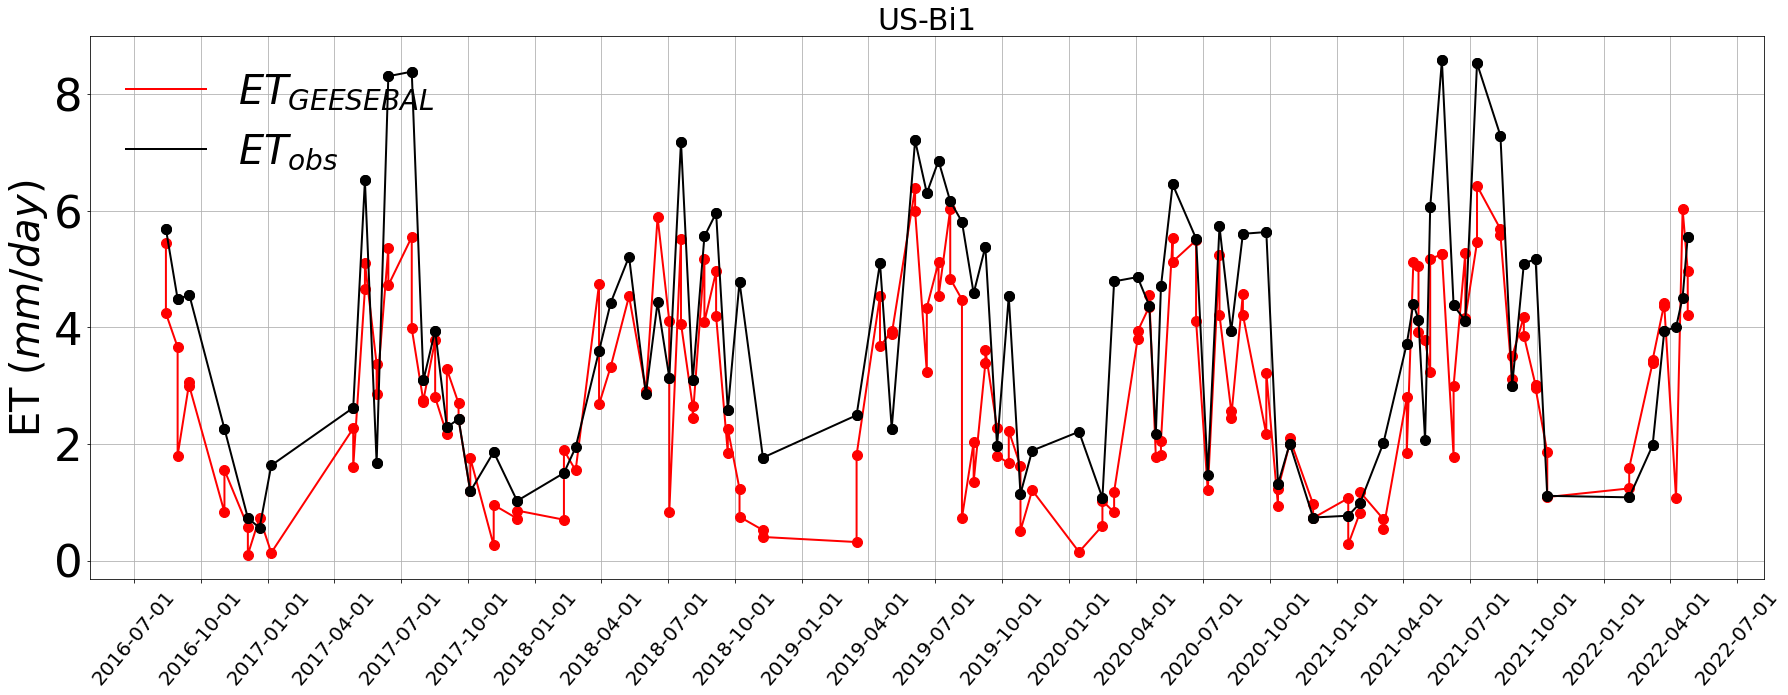

In [154]:
fig,ax=plt.subplots(figsize=(30,10))
date_format = mdates.DateFormatter('%d\n%b')
##
# x=daily_data["bi1"][(daily_data["bi1"][cols[0]["LE"].iloc[0]].notna()) & (daily_data["bi1"]["ET_24h"].notna())]["LE_closed"]
# y=daily_data["bi1"][(daily_data["bi1"]["LE_closed"].notna()) & (daily_data["bi1"]["ET_24h"].notna())]["ET_24h"]
ax.plot(daily_data["bi1"]["Date"],daily_data["bi1"]['ET_24h'],c="r",label="$ET_{GEESEBAL}$",linewidth=2)
ax.plot(daily_data["bi1"]["Date"],daily_data["bi1"]['ET_24h'],"o",c="r",markersize=10)
ax.plot(daily_data["bi1"]["Date"],daily_data["bi1"]["LE_closed"],c="k",label="$ET_{obs}$",linewidth=2)
ax.plot(daily_data["bi1"]["Date"],daily_data["bi1"]["LE_closed"],"o",c="k",markersize=10)
ax.xaxis.set_major_locator(MonthLocator(interval=90))
ax.set_ylabel("ET ($mm/day$)",fontsize=40)
ax.grid()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
# ax.set_xticklabels(["May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],fontsize=45)
ax.set_title("US-Bi1",fontsize=30)
# # ax.set_ylim(20,220)
plt.xticks(fontsize=20,rotation=50)
plt.yticks(fontsize=45)
# plt.xticks(fontsize=25)
ax.legend(fontsize=40,loc="upper left",frameon=False)

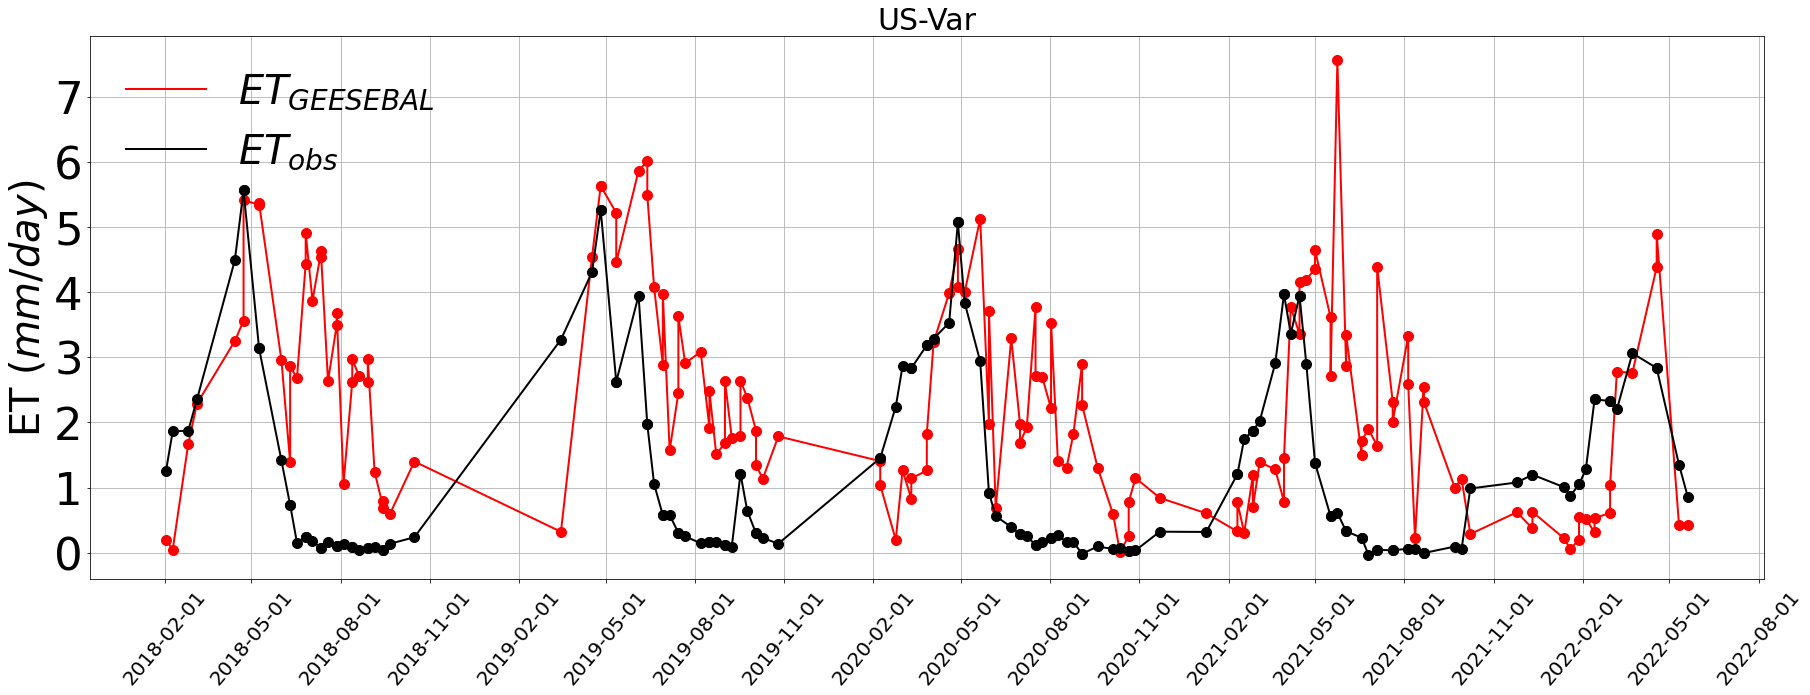

In [155]:
fig,ax=plt.subplots(figsize=(30,10))
date_format = mdates.DateFormatter('%d\n%b')
##
# x=daily_data["bi1"][(daily_data["bi1"][cols[0]["LE"].iloc[0]].notna()) & (daily_data["bi1"]["ET_24h"].notna())][cols[0]["LE"].iloc[0]]
# y=daily_data["bi1"][(daily_data["bi1"][cols[0]["LE"].iloc[0]].notna()) & (daily_data["bi1"]["ET_24h"].notna())]["ET_24h"]
ax.plot(daily_data["var"]["Date"],daily_data["var"]['ET_24h'],c="r",label="$ET_{GEESEBAL}$",linewidth=2)
ax.plot(daily_data["var"]["Date"],daily_data["var"]['ET_24h'],"o",c="r",markersize=10)
ax.plot(daily_data["var"]["Date"],daily_data["var"]["LE_closed"],c="k",label="$ET_{obs}$",linewidth=2)
ax.plot(daily_data["var"]["Date"],daily_data["var"]["LE_closed"],"o",c="k",markersize=10)

ax.xaxis.set_major_locator(MonthLocator(interval=90))
ax.set_ylabel("ET ($mm/day$)",fontsize=40)

ax.grid()

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
# ax.set_xticklabels(["May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],fontsize=45)
ax.set_title("US-Var",fontsize=30)

# # ax.set_ylim(20,220)
plt.xticks(fontsize=20,rotation=50)
plt.yticks(fontsize=45)
# plt.xticks(fontsize=25)
ax.legend(fontsize=40,loc="upper left",frameon=False)

NameError: name 'cols' is not defined

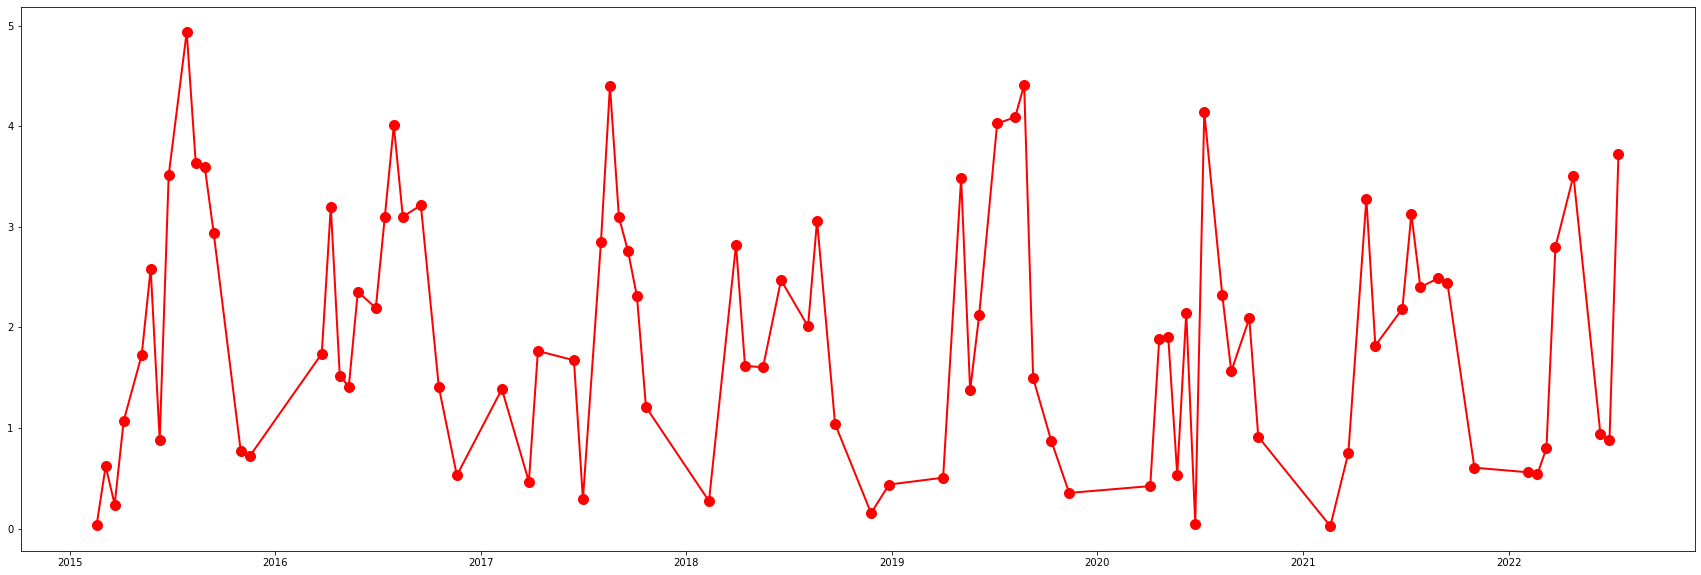

In [156]:
fig,ax=plt.subplots(figsize=(30,10))
date_format = mdates.DateFormatter('%d\n%b')
##
# x=daily_data["bi1"][(daily_data["bi1"][cols[0]["LE"].iloc[0]].notna()) & (daily_data["bi1"]["ET_24h"].notna())][cols[0]["LE"].iloc[0]]
# y=daily_data["bi1"][(daily_data["bi1"][cols[0]["LE"].iloc[0]].notna()) & (daily_data["bi1"]["ET_24h"].notna())]["ET_24h"]
ax.plot(daily_data["wkg"]["Date"],daily_data["wkg"]['ET_24h'],c="r",label="$ET_{GEESEBAL}$",linewidth=2)
ax.plot(daily_data["wkg"]["Date"],daily_data["wkg"]['ET_24h'],"o",c="r",markersize=10)
ax.plot(daily_data["wkg"]["Date"],daily_data["wkg"][cols[2]["LE"].iloc[0]],c="k",label="$ET_{obs}$",linewidth=2)
ax.plot(daily_data["wkg"]["Date"],daily_data["wkg"][cols[2]["LE"].iloc[0]],"o",c="k",markersize=10)

ax.xaxis.set_major_locator(MonthLocator(interval=90))
ax.set_ylabel("ET ($mm/day$)",fontsize=40)

ax.grid()

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
# ax.set_xticklabels(["May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],fontsize=45)
ax.set_title("US-Wkg",fontsize=30)

# # ax.set_ylim(20,220)
plt.xticks(fontsize=20,rotation=50)
plt.yticks(fontsize=45)
# plt.xticks(fontsize=25)
ax.legend(fontsize=40,loc="upper left",frameon=False)

NameError: name 'cols' is not defined

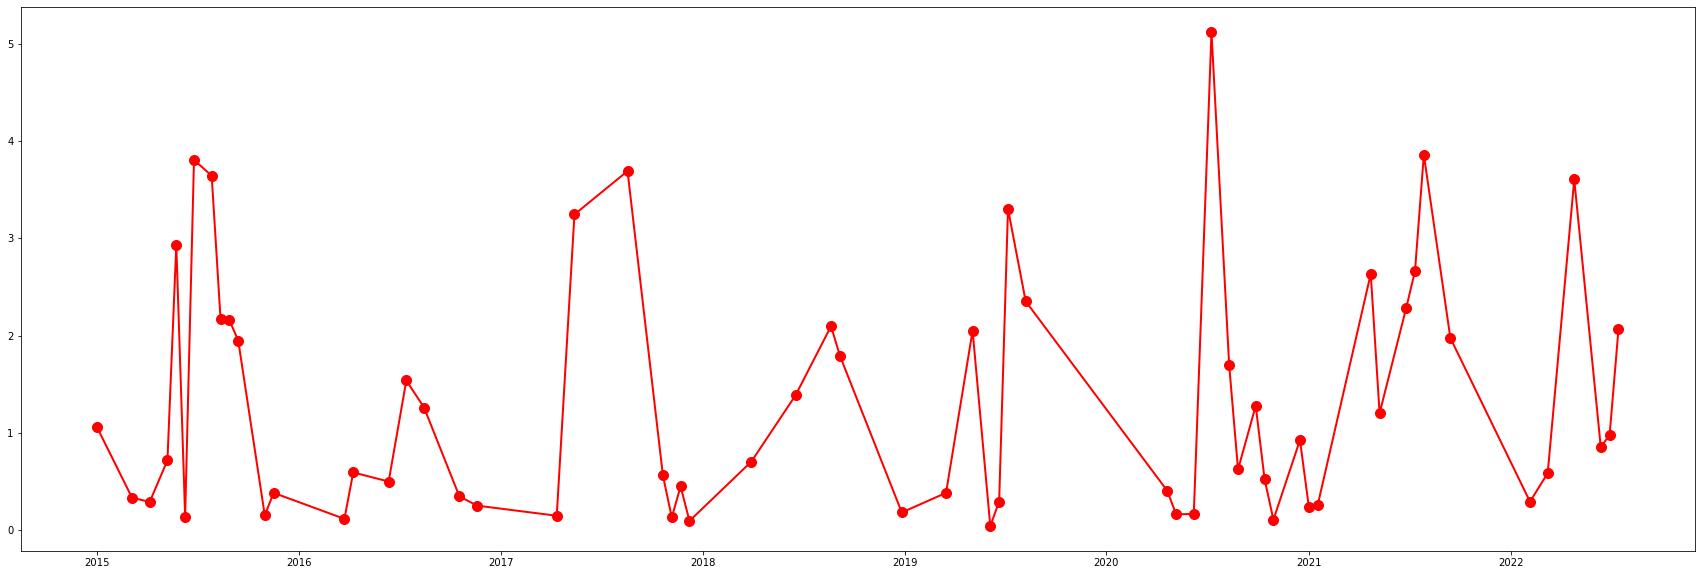

In [157]:
fig,ax=plt.subplots(figsize=(30,10))
date_format = mdates.DateFormatter('%d\n%b')
##
# x=daily_data["bi1"][(daily_data["bi1"][cols[0]["LE"].iloc[0]].notna()) & (daily_data["bi1"]["ET_24h"].notna())][cols[0]["LE"].iloc[0]]
# y=daily_data["bi1"][(daily_data["bi1"][cols[0]["LE"].iloc[0]].notna()) & (daily_data["bi1"]["ET_24h"].notna())]["ET_24h"]
ax.plot(daily_data["whs"]["Date"],daily_data["whs"]['ET_24h'],c="r",label="$ET_{GEESEBAL}$",linewidth=2)
ax.plot(daily_data["whs"]["Date"],daily_data["whs"]['ET_24h'],"o",c="r",markersize=10)
ax.plot(daily_data["whs"]["Date"],daily_data["whs"][cols[3]["LE"].iloc[0]],c="k",label="$ET_{obs}$",linewidth=2)
ax.plot(daily_data["whs"]["Date"],daily_data["whs"][cols[3]["LE"].iloc[0]],"o",c="k",markersize=10)
ax.xaxis.set_major_locator(MonthLocator(interval=90))
ax.set_ylabel("ET ($mm/day$)",fontsize=40)

ax.grid()

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
# ax.set_xticklabels(["May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],fontsize=45)
ax.set_title("US-Whs",fontsize=30)

# # ax.set_ylim(20,220)
plt.xticks(fontsize=20,rotation=50)
plt.yticks(fontsize=45)
# plt.xticks(fontsize=25)
ax.legend(fontsize=40,loc="upper left",frameon=False)

NameError: name 'cols' is not defined

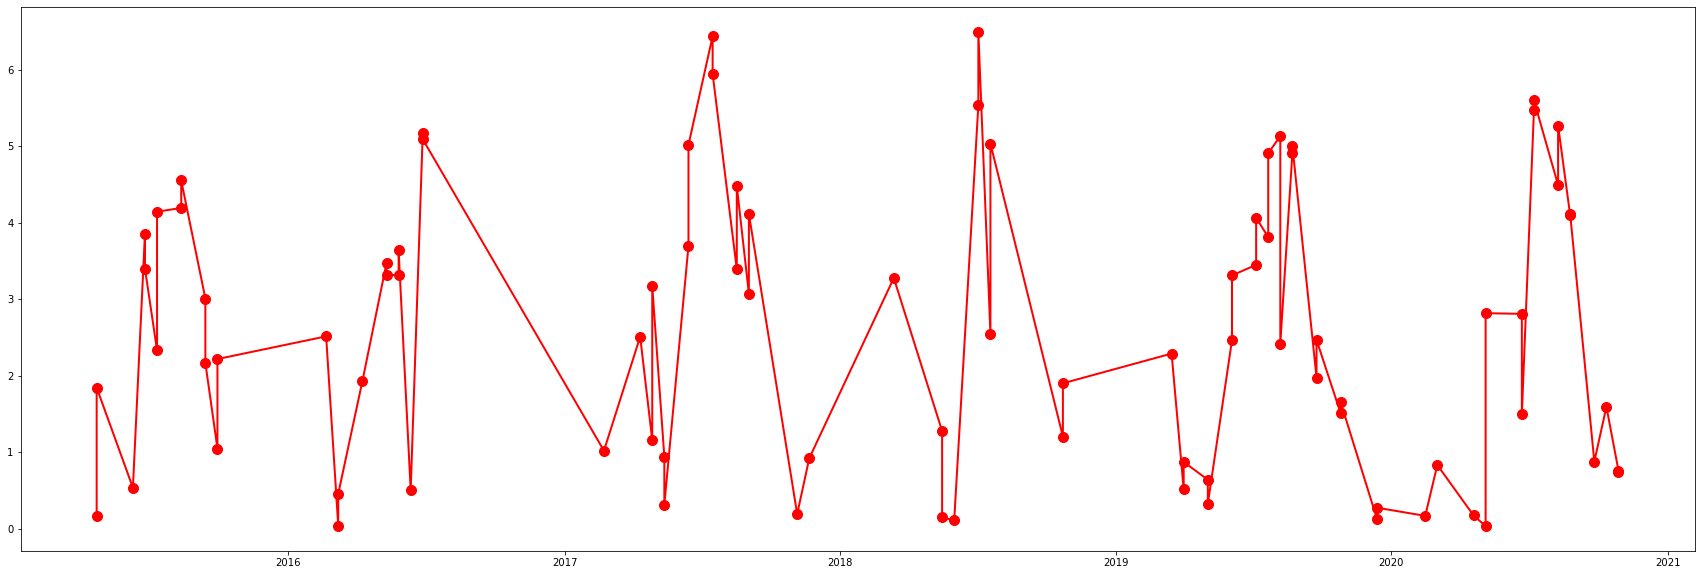

In [158]:
fig,ax=plt.subplots(figsize=(30,10))
date_format = mdates.DateFormatter('%d\n%b')
##
# x=daily_data["bi1"][(daily_data["bi1"][cols[0]["LE"].iloc[0]].notna()) & (daily_data["bi1"]["ET_24h"].notna())][cols[0]["LE"].iloc[0]]
# y=daily_data["bi1"][(daily_data["bi1"][cols[0]["LE"].iloc[0]].notna()) & (daily_data["bi1"]["ET_24h"].notna())]["ET_24h"]
ax.plot(daily_data["ne1"]["Date"],daily_data["ne1"]['ET_24h'],c="r",label="$ET_{GEESEBAL}$",linewidth=2)
ax.plot(daily_data["ne1"]["Date"],daily_data["ne1"]['ET_24h'],"o",c="r",markersize=10)
ax.plot(daily_data["ne1"]["Date"],daily_data["ne1"][cols[4]["LE"].iloc[0]],c="k",label="$ET_{obs}$",linewidth=2)
ax.plot(daily_data["ne1"]["Date"],daily_data["ne1"][cols[4]["LE"].iloc[0]],"o",c="k",markersize=10)
ax.xaxis.set_major_locator(MonthLocator(interval=90))
ax.set_ylabel("ET ($mm/day$)",fontsize=40)

ax.grid()

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
# ax.set_xticklabels(["May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],fontsize=45)
ax.set_title("US-Ne1",fontsize=30)

# # ax.set_ylim(20,220)
plt.xticks(fontsize=20,rotation=50)
plt.yticks(fontsize=45)
# plt.xticks(fontsize=25)
ax.legend(fontsize=40,loc="upper left",frameon=False)

NameError: name 'cols' is not defined

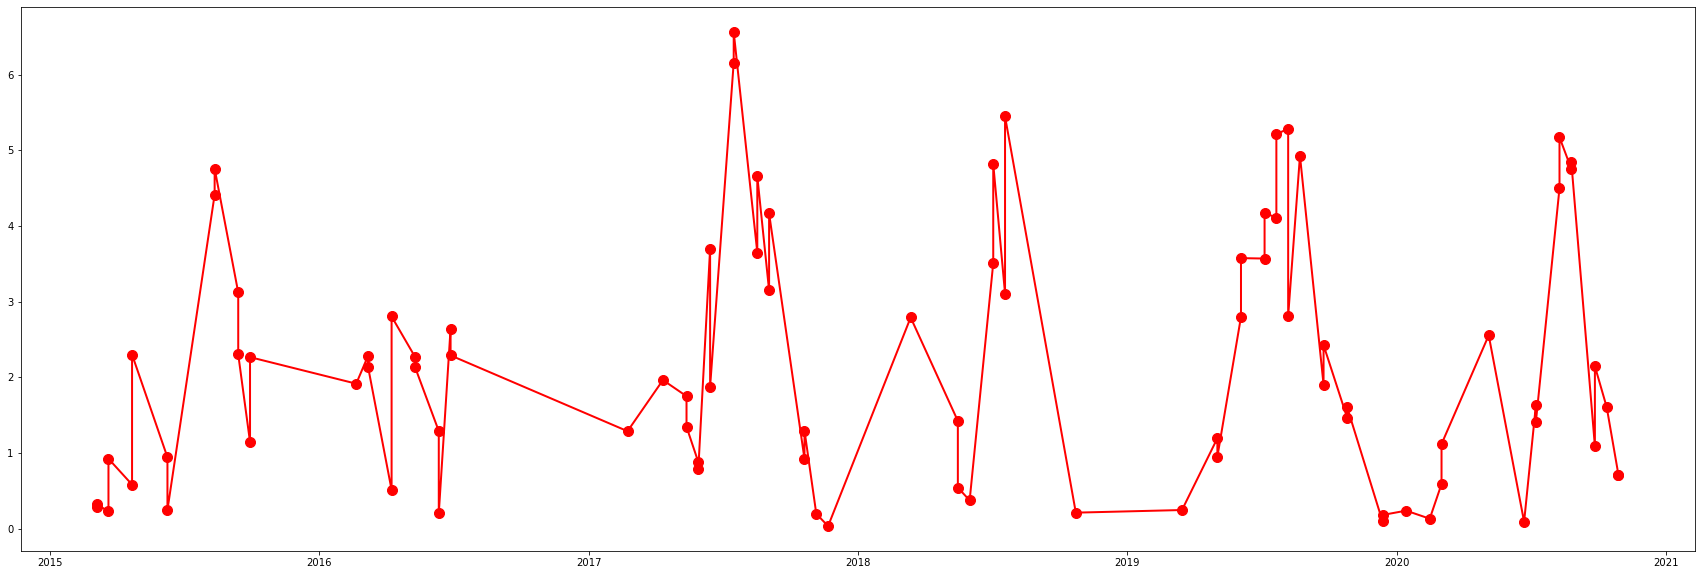

In [159]:
fig,ax=plt.subplots(figsize=(30,10))
date_format = mdates.DateFormatter('%d\n%b')
##
# x=daily_data["bi1"][(daily_data["bi1"][cols[0]["LE"].iloc[0]].notna()) & (daily_data["bi1"]["ET_24h"].notna())][cols[0]["LE"].iloc[0]]
# y=daily_data["bi1"][(daily_data["bi1"][cols[0]["LE"].iloc[0]].notna()) & (daily_data["bi1"]["ET_24h"].notna())]["ET_24h"]
ax.plot(daily_data["ne2"]["Date"],daily_data["ne2"]['ET_24h'],c="r",label="$ET_{GEESEBAL}$",linewidth=2)
ax.plot(daily_data["ne2"]["Date"],daily_data["ne2"]['ET_24h'],"o",c="r",markersize=10)
ax.plot(daily_data["ne2"]["Date"],daily_data["ne2"][cols[5]["LE"].iloc[0]],c="k",label="$ET_{obs}$",linewidth=2)
ax.plot(daily_data["ne2"]["Date"],daily_data["ne2"][cols[5]["LE"].iloc[0]],"o",c="k",markersize=10)
ax.xaxis.set_major_locator(MonthLocator(interval=90))
ax.set_ylabel("ET ($mm/day$)",fontsize=40)

ax.grid()

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
# ax.set_xticklabels(["May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],fontsize=45)
ax.set_title("US-Ne2",fontsize=30)

# # ax.set_ylim(20,220)
plt.xticks(fontsize=20,rotation=50)
plt.yticks(fontsize=45)
# plt.xticks(fontsize=25)
ax.legend(fontsize=40,loc="upper left",frameon=False)

### Observations
Most likely we observe that in relatively wet conditions, the model performs decently well. However for drier conditions the low points are overestimated and the peask are not well captured. Test this for a station in hot summer climate but located over dry land. 
SWC is secondary study where, we see that higher swc means errors are low on a n average but we can test that for specific daily conditions

In [160]:
print("Bi1 swc",daily_data["bi1"]["SWC_PI_1"].mean(),daily_data["bi1"]["SWC_PI_1"].dropna().shape )
print("Var swc",daily_data["var"]['SWC_PI_F_1_1_A'].mean(), daily_data["var"]['SWC_PI_F_1_1_A'].dropna().shape)
print("Wkg swc", daily_data["wkg"]['SWC_1_1_1'].mean(),  daily_data["wkg"]['SWC_1_1_1'].dropna().shape)
print('whs swc', daily_data["whs"]['SWC_1_1_1'].mean(),daily_data["whs"]['SWC_1_1_1'].dropna().shape)
print("Ne1 swc", daily_data["ne1"]['SWC_PI_F_1_1_1'].mean(),daily_data["ne1"]['SWC_PI_F_1_1_1'].dropna().shape)
print("Ne2 swc", daily_data["ne2"]['SWC_PI_F_1_1_1'].mean(), daily_data["ne2"]['SWC_PI_F_1_1_1'].dropna().shape)



Bi1 swc 14.913010754838709 (155,)
Var swc 11.663128636363638 (154,)
Wkg swc 10.057901364935066 (77,)
whs swc 5.103618317869812 (53,)
Ne1 swc 31.51590909090909 (88,)
Ne2 swc 27.477011494252867 (87,)


### Analysis 2 (Error propagation)
Objective: To see if the error proagates through the inability of the model to capture instantaneous ET accurately

NameError: name 'merged_inst' is not defined

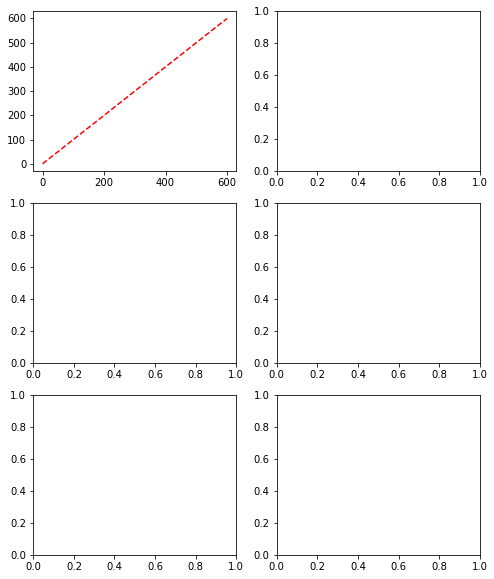

In [161]:
# create a 3x2 grid of subplots
from sklearn.metrics import r2_score
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 10))

# plot data in the first subplot
ax = axes[0, 0]
# ax.plot(merged_inst["bi1"][cols[0]["LE"].iloc[0]], merged_inst["bi1"]["LEinst"],"o")
ax.plot(np.linspace(0,600,3),np.linspace(0,600,3), ls='--', c='r')
x=merged_inst["bi1"][(merged_inst["bi1"][cols[0]["LE"].iloc[0]].notna()) & (merged_inst["bi1"]["LEinst"].notna())][cols[0]["LE"].iloc[0]]
y=merged_inst["bi1"][(merged_inst["bi1"][cols[0]["LE"].iloc[0]].notna()) & (merged_inst["bi1"]["LEinst"].notna())]["LEinst"]
ax.plot(merged_inst["bi1"][cols[0]["LE"].iloc[0]], merged_inst["bi1"]["LEinst"],"o")
bias_bi1=MAPE(x,y)
rmse_bi1=rmse(x,y)
r2 = r2_score(x, y)
ax.annotate(f'R2={r2:.2f}', xy=(0.7, 0.1), xycoords='axes fraction',fontsize=15)
ax.set_ylabel("Inst ET GEESEBAL(W/m2)",fontsize=15)
ax.set_xlabel("Inst ET Observed(W/m2)",fontsize=15)

ax.set_title('US-Bi1 (Elev: -2.7m, Wetland, 3mm avg ET)')

# plot data in the second subplot
ax = axes[0, 1]
# ax.plot(merged_inst["var"][cols[1]["LE"].iloc[0]], merged_inst["var"]["LEinst"],"o")
ax.plot(np.linspace(0,400,3),np.linspace(0,400,3), ls='--', c='r')
x=merged_inst["var"][(merged_inst["var"][cols[1]["LE"].iloc[0]].notna()) & (merged_inst["var"]["LEinst"].notna())][cols[1]["LE"].iloc[0]]
y=merged_inst["var"][(merged_inst["var"][cols[1]["LE"].iloc[0]].notna()) & (merged_inst["var"]["LEinst"].notna())]["LEinst"]
ax.plot(x, y,"o")

bias_var=MAPE(x,y)
rmse_var=rmse(x,y)
r2 = r2_score(x, y)
ax.annotate(f'R2={r2:.2f}', xy=(0.7, 0.1), xycoords='axes fraction',fontsize=15)
ax.set_title('US-Var (Elev:129m, Grassland, 0.97mm avg ET')
ax.set_ylabel("Inst ET GEESEBAL(W/m2)",fontsize=15)
ax.set_xlabel("Inst ET Observed(W/m2)",fontsize=15)

# plot data in the third subplot
ax = axes[1, 0]
# ax.plot(merged_inst["wkg"][cols[2]["LE"].iloc[0]], merged_inst["wkg"]["LEinst"],"o")
ax.plot(np.linspace(0,400,3),np.linspace(0,400,3), ls='--', c='r')
x=merged_inst["wkg"][(merged_inst["wkg"][cols[2]["LE"].iloc[0]].notna()) & (merged_inst["wkg"]["LEinst"].notna())][cols[2]["LE"].iloc[0]]
y=merged_inst["wkg"][(merged_inst["wkg"][cols[2]["LE"].iloc[0]].notna()) & (merged_inst["wkg"]["LEinst"].notna())]["LEinst"]
bias_wkg=MAPE(x,y)
rmse_wkg=rmse(x,y)
r2 = r2_score(x, y)

ax.plot(x, y,"o")

ax.annotate(f'R2={r2:.2f}', xy=(0.7, 0.1), xycoords='axes fraction',fontsize=15)
ax.set_title('US-Wkg')
ax.set_ylabel("Inst ET GEESEBAL(W/m2)",fontsize=15)
ax.set_xlabel("Inst ET Observed(W/m2)",fontsize=15)

# plot data in the fourth subplot
ax = axes[1, 1]
ax.plot(merged_inst["whs"][cols[3]["LE"].iloc[0]], merged_inst["whs"]["LEinst"],"o")
ax.plot(np.linspace(0,350,3),np.linspace(0,350,3), ls='--', c='r')
x=merged_inst["whs"][(merged_inst["whs"][cols[3]["LE"].iloc[0]].notna()) & (merged_inst["whs"]["LEinst"].notna())][cols[3]["LE"].iloc[0]]
y=merged_inst["whs"][(merged_inst["whs"][cols[3]["LE"].iloc[0]].notna()) & (merged_inst["whs"]["LEinst"].notna())]["LEinst"]
bias_whs=MAPE(x,y)
rmse_whs=rmse(x,y)
r2 = r2_score(x, y)
ax.annotate(f'R2={r2:.2f}', xy=(0.7, 0.1), xycoords='axes fraction',fontsize=15)
ax.set_title('US-Whs')
ax.set_ylabel("Inst ET GEESEBAL(W/m2)",fontsize=15)
ax.set_xlabel("Inst ET Observed(W/m2)",fontsize=15)

# plot data in the fifth subplot
ax = axes[2, 0]
ax.plot(np.linspace(0,600,3),np.linspace(0,600,3), ls='--', c='r')
x=merged_inst["ne1"][(merged_inst["ne1"][cols[4]["LE"].iloc[0]].notna()) & (merged_inst["ne1"]["LEinst"].notna())][cols[4]["LE"].iloc[0]]
y=merged_inst["ne1"][(merged_inst["ne1"][cols[4]["LE"].iloc[0]].notna()) & (merged_inst["ne1"]["LEinst"].notna())]["LEinst"]
ax.plot(merged_inst["ne1"][cols[4]["LE"].iloc[0]], merged_inst["ne1"]["LEinst"],"o")

bias_ne1=MAPE(x,y)
rmse_ne1=rmse(x,y)
r2 = r2_score(x, y)
ax.annotate(f'R2={r2:.2f}', xy=(0.7, 0.1), xycoords='axes fraction',fontsize=15)
ax.set_title('US-Ne1')
ax.set_ylabel("Inst ET GEESEBAL(W/m2)",fontsize=15)
ax.set_xlabel("Inst ET Observed(W/m2)",fontsize=15)

# plot data in the sixth subplot
ax = axes[2, 1]
x=merged_inst["ne2"][(merged_inst["ne2"][cols[5]["LE"].iloc[0]].notna()) & (merged_inst["ne2"]["LEinst"].notna())][cols[5]["LE"].iloc[0]]
y=merged_inst["ne2"][(merged_inst["ne2"][cols[5]["LE"].iloc[0]].notna()) & (merged_inst["ne2"]["LEinst"].notna())]["LEinst"]
ax.plot(merged_inst["ne2"][cols[5]["LE"].iloc[0]], merged_inst["ne2"]["LEinst"],"o")

bias_ne2=MAPE(x,y)
rmse_ne2=rmse(x,y)
r2 = r2_score(x, y)
ax.annotate(f'R2={r2:.2f}', xy=(0.7, 0.1), xycoords='axes fraction',fontsize=15)
ax.set_title('US-Ne2')
ax.plot(np.linspace(0,500,3),np.linspace(0,500,3), ls='--', c='r')
ax.set_ylabel("Inst ET GEESEBAL(W/m2)",fontsize=15)
ax.set_xlabel("Inst ET Observed(W/m2)",fontsize=15)
# set spacing between subplots
fig.tight_layout()

# display the plot
plt.show()



### Get errors in LE upscaling
(there is no correction applied to LEinst but corrections are only applied to daily vals)
- Observed LE/Rn inst 
- Observed LE/Rn daily 
- Simulated ETfrac
- Observed ET frac using ETo values (Still need to see how to do that)

Plot the hourly variation of LE,EF and Rn

In [ ]:
## read instantaneous data 
op_dir="C:\\Rouhin_Lenovo\\US_project\\GEE_SEBAL_Project\\Csv_Files\\Processed_AF_SEBAL\\"
var_inst=pd.read_csv(op_dir+"US-Var.csv")
bi1_inst=pd.read_csv(op_dir+"US-Bi1.csv")
var_inst.columns

Index(['Unnamed: 0', 'TIMESTAMP_START', 'TIMESTAMP_END', 'FC', 'CO2',
       'CO2_SIGMA', 'LE', 'H2O', 'H2O_SIGMA', 'H', 'T_SONIC', 'T_SONIC_SIGMA',
       'WD', 'WS', 'USTAR', 'W_SIGMA', 'U_SIGMA', 'V_SIGMA', 'TA', 'VPD_PI',
       'RH', 'PA', 'TS_PI_1_1_A', 'TS_PI_1_2_A', 'TS_PI_1_3_A', 'TS_PI_1_4_A',
       'TS_PI_1_5_A', 'SWC_PI_1_1_A', 'SWC_PI_1_2_A', 'SWC_PI_1_3_A', 'P',
       'ZL', 'G_PI_1_1_A', 'NETRAD', 'SW_IN_1_1_1', 'PPFD_IN', 'PPFD_OUT',
       'SW_IN_1_1_2', 'SW_OUT', 'LW_IN', 'LW_OUT', 'PPFD_DIR', 'PPFD_DIF',
       'NEE_PI_F', 'GPP_PI_F', 'RECO_PI_F', 'FC_PI_F', 'LE_PI_F', 'H_PI_F',
       'TA_PI_F', 'VPD_PI_F', 'RH_PI_F', 'PA_PI_F', 'TS_PI_F_1_1_A',
       'TS_PI_F_1_2_A', 'TS_PI_F_1_3_A', 'TS_PI_F_1_4_A', 'TS_PI_F_1_5_A',
       'SWC_PI_F_1_1_A', 'SWC_PI_F_1_2_A', 'SWC_PI_F_1_3_A', 'P_PI_F', 'Name',
       'Long', 'Lat', 'Elevation', 'State', 'Timezone', 'Veg', 'Clim',
       'MAT (°C)', 'MAP (mm)', 'Datetime', 'Date', 'Time', 'doy', 'Albedo',
       'dec', 'dr', 'tao

In [ ]:
def process_amflux_hourly(df,SW_IN,SW_OUT, Tair_C,RH,WS,LE,G):
    df=df.copy()
    df["Datetime"]=pd.to_datetime(df["TIMESTAMP_START"],format = "%Y%m%d%H%M")
    df["Date"]=df["Datetime"].dt.date
    df["Time"]=df["Datetime"].dt.time
    df["doy"]=df["Datetime"].dt.dayofyear
    df=df[ df["Datetime"].dt.year>=2015]
    stef=2.04*10**(-10)
    #Calculate Rext
    ###**Rext is a hiccup
#     df["Rso"]=(0.75+2*(10**-5)*df[Elevation])*df["Rext"]
    ## Transmissivity
    ##---Es 
    # df["P_calc"]=101.3*((293-0.0065*elev)/293)**5.26
    # df["es"]=0.6108*np.exp((17.27*df[Tair_C])/(df[Tair_C]+237.3))
    # df["ea"]=df[RH]*df["es"]/100
    # df["W_calc"]=df["ea"]*0.14*df["P_calc"]*df["ea"]+2.1
    # df["Rso"]=(0.75+2*(10**-5)*elev)*df["Rext"]
    df["RS_Rso"]=df[SW_IN]/df["Rso"]
    df['RS_Rso'] = np.where(df['RS_Rso'].between(0.3,1), df['RS_Rso'],0)   
    df["f"]=1.35*df["RS_Rso"]-0.35
    df["Rns"]=0.0036*df[SW_IN]*(1-0.23)
    df["eps_dash"]=0.34-0.14*(df["ea"]**0.5)
    df["Rnl"]=-df["f"]*df["eps_dash"]*stef*(df[Tair_C]+273.15)**4
    df["Rn_fao"]=df["Rns"]+df["Rnl"]
    df["psychro"]=0.00163*df["P_calc"]/2.45
    df["del"]=(4098*df["es"])/((df[Tair_C]+237.3)**2)
    # df["G"]=
    df["ETo"]=(0.408*df["del"]*(df["Rn_fao"]-0.1*df["Rn_fao"])+((df["psychro"]*37/(df[Tair_C]+273))*df[WS]*(df["es"]-df["ea"])))/(df["del"]+df["psychro"]*(1+0.34*df[WS]))*28.36*24
    df["ET_frac_inst_obs"]=df[LE]/(df["NETRAD"]-df[G])
    return df
var_inst=process_amflux_hourly(var_inst,"SW_IN_1_1_1","SW_OUT","TA","RH","WS","LE","G_PI_1_1_A")


In [162]:
var_inst.columns

Index(['Unnamed: 0', 'TIMESTAMP_START', 'TIMESTAMP_END', 'FC', 'CO2',
       'CO2_SIGMA', 'LE', 'H2O', 'H2O_SIGMA', 'H',
       ...
       'Rns', 'eps_dash', 'Rnl', 'Rn_fao', 'psychro', 'del', 'ETo',
       'ET_frac_inst_obs', 'Datetime_Local', 'Datetime_GMT'],
      dtype='object', length=108)

In [163]:
print(var_sample.columns.tolist())

['Unnamed: 0', 'TIMESTAMP_START', 'TIMESTAMP_END', 'FC', 'CO2', 'CO2_SIGMA', 'LE', 'H2O', 'H2O_SIGMA', 'H', 'T_SONIC', 'T_SONIC_SIGMA', 'WD', 'WS', 'USTAR', 'W_SIGMA', 'U_SIGMA', 'V_SIGMA', 'TA', 'VPD_PI', 'RH', 'PA', 'TS_PI_1_1_A', 'TS_PI_1_2_A', 'TS_PI_1_3_A', 'TS_PI_1_4_A', 'TS_PI_1_5_A', 'SWC_PI_1_1_A', 'SWC_PI_1_2_A', 'SWC_PI_1_3_A', 'P', 'ZL', 'G_PI_1_1_A', 'NETRAD', 'SW_IN_1_1_1', 'PPFD_IN', 'PPFD_OUT', 'SW_IN_1_1_2', 'SW_OUT', 'LW_IN', 'LW_OUT', 'PPFD_DIR', 'PPFD_DIF', 'NEE_PI_F', 'GPP_PI_F', 'RECO_PI_F', 'FC_PI_F', 'LE_PI_F', 'H_PI_F', 'TA_PI_F', 'VPD_PI_F', 'RH_PI_F', 'PA_PI_F', 'TS_PI_F_1_1_A', 'TS_PI_F_1_2_A', 'TS_PI_F_1_3_A', 'TS_PI_F_1_4_A', 'TS_PI_F_1_5_A', 'SWC_PI_F_1_1_A', 'SWC_PI_F_1_2_A', 'SWC_PI_F_1_3_A', 'P_PI_F', 'Name', 'Long', 'Lat', 'Elevation', 'State', 'Timezone', 'Veg', 'Clim', 'MAT (°C)', 'MAP (mm)', 'Datetime', 'Date', 'Time', 'doy', 'Albedo', 'dec', 'dr', 'tao', 'Rext', 'Tao_sw_am', 'P_calc', 'es', 'ea', 'W_calc', 'Rso', 'gamma_dust', 'W_prata', 'zenith',

In [164]:
var_inst["Date"]=pd.to_datetime(var_inst["Date"])
var_sample=var_inst[var_inst["Date"]=="2020-05-21"]
var_sample[["Datetime","RS_Rso","Rext","SW_IN_1_1_1","Rn_fao","NETRAD","ETo","LE","ET_frac_inst_obs"]]
# var_sample["LE_1_1_1"]
# var_inst["Date"]=pd.to_datetime(var_inst["Date"])
var_sample1=var_inst[var_inst["Date"]=="2020-07-08"]
var_sample1[["Datetime","RS_Rso","Rext","SW_IN_1_1_1","Rn_fao","NETRAD","ETo","LE","ET_frac_inst_obs"]]
# var_sample["LE_1_1_1"]


,Datetime,RS_Rso,Rext,SW_IN_1_1_1,Rn_fao,NETRAD,ETo,LE,ET_frac_inst_obs
96720,2020-07-08 00:00:00,0.000000,-860.139614,0.0000,0.102468,-75.2350,49.868201,-2.58170,0.042464
96721,2020-07-08 00:30:00,0.000000,-860.139614,0.0000,0.102215,-79.0890,48.933754,-3.46270,0.053276
96722,2020-07-08 01:00:00,0.000000,-825.105594,0.0000,0.100976,-72.1400,44.943651,-2.66740,0.046080
96723,2020-07-08 01:30:00,0.000000,-825.105594,0.0000,0.100966,-75.8650,45.709354,-2.81690,0.045882
96724,2020-07-08 02:00:00,0.000000,-723.226573,0.0000,0.101095,-77.3210,51.276484,-3.20530,0.050981
96725,2020-07-08 02:30:00,0.000000,-723.226573,0.0000,0.100559,-75.5840,46.707078,-2.53410,0.041097
96726,2020-07-08 03:00:00,0.000000,-561.438440,0.0000,0.100431,-72.5440,45.856869,-1.39670,0.023861
96727,2020-07-08 03:30:00,0.000000,-561.438440,0.0000,0.100116,-69.0160,39.282589,-1.62870,0.029873
96728,2020-07-08 04:00:00,0.000000,-350.755678,NaN,NaN,-58.6650,NaN,NaN,NaN
96729,2020-07-08 04:30:00,0.000000,-350.755678,2.8169,0.104584,-59.1390,28.939876,1.67610,-0.040685


In [165]:
daily_data["var"][daily_data["var"]["Date"].dt.year==2020]
# daily_data["var"]["Date"].dt.year
# 5.91/(154.23-1.23) #var sample1
66/(187.27-4.95)
var_daytime=var_sample.set_index("Datetime").between_time('6:00', '18:30')
var_daytime["LE"].mean()/(var_daytime["NETRAD"].mean()-var_daytime["G_PI_1_1_A"].mean())
var_daytime1=var_sample1.set_index("Datetime").between_time('6:00', '18:30')
var_daytime1["LE"].mean()/(var_daytime1["NETRAD"].mean()-var_daytime1["G_PI_1_1_A"].mean())



0.0392771643691322

In [230]:
var_sample["ETo"]
var_sample1["ETo"]


96720     49.868201
96721     48.933754
96722     44.943651
96723     45.709354
96724     51.276484
96725     46.707078
96726     45.856869
96727     39.282589
96728           NaN
96729     28.939876
96730     42.247736
96731     77.099150
96732    131.098468
96733    180.445413
96734    238.592426
96735    301.870599
96736    358.259239
96737    416.131940
96738    466.092685
96739    520.166360
96740    551.967925
96741    596.678059
96742    624.915983
96743    642.643153
96744    652.728442
96745    662.199228
96746    648.502745
96747    627.024547
96748    608.529899
96749    580.881715
96750    533.937996
96751    497.267891
96752    441.156969
96753    314.974600
96754    345.636455
96755    231.584031
96756    236.245771
96757    131.848309
96758    114.246068
96759     71.633676
96760     28.977991
96761     42.373614
96762     44.066451
96763     40.080536
96764     46.542769
96765     35.469327
96766     42.558754
96767     41.247150
Name: ETo, dtype: float64

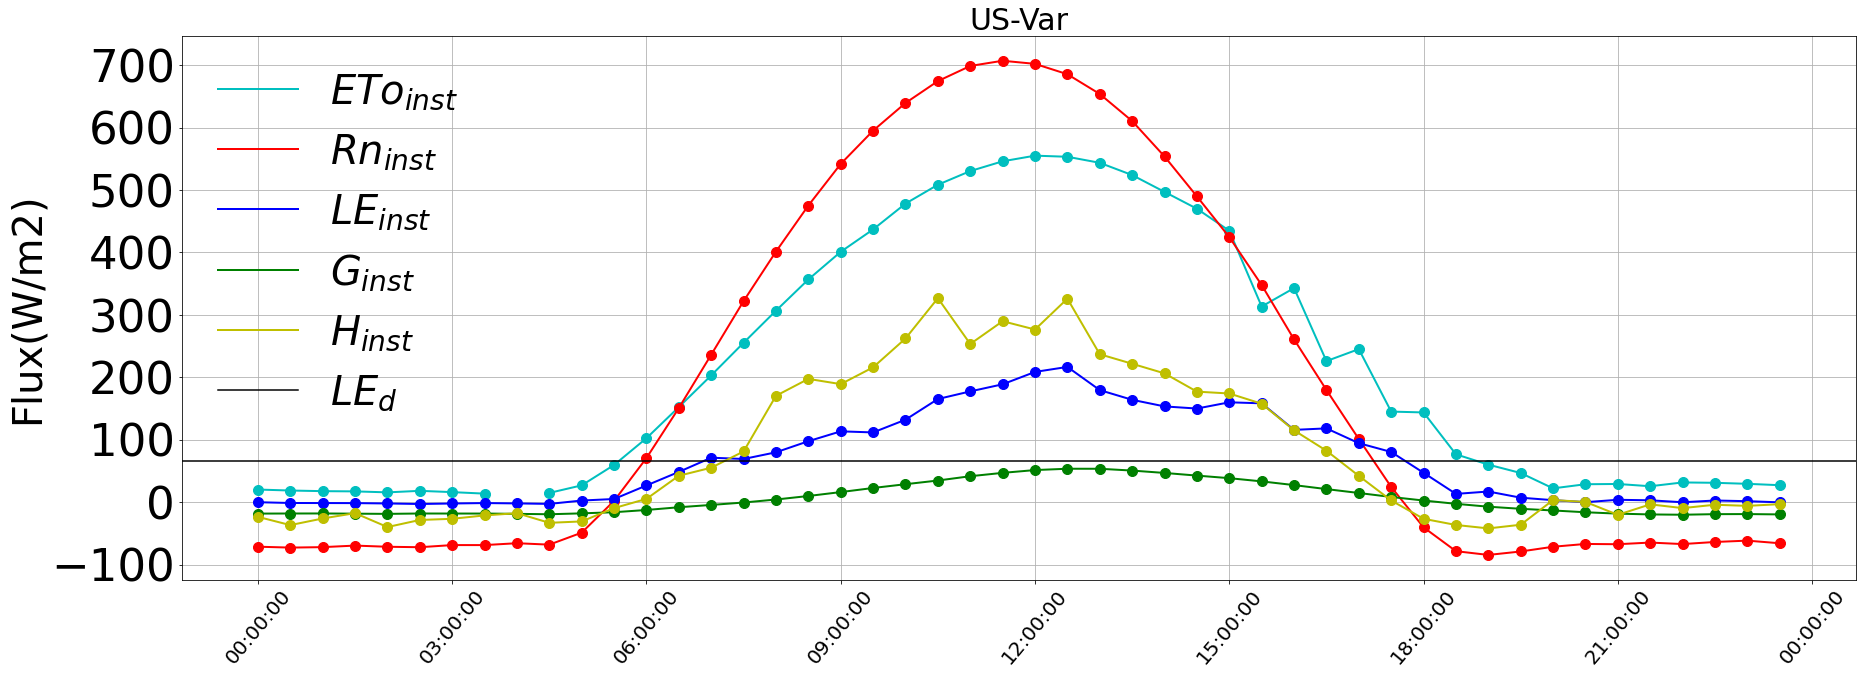

In [227]:
#### Plotting these (with G's i.e observed G's are not ideal and daily values have something)
import matplotlib.dates as mdates

fig,ax=plt.subplots(figsize=(30,10))

date_format = mdates.DateFormatter('%H:%M:%S')
##
# x=daily_data["bi1"][(daily_data["bi1"][cols[0]["LE"].iloc[0]].notna()) & (daily_data["bi1"]["ET_24h"].notna())][cols[0]["LE"].iloc[0]]
# y=daily_data["bi1"][(daily_data["bi1"][cols[0]["LE"].iloc[0]].notna()) & (daily_data["bi1"]["ET_24h"].notna())]["ET_24h"]
# ax.plot(var_sample["Datetime"],var_sample["Rn"],c="b",label="$ET_{a}$",linewidth=2)
# ax.plot(var_sample["Datetime"],var_sample["Rn"],"o",c="b",markersize=10)
ax.plot(var_sample["Datetime"],var_sample["ETo"],c="c",label="$ETo_{inst}$",linewidth=2)
ax.plot(var_sample["Datetime"],var_sample["ETo"],"o",c="c",markersize=10)
# ax.plot(var_sample["Datetime"],var_sample["Rn_fao"]*277.77,c="g",label="$ETo_{inst}$",linewidth=2)
# ax.plot(var_sample["Datetime"],var_sample["Rn_fao"]*277.77,"o",c="g",markersize=10)
ax.plot(var_sample["Datetime"],var_sample["NETRAD"],c="r",label="$Rn_{inst}$",linewidth=2)
ax.plot(var_sample["Datetime"],var_sample["NETRAD"],"o",c="r",markersize=10)
ax.plot(var_sample["Datetime"],var_sample["LE"],c="b",label="$LE_{inst}$",linewidth=2)
ax.plot(var_sample["Datetime"],var_sample["LE"],"o",c="b",markersize=10)
ax.plot(var_sample["Datetime"],var_sample["G_PI_1_1_A"],c="g",label="$G_{inst}$",linewidth=2)
ax.plot(var_sample["Datetime"],var_sample["G_PI_1_1_A"],"o",c="g",markersize=10)
ax.plot(var_sample["Datetime"],var_sample["H"],c="y",label="$H_{inst}$",linewidth=2)
ax.plot(var_sample["Datetime"],var_sample["H"],"o",c="y",markersize=10)

# ax.plot(var_sample["Datetime"],var_sample["Rext"],c="k",label="$ETo_{inst}$",linewidth=2)

# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['ET_frac_daily_obs_G'],"o",c="k",markersize=10)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['ET_frac_inst_obs'],c="g",label="$ETfrac_{inst}$",linewidth=2)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['ET_frac_inst_obs'],"o",c="g",markersize=10)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['SWC_PI_1_1_A'],"o",c="g",markersize=10)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['WS'],"o",c="g",markersize=10)

# ax.plot(daily_data["var"]["Date"],daily_data["var"]["ET_frac_sim"],c="r",label="$ETfrac_{sim}$",linewidth=2)
# ax.plot(daily_data["var"]["Date"],daily_data["var"]["ET_frac_sim"],"o",c="r",markersize=10)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]["EF"],c="r",label="$ETfrac_{model}$",linewidth=2)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]["EF"],"o",c="r",markersize=10)
# ax.set_ylim(-0.5,2)
# ax.xaxis.set_major_locator(MonthLocator(interval=90))
ax.set_ylabel("Flux(W/m2)",fontsize=40)
plt.axhline(66,color='k',label="$LE_{d}$")

ax.grid()

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
# ax.xaxis.set_major_locator(mdates.DateLocator(interval=1))
# ax.set_xticklabels(["May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],fontsize=45)
ax.set_title("US-Var",fontsize=30)

# # ax.set_ylim(20,220)
plt.xticks(fontsize=20,rotation=50)
plt.yticks(fontsize=45)
# plt.xticks(fontsize=25)
ax.legend(fontsize=40,loc="upper left",frameon=False)

In [109]:
daily_data["var"][daily_data["var"].Date.dt.year==2020][["Date","EF"]]
# daily_data["var"]["EF"]
# var_inst.groupby("date")
# var_daytime["LE"].mean()/(var_daytime["NETRAD"].mean()-var_daytime["G_PI_1_1_A"].mean())

daily_avg=[]
daytime_avg=[]
for i in var_inst.Date.unique():
    tmp=var_inst[var_inst.Date==i]
    daily_avg.append(tmp["LE"].mean()/(tmp["NETRAD"].mean()))
    tmp_day=tmp.set_index("Datetime").between_time('6:00', '18:30')
    daytime_avg.append(tmp_day["LE"].mean()/(tmp_day["NETRAD"].mean()-tmp_day["G_PI_1_1_A"].mean()))

    
# var_inst

In [198]:
date=pd.DataFrame(var_inst.Date.unique())
date.rename(columns={0:"Date"},inplace=True)
date["EF_daily"]=daily_avg
date["EF_daytime"]=daytime_avg
date["ETo_daily"]=var_inst.groupby("Date").mean().reset_index()["ETo"]

In [199]:
date

,Date,EF_daily,EF_daytime,ETo_daily
0,2015-01-01,1.767732,0.332236,51.297475
1,2015-01-02,1.394292,0.345572,53.915877
2,2015-01-03,1.001574,0.349642,54.782627
3,2015-01-04,1.097328,0.385445,46.130311
4,2015-01-05,0.755026,0.349317,53.118799
...,...,...,...,...
2697,2022-05-21,0.141361,0.110010,234.899803
2698,2022-05-22,0.146931,0.118099,247.136103
2699,2022-05-23,0.116582,0.094850,250.923571
2700,2022-05-24,0.133711,0.109603,260.838673


In [188]:
df_merge["Date"]

0     2018-02-02
1     2018-02-09
2     2018-02-25
3     2018-03-06
4     2018-04-14
         ...    
149   2022-03-24
150   2022-04-18
151   2022-04-18
152   2022-05-11
153   2022-05-20
Name: Date, Length: 154, dtype: datetime64[ns]

In [224]:
var_sample["LE"].mean()/(var_sample["NETRAD"].mean()-var_sample["G_PI_1_1_A"].mean())
# var_sample=var_sample[var_sample["LE"]>=0]
# var_sample["LE"].describe()
# var_sample["LE"].mean()/(var_sample["NETRAD"].mean()-var_sample["G_PI_1_1_A"].mean())
# var_sample["LE"].mean()
# var_sample["LE"].mean()
# var_sample
# var_sample["LE"].mean()/(var_sample["NETRAD"].mean())
# var_sample["LE"].describe()
var_sample["LE"].mean()

66.01855739583334

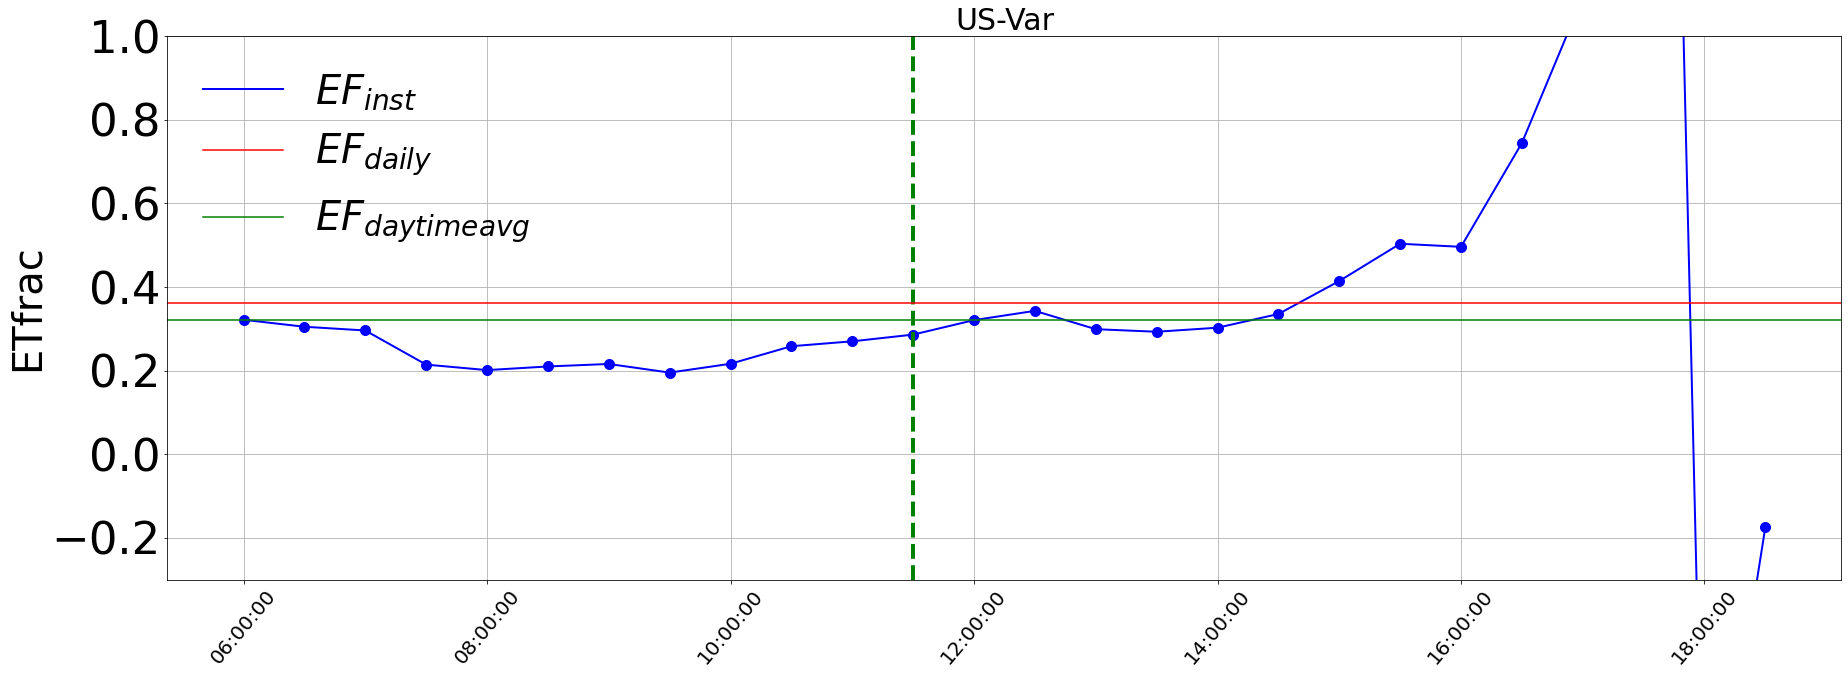

In [74]:

#### Plotting these (with G's i.e observed G's are not ideal and daily values have something)
import matplotlib.dates as mdates

fig,ax=plt.subplots(figsize=(30,10))

date_format = mdates.DateFormatter('%H:%M:%S')
##
# x=daily_data["bi1"][(daily_data["bi1"][cols[0]["LE"].iloc[0]].notna()) & (daily_data["bi1"]["ET_24h"].notna())][cols[0]["LE"].iloc[0]]
# y=daily_data["bi1"][(daily_data["bi1"][cols[0]["LE"].iloc[0]].notna()) & (daily_data["bi1"]["ET_24h"].notna())]["ET_24h"]
ax.plot(var_daytime.reset_index()["Datetime"],var_daytime.reset_index()["ET_frac_inst_obs"],c="b",label="$EF_{inst}$",linewidth=2)
ax.plot(var_daytime.reset_index()["Datetime"],var_daytime.reset_index()["ET_frac_inst_obs"],"o",c="b",markersize=10)
# ax.plot(var_sample["Datetime"],var_sample["ET_frac_inst_obs"],"o",c="b",markersize=10)
# ax.plot(var_sample["Datetime"],var_sample["NETRAD"],c="k",label="$ETo_{inst}$",linewidth=2)
# ax.plot(var_sample["Datetime"],var_sample["NETRAD"],"o",c="k",markersize=10)
# ax.plot(var_sample["Datetime"],var_sample["Rext"],c="k",label="$ETo_{inst}$",linewidth=2)
plt.axvline(pd.Timestamp('2020-05-21 11:30:00'),color='g',linestyle="--",linewidth=4)
plt.axhline(0.362,color='r',label="$EF_{daily}$")
plt.axhline(0.32,color='g',label="$EF_{daytime avg}$")

# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['ET_frac_daily_obs_G'],"o",c="k",markersize=10)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['ET_frac_inst_obs'],c="g",label="$ETfrac_{inst}$",linewidth=2)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['ET_frac_inst_obs'],"o",c="g",markersize=10)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['SWC_PI_1_1_A'],"o",c="g",markersize=10)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['WS'],"o",c="g",markersize=10)

# ax.plot(daily_data["var"]["Date"],daily_data["var"]["ET_frac_sim"],c="r",label="$ETfrac_{sim}$",linewidth=2)
# ax.plot(daily_data["var"]["Date"],daily_data["var"]["ET_frac_sim"],"o",c="r",markersize=10)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]["EF"],c="r",label="$ETfrac_{model}$",linewidth=2)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]["EF"],"o",c="r",markersize=10)
# ax.set_ylim(-0.5,2)
# ax.xaxis.set_major_locator(MonthLocator(interval=90))
ax.set_ylabel("ETfrac",fontsize=40)

ax.grid()

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
# ax.xaxis.set_major_locator(mdates.DateLocator(interval=1))
# ax.set_xticklabels(["May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],fontsize=45)
ax.set_title("US-Var",fontsize=30)

ax.set_ylim(-0.3,1)
plt.xticks(fontsize=20,rotation=50)
plt.yticks(fontsize=45)
# plt.xticks(fontsize=25)
ax.legend(fontsize=40,loc="upper left",frameon=False)

In [125]:
var_daytime["LE"].mean()

120.82619230769231

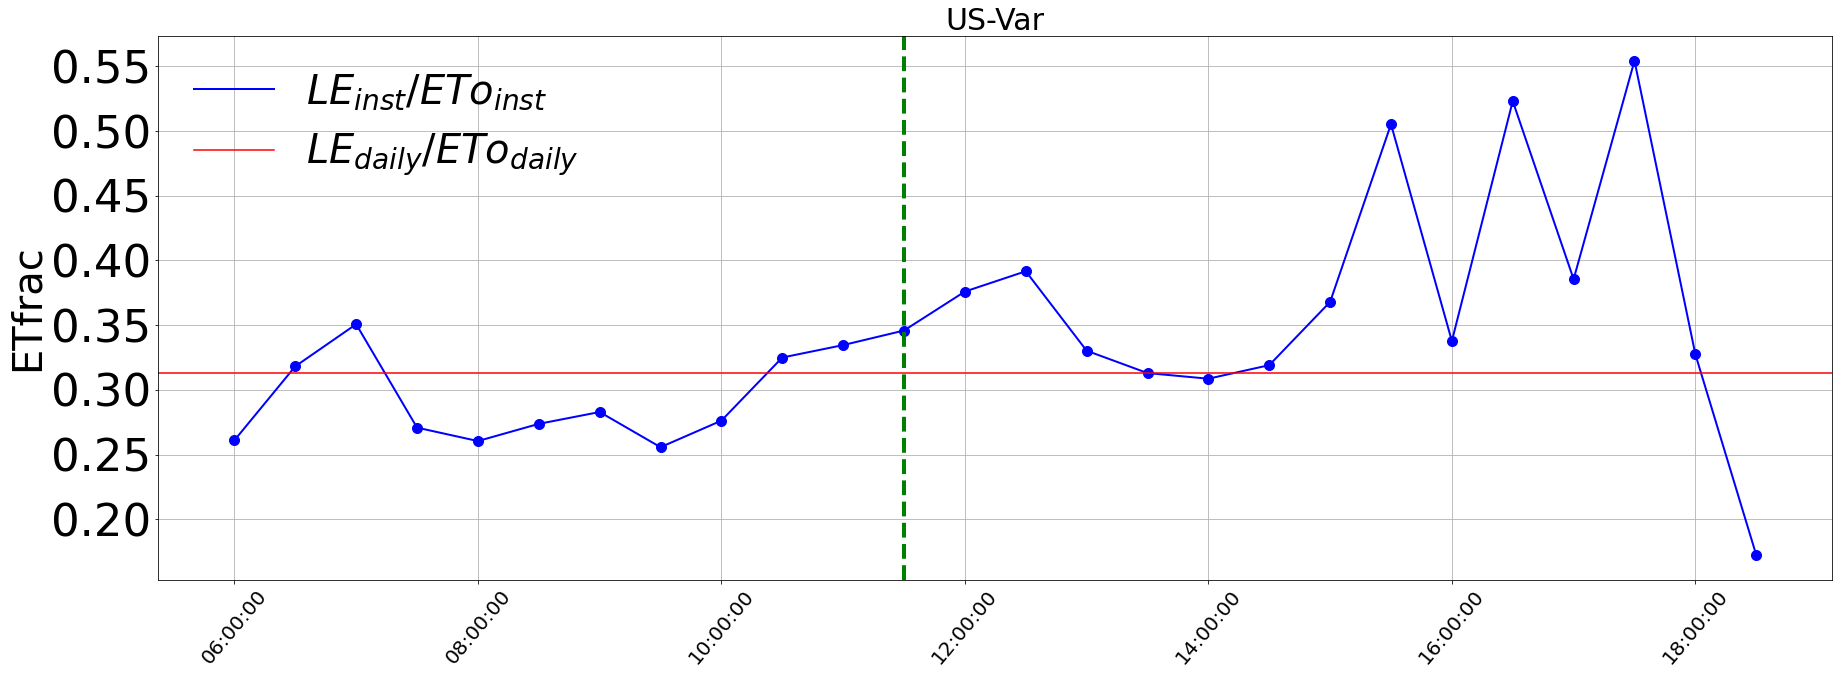

In [127]:

#### Plotting these (with G's i.e observed G's are not ideal and daily values have something)
import matplotlib.dates as mdates

fig,ax=plt.subplots(figsize=(30,10))

date_format = mdates.DateFormatter('%H:%M:%S')
##
# x=daily_data["bi1"][(daily_data["bi1"][cols[0]["LE"].iloc[0]].notna()) & (daily_data["bi1"]["ET_24h"].notna())][cols[0]["LE"].iloc[0]]
# y=daily_data["bi1"][(daily_data["bi1"][cols[0]["LE"].iloc[0]].notna()) & (daily_data["bi1"]["ET_24h"].notna())]["ET_24h"]
ax.plot(var_daytime.reset_index()["Datetime"],var_daytime.reset_index()["LE"]/var_daytime.reset_index()["ETo"],c="b",label="$LE_{inst}/ETo_{inst}$",linewidth=2)
ax.plot(var_daytime.reset_index()["Datetime"],var_daytime.reset_index()["LE"]/var_daytime.reset_index()["ETo"],"o",c="b",markersize=10)
# ax.plot(var_sample["Datetime"],var_sample["ET_frac_inst_obs"],"o",c="b",markersize=10)
# ax.plot(var_sample["Datetime"],var_sample["NETRAD"],c="k",label="$ETo_{inst}$",linewidth=2)
# ax.plot(var_sample["Datetime"],var_sample["NETRAD"],"o",c="k",markersize=10)
# ax.plot(var_sample["Datetime"],var_sample["Rext"],c="k",label="$ETo_{inst}$",linewidth=2)
plt.axvline(pd.Timestamp('2020-05-21 11:30:00'),color='g',linestyle="--",linewidth=4)
plt.axhline(66.01855739583334/211.0505895034005,color='r',label="$LE_{daily}/ETo_{daily}$")
# plt.axhline(120.82619230769231/211.0505895034005,color='g',label="$LE_{daytime}/ETo_{daily}$")

# plt.axhline(0.32,color='g',label="$EF_{daytime avg}$")

# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['ET_frac_daily_obs_G'],"o",c="k",markersize=10)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['ET_frac_inst_obs'],c="g",label="$ETfrac_{inst}$",linewidth=2)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['ET_frac_inst_obs'],"o",c="g",markersize=10)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['SWC_PI_1_1_A'],"o",c="g",markersize=10)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['WS'],"o",c="g",markersize=10)

# ax.plot(daily_data["var"]["Date"],daily_data["var"]["ET_frac_sim"],c="r",label="$ETfrac_{sim}$",linewidth=2)
# ax.plot(daily_data["var"]["Date"],daily_data["var"]["ET_frac_sim"],"o",c="r",markersize=10)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]["EF"],c="r",label="$ETfrac_{model}$",linewidth=2)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]["EF"],"o",c="r",markersize=10)
# ax.set_ylim(-0.5,2)
# ax.xaxis.set_major_locator(MonthLocator(interval=90))
ax.set_ylabel("ETfrac",fontsize=40)

ax.grid()

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
# ax.xaxis.set_major_locator(mdates.DateLocator(interval=1))
# ax.set_xticklabels(["May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],fontsize=45)
ax.set_title("US-Var",fontsize=30)

# ax.set_ylim(-0.3,1)
plt.xticks(fontsize=20,rotation=50)
plt.yticks(fontsize=45)
# plt.xticks(fontsize=25)
ax.legend(fontsize=40,loc="upper left",frameon=False)

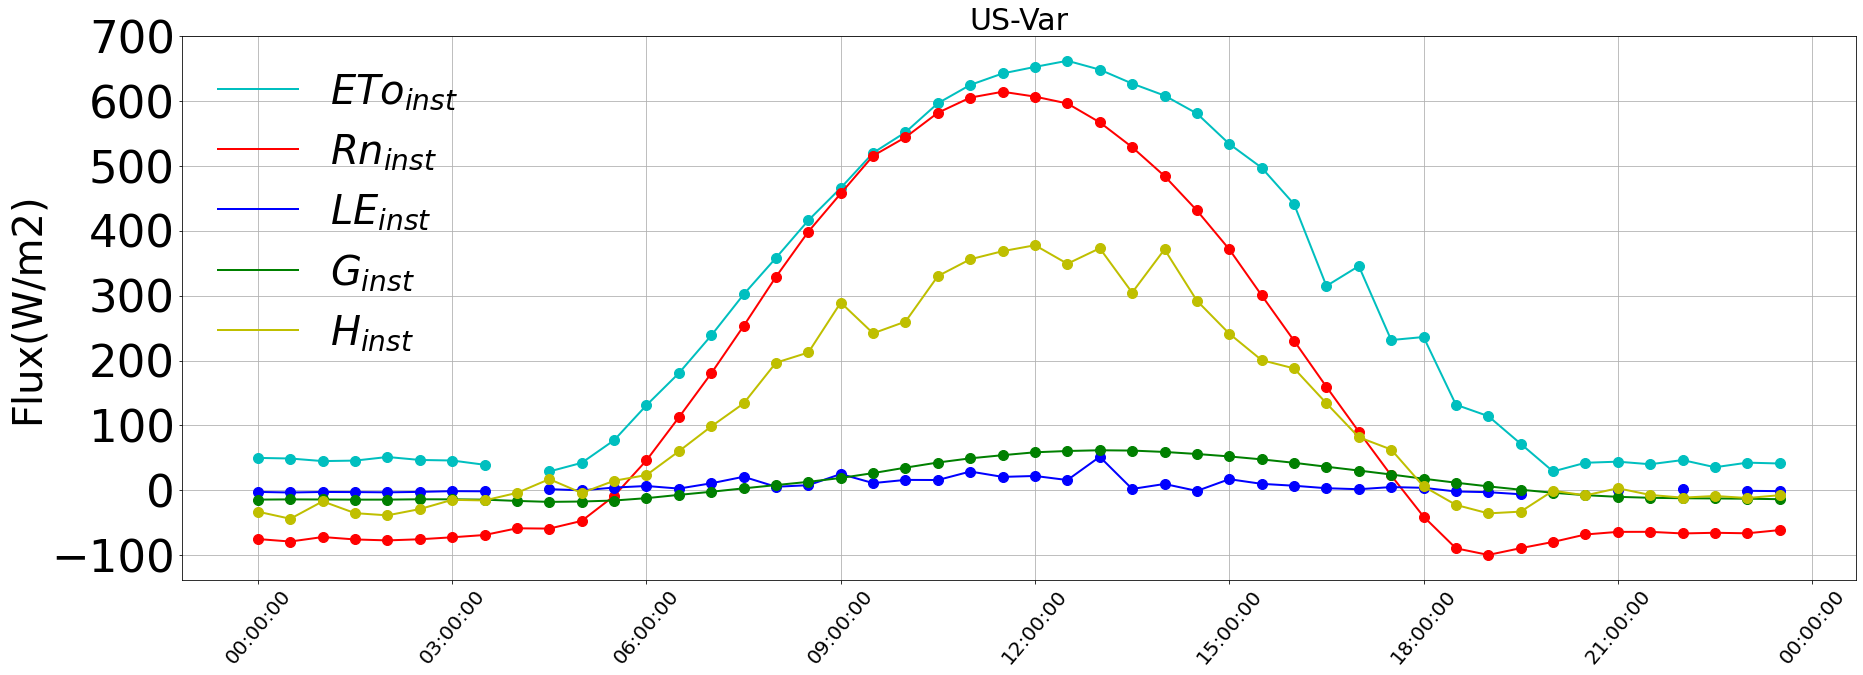

In [228]:
#### Plotting these (with G's i.e observed G's are not ideal and daily values have something)
import matplotlib.dates as mdates

fig,ax=plt.subplots(figsize=(30,10))

date_format = mdates.DateFormatter('%H:%M:%S')
##
# x=daily_data["bi1"][(daily_data["bi1"][cols[0]["LE"].iloc[0]].notna()) & (daily_data["bi1"]["ET_24h"].notna())][cols[0]["LE"].iloc[0]]
# y=daily_data["bi1"][(daily_data["bi1"][cols[0]["LE"].iloc[0]].notna()) & (daily_data["bi1"]["ET_24h"].notna())]["ET_24h"]
# ax.plot(var_sample["Datetime"],var_sample["Rn"],c="b",label="$ET_{a}$",linewidth=2)
# ax.plot(var_sample["Datetime"],var_sample["Rn"],"o",c="b",markersize=10)
ax.plot(var_sample1["Datetime"],var_sample1["ETo"],c="c",label="$ETo_{inst}$",linewidth=2)
ax.plot(var_sample1["Datetime"],var_sample1["ETo"],"o",c="c",markersize=10)
# ax.plot(var_sample["Datetime"],var_sample["Rn_fao"]*277.77,c="g",label="$ETo_{inst}$",linewidth=2)
# ax.plot(var_sample["Datetime"],var_sample["Rn_fao"]*277.77,"o",c="g",markersize=10)
ax.plot(var_sample1["Datetime"],var_sample1["NETRAD"],c="r",label="$Rn_{inst}$",linewidth=2)
ax.plot(var_sample1["Datetime"],var_sample1["NETRAD"],"o",c="r",markersize=10)
ax.plot(var_sample1["Datetime"],var_sample1["LE"],c="b",label="$LE_{inst}$",linewidth=2)
ax.plot(var_sample1["Datetime"],var_sample1["LE"],"o",c="b",markersize=10)
ax.plot(var_sample1["Datetime"],var_sample1["G_PI_1_1_A"],c="g",label="$G_{inst}$",linewidth=2)
ax.plot(var_sample1["Datetime"],var_sample1["G_PI_1_1_A"],"o",c="g",markersize=10)
ax.plot(var_sample1["Datetime"],var_sample1["H"],c="y",label="$H_{inst}$",linewidth=2)
ax.plot(var_sample1["Datetime"],var_sample1["H"],"o",c="y",markersize=10)
# ax.plot(var_sample1["Datetime"],var_sample1["NETRAD"]-var_sample1["H"]-var_sample1["LE"]-var_sample1["G_PI_1_1_A"],"o",c="g",markersize=10)

# ax.plot(var_sample["Datetime"],var_sample["Rext"],c="k",label="$ETo_{inst}$",linewidth=2)

# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['ET_frac_daily_obs_G'],"o",c="k",markersize=10)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['ET_frac_inst_obs'],c="g",label="$ETfrac_{inst}$",linewidth=2)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['ET_frac_inst_obs'],"o",c="g",markersize=10)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['SWC_PI_1_1_A'],"o",c="g",markersize=10)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['WS'],"o",c="g",markersize=10)

# ax.plot(daily_data["var"]["Date"],daily_data["var"]["ET_frac_sim"],c="r",label="$ETfrac_{sim}$",linewidth=2)
# ax.plot(daily_data["var"]["Date"],daily_data["var"]["ET_frac_sim"],"o",c="r",markersize=10)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]["EF"],c="r",label="$ETfrac_{model}$",linewidth=2)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]["EF"],"o",c="r",markersize=10)
# ax.set_ylim(-0.5,2)
# ax.xaxis.set_major_locator(MonthLocator(interval=90))
ax.set_ylabel("Flux(W/m2)",fontsize=40)

ax.grid()

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
# ax.xaxis.set_major_locator(mdates.DateLocator(interval=1))
# ax.set_xticklabels(["May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],fontsize=45)
ax.set_title("US-Var",fontsize=30)

# # ax.set_ylim(20,220)
plt.xticks(fontsize=20,rotation=50)
plt.yticks(fontsize=45)
# plt.xticks(fontsize=25)
ax.legend(fontsize=40,loc="upper left",frameon=False)

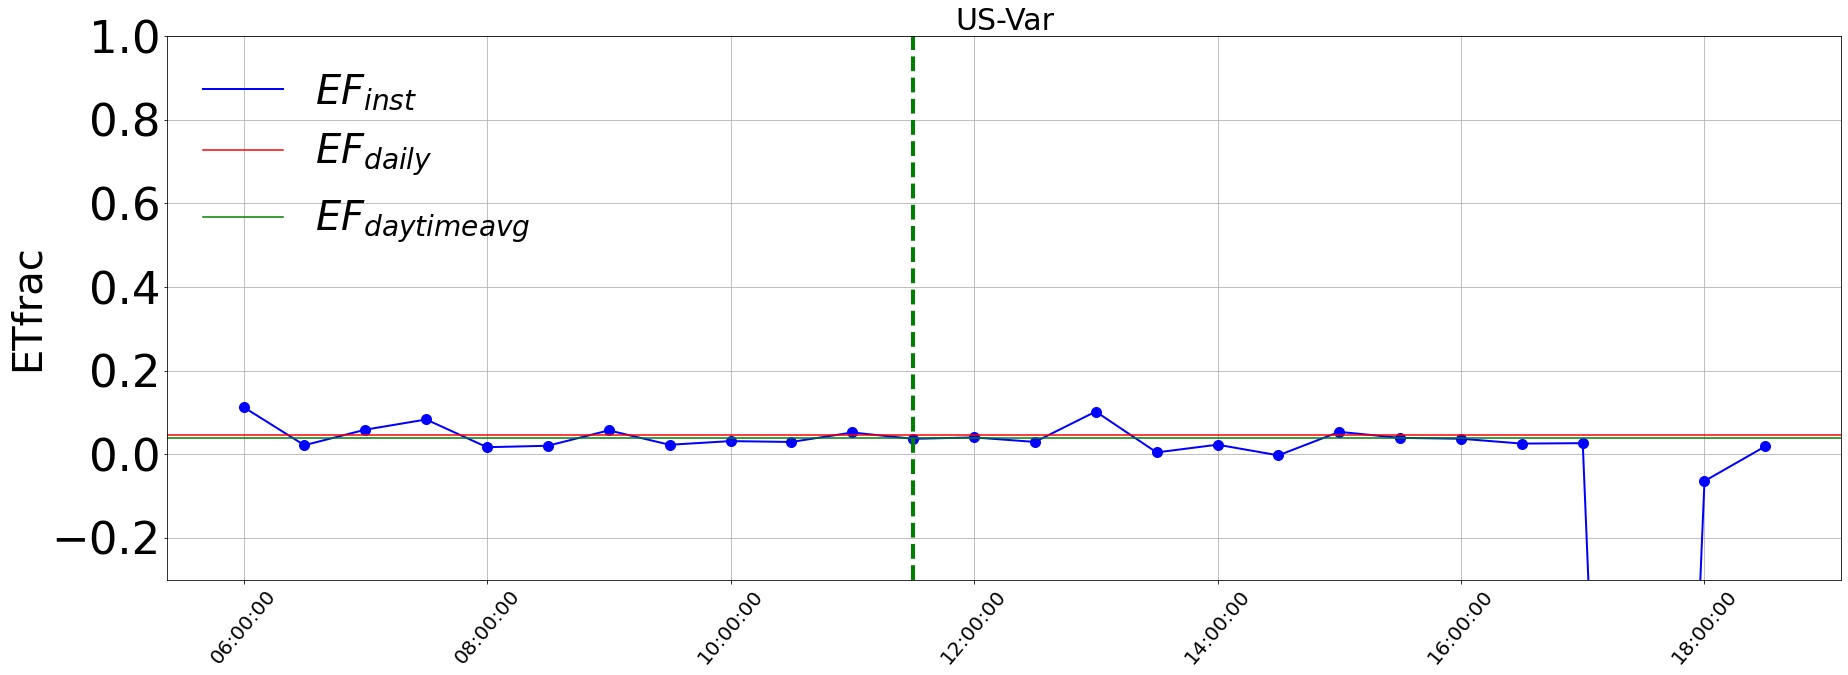

In [77]:

#### Plotting these (with G's i.e observed G's are not ideal and daily values have something)
import matplotlib.dates as mdates

fig,ax=plt.subplots(figsize=(30,10))

date_format = mdates.DateFormatter('%H:%M:%S')
##
# x=daily_data["bi1"][(daily_data["bi1"][cols[0]["LE"].iloc[0]].notna()) & (daily_data["bi1"]["ET_24h"].notna())][cols[0]["LE"].iloc[0]]
# y=daily_data["bi1"][(daily_data["bi1"][cols[0]["LE"].iloc[0]].notna()) & (daily_data["bi1"]["ET_24h"].notna())]["ET_24h"]
ax.plot(var_daytime1.reset_index()["Datetime"],var_daytime1.reset_index()["ET_frac_inst_obs"],c="b",label="$EF_{inst}$",linewidth=2)
ax.plot(var_daytime1.reset_index()["Datetime"],var_daytime1.reset_index()["ET_frac_inst_obs"],"o",c="b",markersize=10)
# ax.plot(var_sample["Datetime"],var_sample["ET_frac_inst_obs"],"o",c="b",markersize=10)
# ax.plot(var_sample["Datetime"],var_sample["NETRAD"],c="k",label="$ETo_{inst}$",linewidth=2)
# ax.plot(var_sample["Datetime"],var_sample["NETRAD"],"o",c="k",markersize=10)
# ax.plot(var_sample["Datetime"],var_sample["Rext"],c="k",label="$ETo_{inst}$",linewidth=2)
plt.axvline(pd.Timestamp('2020-07-08 11:30:00'),color='g',linestyle="--",linewidth=4)
plt.axhline(0.0456,color='r',label="$EF_{daily}$")
plt.axhline(0.039,color='g',label="$EF_{daytime avg}$")

# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['ET_frac_daily_obs_G'],"o",c="k",markersize=10)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['ET_frac_inst_obs'],c="g",label="$ETfrac_{inst}$",linewidth=2)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['ET_frac_inst_obs'],"o",c="g",markersize=10)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['SWC_PI_1_1_A'],"o",c="g",markersize=10)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['WS'],"o",c="g",markersize=10)

# ax.plot(daily_data["var"]["Date"],daily_data["var"]["ET_frac_sim"],c="r",label="$ETfrac_{sim}$",linewidth=2)
# ax.plot(daily_data["var"]["Date"],daily_data["var"]["ET_frac_sim"],"o",c="r",markersize=10)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]["EF"],c="r",label="$ETfrac_{model}$",linewidth=2)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]["EF"],"o",c="r",markersize=10)
# ax.set_ylim(-0.5,2)
# ax.xaxis.set_major_locator(MonthLocator(interval=90))
ax.set_ylabel("ETfrac",fontsize=40)

ax.grid()

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
# ax.xaxis.set_major_locator(mdates.DateLocator(interval=1))
# ax.set_xticklabels(["May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],fontsize=45)
ax.set_title("US-Var",fontsize=30)

ax.set_ylim(-0.3,1)
plt.xticks(fontsize=20,rotation=50)
plt.yticks(fontsize=45)
# plt.xticks(fontsize=25)
ax.legend(fontsize=40,loc="upper left",frameon=False)

In [129]:
var_sample1["ETo"].mean()

267.4349346623975

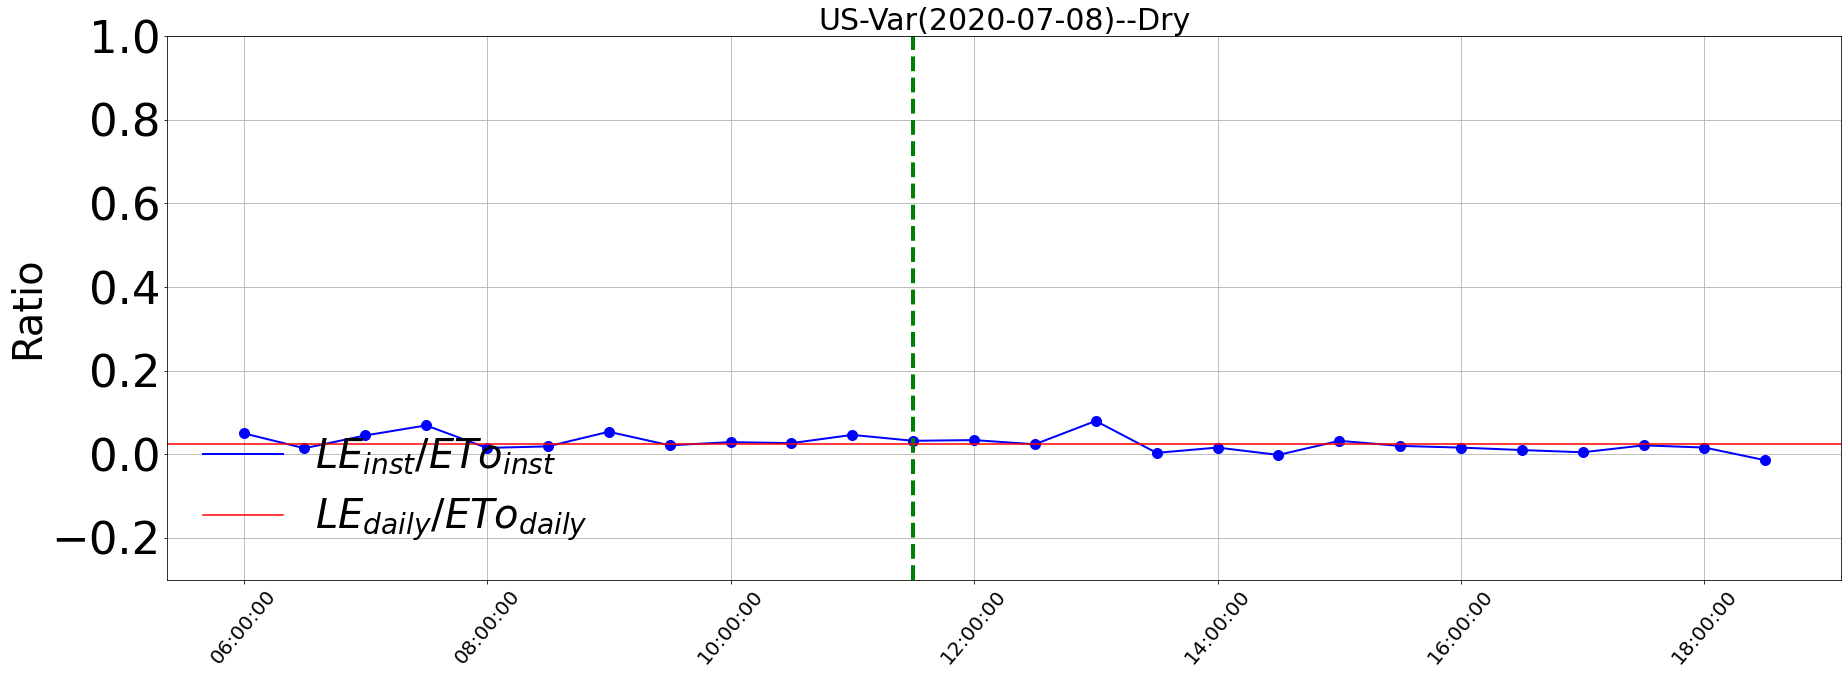

In [231]:

#### Plotting these (with G's i.e observed G's are not ideal and daily values have something)
import matplotlib.dates as mdates

fig,ax=plt.subplots(figsize=(30,10))

date_format = mdates.DateFormatter('%H:%M:%S')
##
# x=daily_data["bi1"][(daily_data["bi1"][cols[0]["LE"].iloc[0]].notna()) & (daily_data["bi1"]["ET_24h"].notna())][cols[0]["LE"].iloc[0]]
# y=daily_data["bi1"][(daily_data["bi1"][cols[0]["LE"].iloc[0]].notna()) & (daily_data["bi1"]["ET_24h"].notna())]["ET_24h"]
ax.plot(var_daytime1.reset_index()["Datetime"],var_daytime1.reset_index()["LE"]/var_daytime1.reset_index()["ETo"],c="b",label="$LE_{inst}/ETo_{inst}$",linewidth=2)
ax.plot(var_daytime1.reset_index()["Datetime"],var_daytime1.reset_index()["LE"]/var_daytime1.reset_index()["ETo"],"o",c="b",markersize=10)
# ax.plot(var_sample["Datetime"],var_sample["ET_frac_inst_obs"],"o",c="b",markersize=10)
# ax.plot(var_sample["Datetime"],var_sample["NETRAD"],c="k",label="$ETo_{inst}$",linewidth=2)
# ax.plot(var_sample["Datetime"],var_sample["NETRAD"],"o",c="k",markersize=10)
# ax.plot(var_sample["Datetime"],var_sample["Rext"],c="k",label="$ETo_{inst}$",linewidth=2)
plt.axvline(pd.Timestamp('2020-07-08 11:30:00'),color='g',linestyle="--",linewidth=4)
plt.axhline(6.8121258139534895/267.4349346623975,color='r',label="$LE_{daily}/ETo_{daily}$")
# plt.axhline(0.32,color='g',label="$EF_{daytime avg}$")

# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['ET_frac_daily_obs_G'],"o",c="k",markersize=10)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['ET_frac_inst_obs'],c="g",label="$ETfrac_{inst}$",linewidth=2)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['ET_frac_inst_obs'],"o",c="g",markersize=10)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['SWC_PI_1_1_A'],"o",c="g",markersize=10)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['WS'],"o",c="g",markersize=10)

# ax.plot(daily_data["var"]["Date"],daily_data["var"]["ET_frac_sim"],c="r",label="$ETfrac_{sim}$",linewidth=2)
# ax.plot(daily_data["var"]["Date"],daily_data["var"]["ET_frac_sim"],"o",c="r",markersize=10)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]["EF"],c="r",label="$ETfrac_{model}$",linewidth=2)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]["EF"],"o",c="r",markersize=10)
# ax.set_ylim(-0.5,2)
# ax.xaxis.set_major_locator(MonthLocator(interval=90))
ax.set_ylabel("Ratio",fontsize=40)

ax.grid()

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
# ax.xaxis.set_major_locator(mdates.DateLocator(interval=1))
# ax.set_xticklabels(["May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],fontsize=45)
ax.set_title("US-Var(2020-07-08)--Dry",fontsize=30)

ax.set_ylim(-0.3,1)
plt.xticks(fontsize=20,rotation=50)
plt.yticks(fontsize=45)
# plt.xticks(fontsize=25)
ax.legend(fontsize=40,loc="lower left",frameon=False)

In [186]:
import pytz
tz = pytz.timezone('US/Pacific')
var_inst["Datetime_Local"]=var_inst["Datetime"].dt.tz_localize(tz, nonexistent='shift_forward',ambiguous=False)
var_inst["Datetime_GMT"]=var_inst["Datetime_Local"].dt.tz_convert('GMT')
daily_data["var"]["Datetime_GMT"]=pd.to_datetime(daily_data["var"]["Datetime_GMT"])
df_merge=pd.merge(var_inst[["Datetime_GMT","ETo"]],daily_data["var"],on="Datetime_GMT",how="right")
# daily_data["var"]["Datetime_GMT"]
# print(var_inst.columns.tolist())
# var_inst["Datetime_local"]
df_merge=pd.merge(df_merge,date,on="Date",how="left")

In [202]:
df_merge["k_actual"]=df_merge["LE_unclosed"]/(df_merge["LE_inst_af"])
df_merge["k_rad"]=df_merge["Rn_unclosed"]/(df_merge["Rn_inst_af"]-df_merge["G_inst_af"])
df_merge["k_eto"]=df_merge["ETo_daily"]/(df_merge["ETo"])

,Date,EF_daily,EF_daytime,ETo_daily
0,2015-01-01,1.767732,0.332236,51.297475
1,2015-01-02,1.394292,0.345572,53.915877
2,2015-01-03,1.001574,0.349642,54.782627
3,2015-01-04,1.097328,0.385445,46.130311
4,2015-01-05,0.755026,0.349317,53.118799
...,...,...,...,...
2697,2022-05-21,0.141361,0.110010,234.899803
2698,2022-05-22,0.146931,0.118099,247.136103
2699,2022-05-23,0.116582,0.094850,250.923571
2700,2022-05-24,0.133711,0.109603,260.838673


In [212]:
# df_merge["k_actual"]=df_merge["LE_unclosed"]/(df_merge["LE_inst_af"])
df_merge["ET_ups_rad"]=df_merge["k_rad"]*df_merge["LE_inst_af"]
df_merge["ET_ups_eto"]=df_merge["k_eto"]*df_merge["LE_inst_af"]

In [177]:
var_sample[["Datetime","ETo"]]

,Datetime,ETo
94416,2020-05-21 00:00:00,20.200291
94417,2020-05-21 00:30:00,18.624278
94418,2020-05-21 01:00:00,17.619199
94419,2020-05-21 01:30:00,17.245397
94420,2020-05-21 02:00:00,15.678615
94421,2020-05-21 02:30:00,18.118281
94422,2020-05-21 03:00:00,16.065993
94423,2020-05-21 03:30:00,13.657871
94424,2020-05-21 04:00:00,NaN
94425,2020-05-21 04:30:00,14.793681


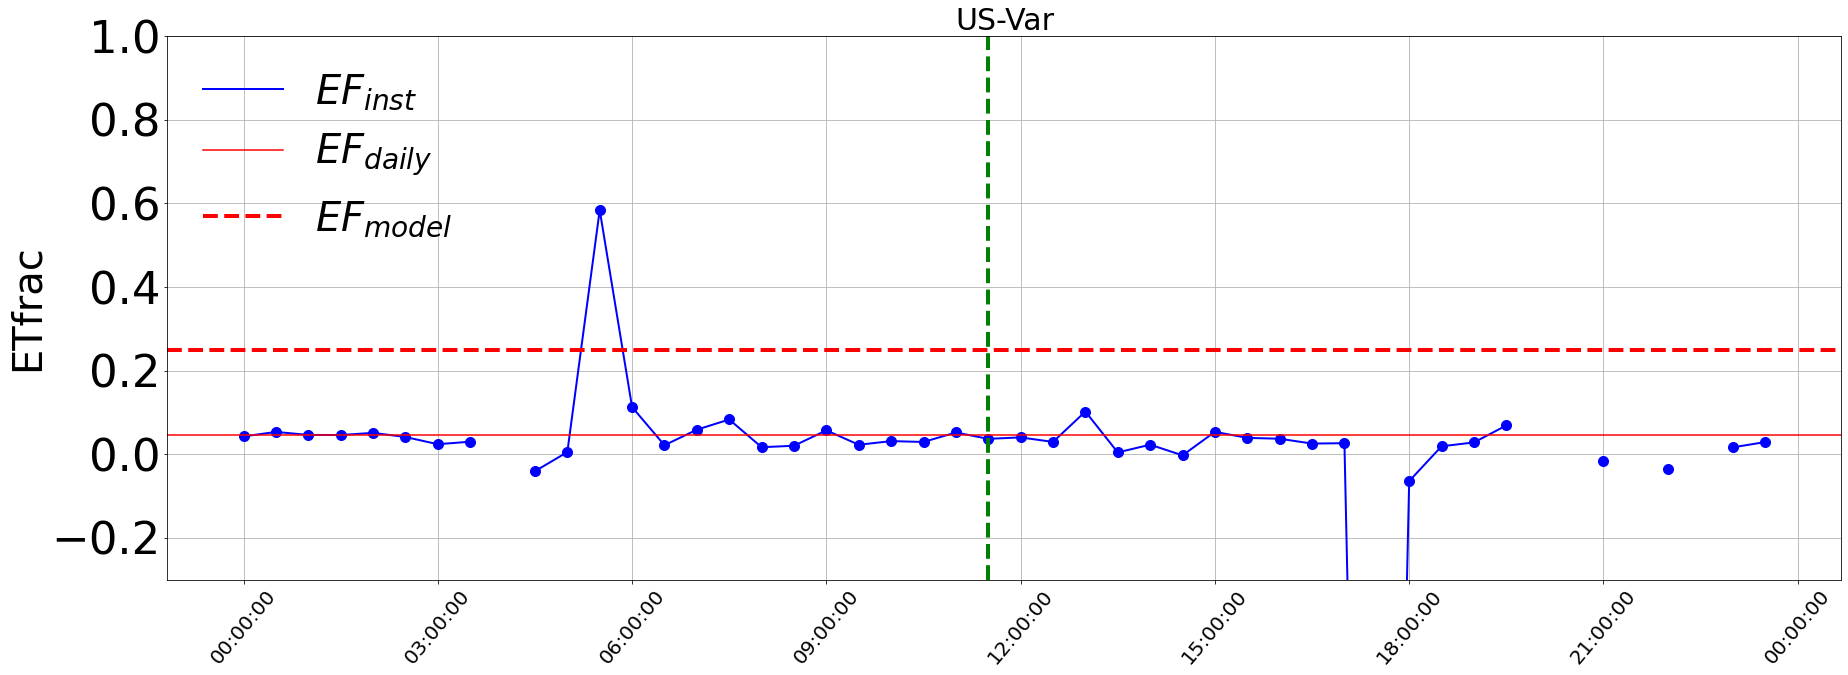

In [163]:
#### Plotting these (with G's i.e observed G's are not ideal and daily values have something)
import matplotlib.dates as mdates
fig,ax=plt.subplots(figsize=(30,10))
date_format = mdates.DateFormatter('%H:%M:%S')
##
# x=daily_data["bi1"][(daily_data["bi1"][cols[0]["LE"].iloc[0]].notna()) & (daily_data["bi1"]["ET_24h"].notna())][cols[0]["LE"].iloc[0]]
# y=daily_data["bi1"][(daily_data["bi1"][cols[0]["LE"].iloc[0]].notna()) & (daily_data["bi1"]["ET_24h"].notna())]["ET_24h"]
ax.plot(var_sample1["Datetime"],var_sample1["ET_frac_inst_obs"],c="b",label="$EF_{inst}$",linewidth=2)
ax.plot(var_sample1["Datetime"],var_sample1["ET_frac_inst_obs"],"o",c="b",markersize=10)
# ax.plot(var_sample["Datetime"],var_sample["ET_frac_inst_obs"],"o",c="b",markersize=10)
# ax.plot(var_sample["Datetime"],var_sample["NETRAD"],c="k",label="$ETo_{inst}$",linewidth=2)
# ax.plot(var_sample["Datetime"],var_sample["NETRAD"],"o",c="k",markersize=10)
# ax.plot(var_sample["Datetime"],var_sample["Rext"],c="k",label="$ETo_{inst}$",linewidth=2)
plt.axvline(pd.Timestamp('2020-07-08 11:30:00'),color='g',linestyle="--",linewidth=4)
plt.axhline(0.0456,color='r',label="$EF_{daily}$")
plt.axhline(0.248,color='r',label="$EF_{model}$",linestyle="--",linewidth=4)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['ET_frac_daily_obs_G'],"o",c="k",markersize=10)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['ET_frac_inst_obs'],c="g",label="$ETfrac_{inst}$",linewidth=2)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['ET_frac_inst_obs'],"o",c="g",markersize=10)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['SWC_PI_1_1_A'],"o",c="g",markersize=10)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['WS'],"o",c="g",markersize=10)
# ax.plot(daily_data["var"]["Date"],daily_data["var"]["ET_frac_sim"],c="r",label="$ETfrac_{sim}$",linewidth=2)
# ax.plot(daily_data["var"]["Date"],daily_data["var"]["ET_frac_sim"],"o",c="r",markersize=10)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]["EF"],c="r",label="$ETfrac_{model}$",linewidth=2)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]["EF"],"o",c="r",markersize=10)
# ax.set_ylim(-0.5,2)
# ax.xaxis.set_major_locator(MonthLocator(interval=90))
ax.set_ylabel("ETfrac",fontsize=40)
ax.grid()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
# ax.xaxis.set_major_locator(mdates.DateLocator(interval=1))
# ax.set_xticklabels(["May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],fontsize=45)
ax.set_title("US-Var",fontsize=30)
ax.set_ylim(-0.3,1)
plt.xticks(fontsize=20,rotation=50)
plt.yticks(fontsize=45)
# plt.xticks(fontsize=25)
ax.legend(fontsize=40,loc="upper left",frameon=False)

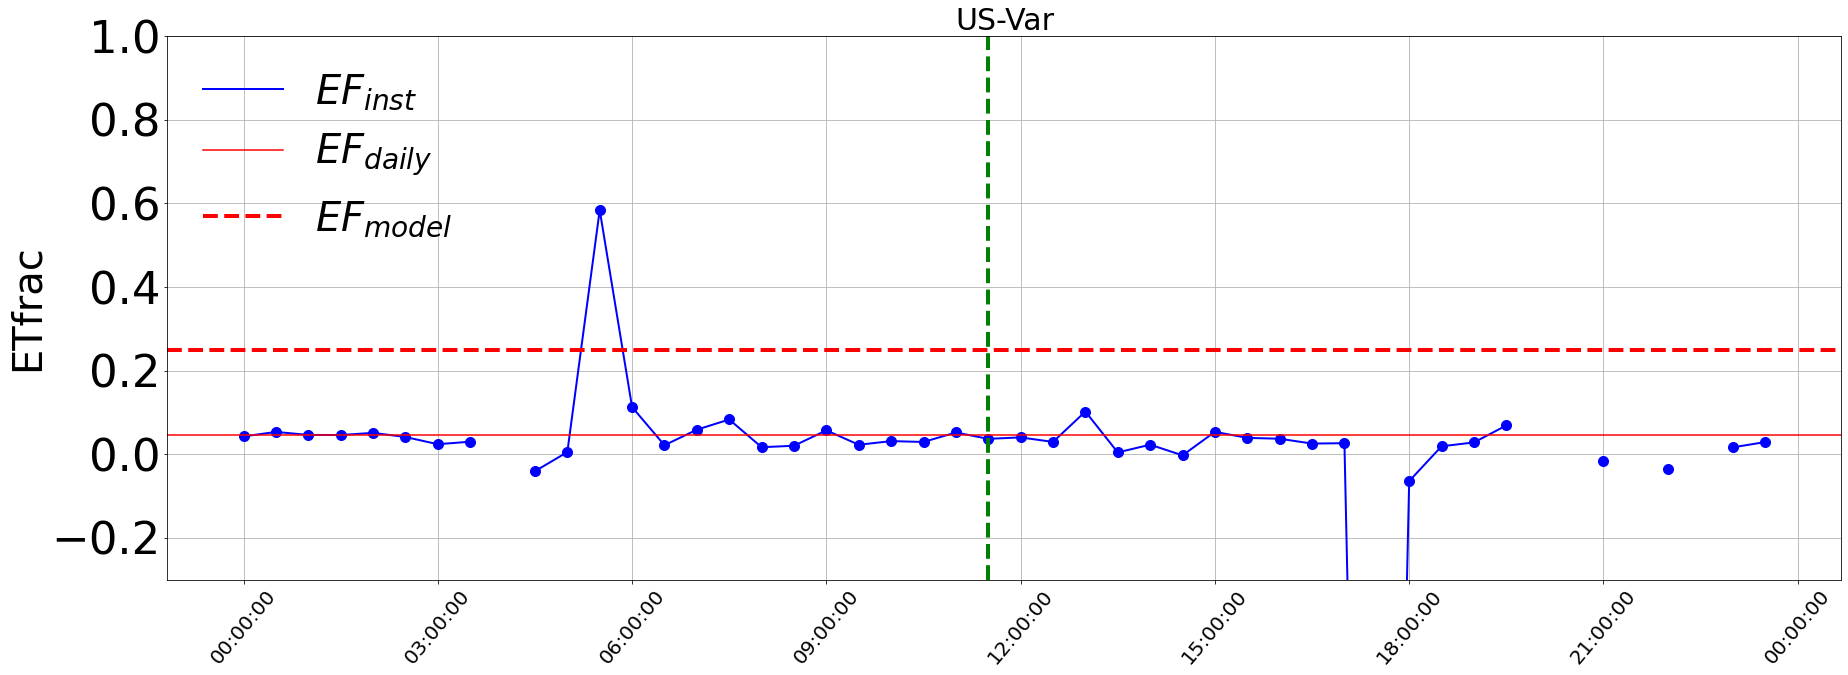

In [26]:

#### Plotting these (with G's i.e observed G's are not ideal and daily values have something)
import matplotlib.dates as mdates

fig,ax=plt.subplots(figsize=(30,10))

date_format = mdates.DateFormatter('%H:%M:%S')
##
# x=daily_data["bi1"][(daily_data["bi1"][cols[0]["LE"].iloc[0]].notna()) & (daily_data["bi1"]["ET_24h"].notna())][cols[0]["LE"].iloc[0]]
# y=daily_data["bi1"][(daily_data["bi1"][cols[0]["LE"].iloc[0]].notna()) & (daily_data["bi1"]["ET_24h"].notna())]["ET_24h"]
ax.plot(var_sample1["Datetime"],var_sample1["ET_frac_inst_obs"],c="b",label="$EF_{inst}$",linewidth=2)
ax.plot(var_sample1["Datetime"],var_sample1["ET_frac_inst_obs"],"o",c="b",markersize=10)
# ax.plot(var_sample["Datetime"],var_sample["ET_frac_inst_obs"],"o",c="b",markersize=10)
# ax.plot(var_sample["Datetime"],var_sample["NETRAD"],c="k",label="$ETo_{inst}$",linewidth=2)
# ax.plot(var_sample["Datetime"],var_sample["NETRAD"],"o",c="k",markersize=10)
# ax.plot(var_sample["Datetime"],var_sample["Rext"],c="k",label="$ETo_{inst}$",linewidth=2)
plt.axvline(pd.Timestamp('2020-07-08 11:30:00'),color='g',linestyle="--",linewidth=4)
plt.axhline(0.0456,color='r',label="$EF_{daily}$")
plt.axhline(0.248,color='r',label="$EF_{model}$",linestyle="--",linewidth=4)

# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['ET_frac_daily_obs_G'],"o",c="k",markersize=10)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['ET_frac_inst_obs'],c="g",label="$ETfrac_{inst}$",linewidth=2)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['ET_frac_inst_obs'],"o",c="g",markersize=10)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['SWC_PI_1_1_A'],"o",c="g",markersize=10)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['WS'],"o",c="g",markersize=10)

# ax.plot(daily_data["var"]["Date"],daily_data["var"]["ET_frac_sim"],c="r",label="$ETfrac_{sim}$",linewidth=2)
# ax.plot(daily_data["var"]["Date"],daily_data["var"]["ET_frac_sim"],"o",c="r",markersize=10)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]["EF"],c="r",label="$ETfrac_{model}$",linewidth=2)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]["EF"],"o",c="r",markersize=10)
# ax.set_ylim(-0.5,2)
# ax.xaxis.set_major_locator(MonthLocator(interval=90))
ax.set_ylabel("ETfrac",fontsize=40)

ax.grid()

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
# ax.xaxis.set_major_locator(mdates.DateLocator(interval=1))
# ax.set_xticklabels(["May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],fontsize=45)
ax.set_title("US-Var",fontsize=30)

ax.set_ylim(-0.3,1)
plt.xticks(fontsize=20,rotation=50)
plt.yticks(fontsize=45)
# plt.xticks(fontsize=25)
ax.legend(fontsize=40,loc="upper left",frameon=False)

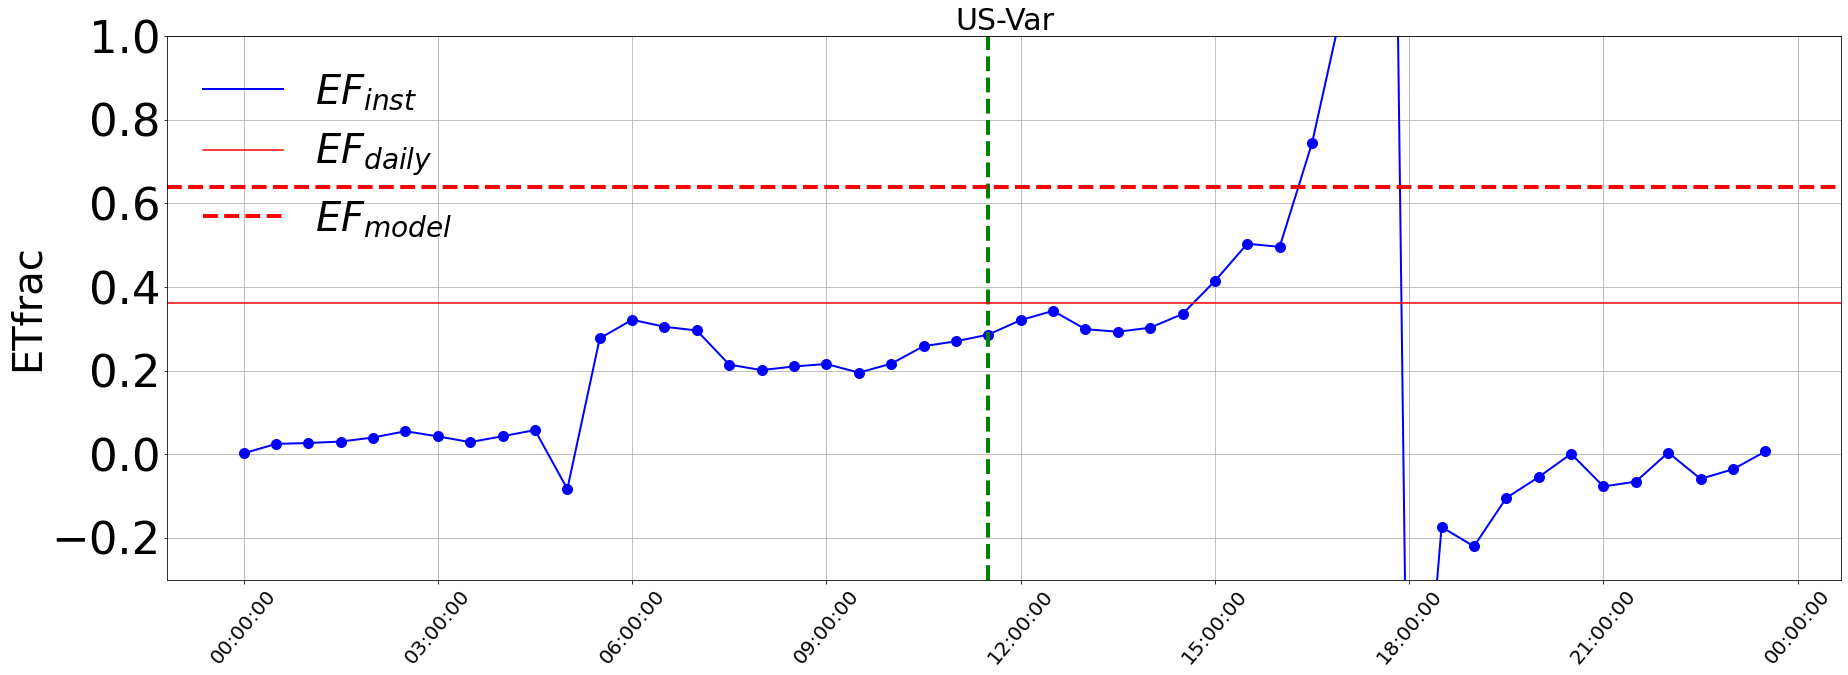

In [40]:

#### Plotting these (with G's i.e observed G's are not ideal and daily values have something)
import matplotlib.dates as mdates

fig,ax=plt.subplots(figsize=(30,10))

date_format = mdates.DateFormatter('%H:%M:%S')
##
# x=daily_data["bi1"][(daily_data["bi1"][cols[0]["LE"].iloc[0]].notna()) & (daily_data["bi1"]["ET_24h"].notna())][cols[0]["LE"].iloc[0]]
# y=daily_data["bi1"][(daily_data["bi1"][cols[0]["LE"].iloc[0]].notna()) & (daily_data["bi1"]["ET_24h"].notna())]["ET_24h"]
ax.plot(var_sample["Datetime"],var_sample["ET_frac_inst_obs"],c="b",label="$EF_{inst}$",linewidth=2)
ax.plot(var_sample["Datetime"],var_sample["ET_frac_inst_obs"],"o",c="b",markersize=10)
# ax.plot(var_sample["Datetime"],var_sample["ET_frac_inst_obs"],"o",c="b",markersize=10)
# ax.plot(var_sample["Datetime"],var_sample["NETRAD"],c="k",label="$ETo_{inst}$",linewidth=2)
# ax.plot(var_sample["Datetime"],var_sample["NETRAD"],"o",c="k",markersize=10)
# ax.plot(var_sample["Datetime"],var_sample["Rext"],c="k",label="$ETo_{inst}$",linewidth=2)
plt.axvline(pd.Timestamp('2020-05-21 11:30:00'),color='g',linestyle="--",linewidth=4)
plt.axhline(0.362,color='r',label="$EF_{daily}$")
plt.axhline(0.64,color='r',label="$EF_{model}$",linestyle="--",linewidth=4)

# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['ET_frac_daily_obs_G'],"o",c="k",markersize=10)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['ET_frac_inst_obs'],c="g",label="$ETfrac_{inst}$",linewidth=2)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['ET_frac_inst_obs'],"o",c="g",markersize=10)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['SWC_PI_1_1_A'],"o",c="g",markersize=10)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['WS'],"o",c="g",markersize=10)

# ax.plot(daily_data["var"]["Date"],daily_data["var"]["ET_frac_sim"],c="r",label="$ETfrac_{sim}$",linewidth=2)
# ax.plot(daily_data["var"]["Date"],daily_data["var"]["ET_frac_sim"],"o",c="r",markersize=10)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]["EF"],c="r",label="$ETfrac_{model}$",linewidth=2)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]["EF"],"o",c="r",markersize=10)
# ax.set_ylim(-0.5,2)
# ax.xaxis.set_major_locator(MonthLocator(interval=90))
ax.set_ylabel("ETfrac",fontsize=40)

ax.grid()

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
# ax.xaxis.set_major_locator(mdates.DateLocator(interval=1))
# ax.set_xticklabels(["May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],fontsize=45)
ax.set_title("US-Var",fontsize=30)

ax.set_ylim(-0.3,1)
plt.xticks(fontsize=20,rotation=50)
plt.yticks(fontsize=45)
# plt.xticks(fontsize=25)
ax.legend(fontsize=40,loc="upper left",frameon=False)

In [168]:
print(daily_data["var"].columns.tolist())
print(daily_data["bi1"].columns.tolist())
daily_data["var"]["G_unclosed"].describe()
daily_data[key]["LE_closed"]

['Unnamed: 0.2', 'Date', 'LE_closed', 'LE_unclosed', 'H_closed', 'H_unclosed', 'G_unclosed', 'Rn_unclosed', 'Name_x', 'Unnamed: 0', 'Unnamed: 0_x', 'Unnamed: 0.1', 'id', 'longitude', 'latitude', 'date', 'UB', 'B', 'GR', 'R', 'NIR', 'SWIR_1', 'SWIR_2', 'ST_B10', 'pixel_qa', 'ALFA', 'NDVI', 'EVI', 'SAVI', 'T_LST', 'LAI', 'e_0', 'e_NB', 'longitude.1', 'latitude.1', 'NDVI_neg', 'pos_NDVI', 'int', 'sd_ndvi', 'NDWI', 'LST_neg', 'LST_NW', 'T_LST_DEM', 'LST_neg_1', 'LST_NW_1', 'Tao_sw', 'EA', 'W_ATM', 'Rl_up', 'Rs_down', 'Tao_sw_1', 'ES', 'EA_1', 'Rl_down', 'Rn', 'Ginst', 'zom', 'u_fr', 'Hinst', 'rah', 'dT', 'rah_first', 'zom_1', 'u_fr_1', 'ufric_star', 'ET_inst', 'ET_24h', 'LEinst', 'EF', 'id.1', 'longitude.2', 'latitude.2', 'Rn24h_G', 'AirT_G', 'RH_G', 'ux_G', 'SW_Down', 'cold_pixel_lat', 'cold_pixel_lon', 'cold_pixel_ndvi', 'cold_pixel_sum', 'cold_pixel_temp', 'hot_pixel_sum', 'hot_pixel_lat', 'hot_pixel_lon', 'hot_pixel_ndvi', 'hot_pixel_Rn', 'hot_pixel_G', 'hot_pixel_temp', 'zenith_angle'

0     2.128935
1     2.128935
2     2.856800
3     2.044905
4     2.044905
5     3.991252
6     3.991252
7     5.045876
8     7.819875
9     6.115778
10    6.115778
11    4.510069
12    4.510069
14    2.575194
13    2.575194
16    0.732977
17    0.732977
18    1.118032
19    1.118032
20    3.004491
21    3.115408
23    5.794487
24    5.794487
25    5.596734
26    5.596734
27    3.644642
28    7.257663
29    7.257663
31    3.461483
30    3.461483
32    6.568512
33    6.568512
34    2.318450
35    2.318450
36    6.700564
37    6.700564
38    5.795770
39    5.795770
40    1.438497
41    1.438497
42    5.897079
43    5.897079
44    5.856063
47    3.364723
46    3.364723
48    2.455699
49    2.455699
50    2.569889
51    2.569889
52    1.567903
53    1.567903
55    1.924037
56    2.064831
57    2.064831
58    2.121443
59    4.534653
60    4.534653
61    2.616937
62    3.095963
Name: LE_closed, dtype: float64

In [110]:
for i, key in enumerate(daily_data):
    daily_data[key]["ET_frac_inst_obs"]=daily_data[key]["LE_inst_af"]/(daily_data[key]["Rn_inst_af"]-daily_data[key]["G_inst_af"])
    daily_data[key]["ET_frac_daily_obs_G"]=daily_data[key]["LE_unclosed"]/(daily_data[key]["Rn_unclosed"]-daily_data[key]["G_unclosed"])
    daily_data[key]["ET_frac_daily_obs_noG"]=daily_data[key]["LE_unclosed"]/(daily_data[key]["Rn_unclosed"])
    daily_data[key]["k_actual"]=daily_data[key]["LE_unclosed"]/(daily_data[key]["LE_inst_af"])
    daily_data[key]["k_rad"]=daily_data[key]["Rn_unclosed"]/(daily_data[key]["Rn_inst_af"]-daily_data[key]["G_inst_af"])
    daily_data[key]["k_eto"]=daily_data[key]["ETo"].mean()/(daily_data[key]["ETo"])


    daily_data[key]["ET_sim_EFinst"]=daily_data[key]["ET_frac_inst_obs"]*(daily_data[key]["Rn_unclosed"])/28.36

In [156]:
print(daily_data["var"].columns.tolist())

['Unnamed: 0.2', 'Date', 'LE_closed', 'LE_unclosed', 'H_closed', 'H_unclosed', 'G_unclosed', 'Rn_unclosed', 'Name_x', 'Unnamed: 0', 'Unnamed: 0_x', 'Unnamed: 0.1', 'id', 'longitude', 'latitude', 'date', 'UB', 'B', 'GR', 'R', 'NIR', 'SWIR_1', 'SWIR_2', 'ST_B10', 'pixel_qa', 'ALFA', 'NDVI', 'EVI', 'SAVI', 'T_LST', 'LAI', 'e_0', 'e_NB', 'longitude.1', 'latitude.1', 'NDVI_neg', 'pos_NDVI', 'int', 'sd_ndvi', 'NDWI', 'LST_neg', 'LST_NW', 'T_LST_DEM', 'LST_neg_1', 'LST_NW_1', 'Tao_sw', 'EA', 'W_ATM', 'Rl_up', 'Rs_down', 'Tao_sw_1', 'ES', 'EA_1', 'Rl_down', 'Rn', 'Ginst', 'zom', 'u_fr', 'Hinst', 'rah', 'dT', 'rah_first', 'zom_1', 'u_fr_1', 'ufric_star', 'ET_inst', 'ET_24h', 'LEinst', 'EF', 'id.1', 'longitude.2', 'latitude.2', 'Rn24h_G', 'AirT_G', 'RH_G', 'ux_G', 'SW_Down', 'cold_pixel_lat', 'cold_pixel_lon', 'cold_pixel_ndvi', 'cold_pixel_sum', 'cold_pixel_temp', 'hot_pixel_sum', 'hot_pixel_lat', 'hot_pixel_lon', 'hot_pixel_ndvi', 'hot_pixel_Rn', 'hot_pixel_G', 'hot_pixel_temp', 'zenith_angle'

In [157]:
daily_data["var"][daily_data["var"].Date.dt.year==2020][["date","ET_frac_daily_obs_G","ET_frac_daily_obs_noG","LE_closed","LE_unclosed","LE_inst_af","Rn_unclosed","G_unclosed","EF"]]

,date,ET_frac_daily_obs_G,ET_frac_daily_obs_noG,LE_closed,LE_unclosed,LE_inst_af,Rn_unclosed,G_unclosed,EF
65,2020-02-08 18:39:33.230000128,0.759613,0.807208,1.451823,34.237271,119.9900,51.007542,-3.195988,0.683490
66,2020-02-08 18:39:57.112999936,0.759613,0.807208,1.451823,34.237271,119.9900,51.007542,-3.195988,0.502242
67,2020-02-24 18:39:29.558000128,0.703082,0.722114,2.242461,48.679202,142.3000,88.069500,-2.383918,0.062245
68,2020-03-02 18:45:37.918999808,0.823424,0.873015,2.862451,60.916204,179.2800,92.987091,-5.600204,0.338136
70,2020-03-11 18:39:47.180000000,0.709369,0.685465,2.831461,60.856292,190.2500,117.147117,3.947600,0.222079
69,2020-03-11 18:39:23.296999936,0.709369,0.685465,2.831461,60.856292,190.2500,117.147117,3.947600,0.307944
71,2020-03-27 18:39:14.564999936,0.668220,0.669590,3.184275,69.515855,249.4700,134.867777,-0.276481,0.248390
72,2020-03-27 18:39:38.443000064,0.668220,0.669590,3.184275,69.515855,249.4700,134.867777,-0.276481,0.358350
73,2020-04-03 18:45:21.109999872,0.692450,0.692086,3.285713,71.305577,213.7600,134.640544,0.070739,0.556349
74,2020-04-19 18:45:14.809999872,0.666714,0.653526,3.527891,75.671996,237.0700,153.094090,3.028232,0.637705


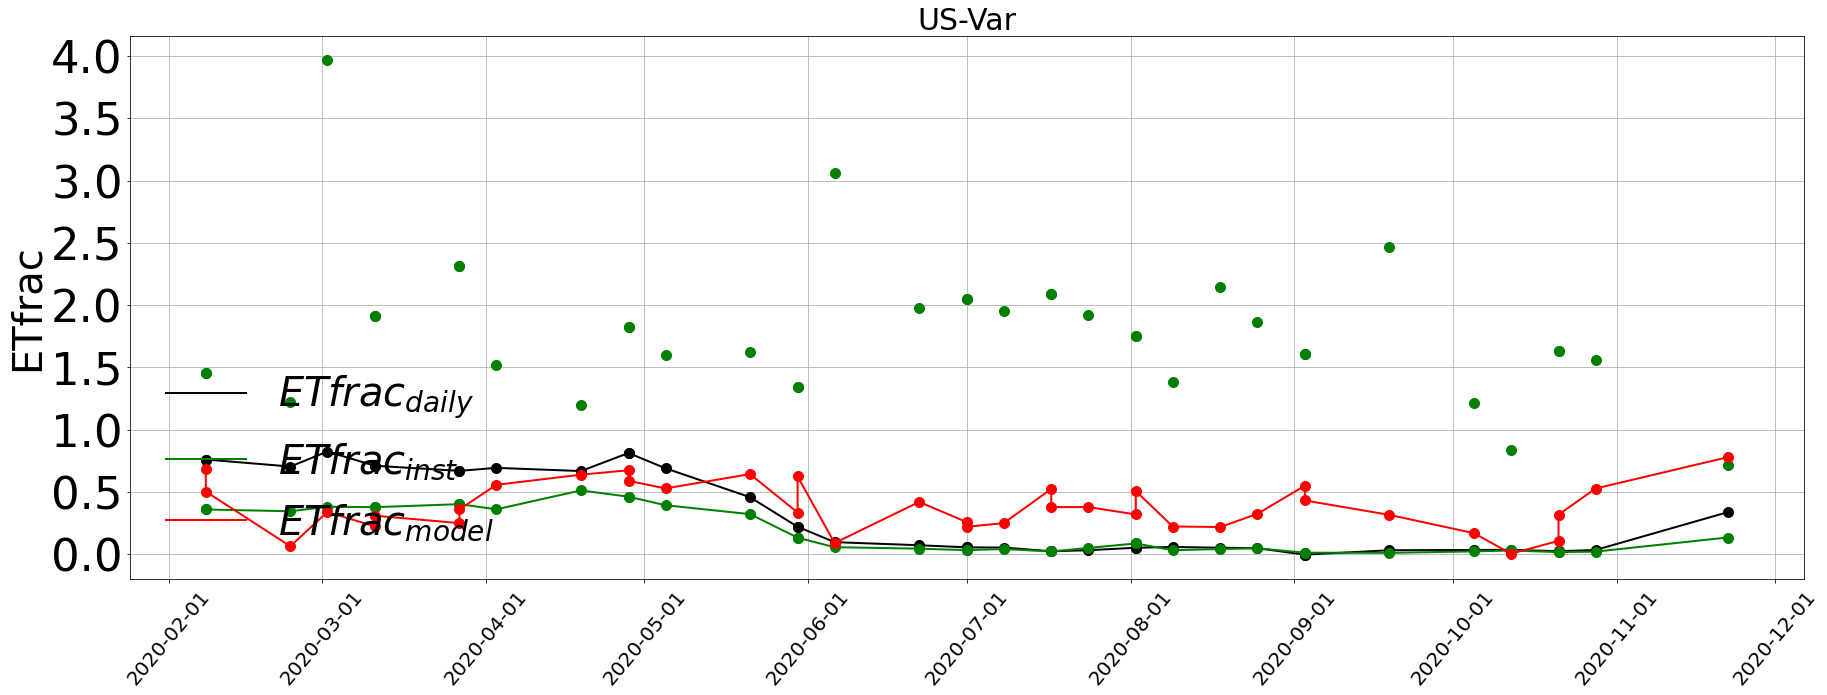

In [204]:
#### Plotting these (with G's i.e observed G's are not ideal and daily values have something)
fig,ax=plt.subplots(figsize=(30,10))
date_format = mdates.DateFormatter('%d\n%b')
##
# x=daily_data["bi1"][(daily_data["bi1"][cols[0]["LE"].iloc[0]].notna()) & (daily_data["bi1"]["ET_24h"].notna())][cols[0]["LE"].iloc[0]]
# y=daily_data["bi1"][(daily_data["bi1"][cols[0]["LE"].iloc[0]].notna()) & (daily_data["bi1"]["ET_24h"].notna())]["ET_24h"]
ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['ET_frac_daily_obs_G'],c="k",label="$ETfrac_{daily}$",linewidth=2)
ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['ET_frac_daily_obs_G'],"o",c="k",markersize=10)
ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['ET_frac_inst_obs'],c="g",label="$ETfrac_{inst}$",linewidth=2)
ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['ET_frac_inst_obs'],"o",c="g",markersize=10)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['SWC_PI_1_1_A'],"o",c="g",markersize=10)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['WS'],"o",c="g",markersize=10)

# ax.plot(daily_data["var"]["Date"],daily_data["var"]["ET_frac_sim"],c="r",label="$ETfrac_{sim}$",linewidth=2)
# ax.plot(daily_data["var"]["Date"],daily_data["var"]["ET_frac_sim"],"o",c="r",markersize=10)
ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]["EF"],c="r",label="$ETfrac_{model}$",linewidth=2)
ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]["EF"],"o",c="r",markersize=10)
# ax.set_ylim(-0.5,2)
ax.xaxis.set_major_locator(MonthLocator(interval=90))
ax.set_ylabel("ETfrac",fontsize=40)

ax.grid()

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# ax.set_xticklabels(["May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],fontsize=45)
ax.set_title("US-Var",fontsize=30)

# # ax.set_ylim(20,220)
plt.xticks(fontsize=20,rotation=50)
plt.yticks(fontsize=45)
# plt.xticks(fontsize=25)
ax.legend(fontsize=40,loc="lower left",frameon=False)

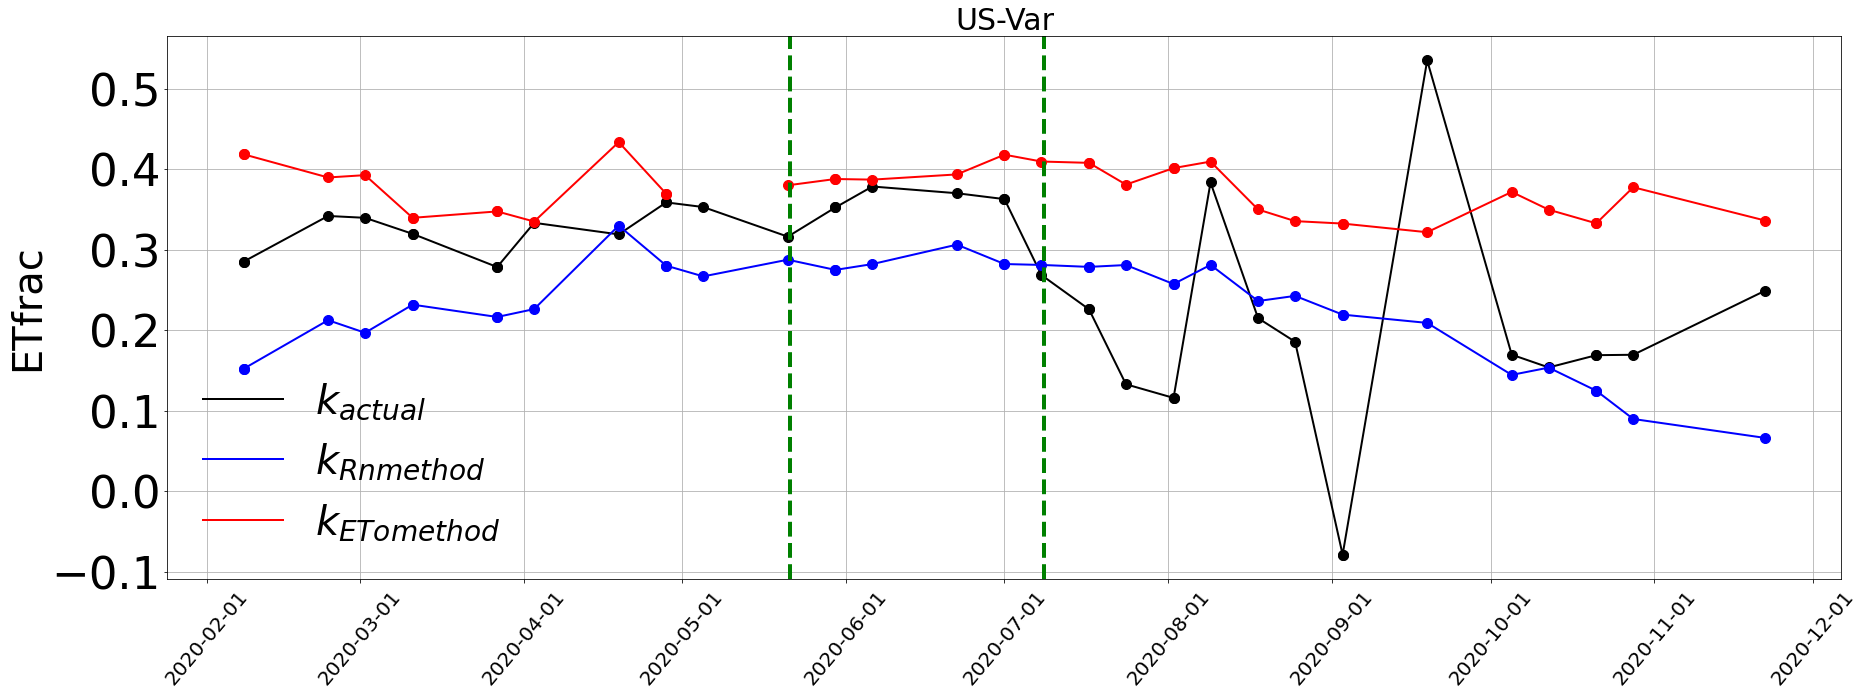

In [210]:
#### Plotting these (with G's i.e observed G's are not ideal and daily values have something)
fig,ax=plt.subplots(figsize=(30,10))
date_format = mdates.DateFormatter('%d\n%b')
##
# x=daily_data["bi1"][(daily_data["bi1"][cols[0]["LE"].iloc[0]].notna()) & (daily_data["bi1"]["ET_24h"].notna())][cols[0]["LE"].iloc[0]]
# y=daily_data["bi1"][(daily_data["bi1"][cols[0]["LE"].iloc[0]].notna()) & (daily_data["bi1"]["ET_24h"].notna())]["ET_24h"]
ax.plot(df_merge[df_merge.Date.dt.year==2020]["Date"],df_merge[df_merge.Date.dt.year==2020]['k_actual'],c="k",label="$k_{actual}$",linewidth=2)
ax.plot(df_merge[df_merge.Date.dt.year==2020]["Date"],df_merge[df_merge.Date.dt.year==2020]['k_actual'],"o",c="k",markersize=10)
ax.plot(df_merge[df_merge.Date.dt.year==2020]["Date"],df_merge[df_merge.Date.dt.year==2020]['k_rad'],c="b",label="$k_{Rn method}$",linewidth=2)
ax.plot(df_merge[df_merge.Date.dt.year==2020]["Date"],df_merge[df_merge.Date.dt.year==2020]['k_rad'],"o",c="b",markersize=10)
ax.plot(df_merge[df_merge.Date.dt.year==2020]["Date"],df_merge[df_merge.Date.dt.year==2020]['k_eto'],c="r",label="$k_{ETo method}$",linewidth=2)
ax.plot(df_merge[df_merge.Date.dt.year==2020]["Date"],df_merge[df_merge.Date.dt.year==2020]['k_eto'],"o",c="r",markersize=10)
# ax.set_ylim(-0.5,2)
ax.xaxis.set_major_locator(MonthLocator(interval=90))
ax.set_ylabel("ETfrac",fontsize=40)
plt.axvline(pd.Timestamp('2020-07-08 11:30:00'),color='g',linestyle="--",linewidth=4)
plt.axvline(pd.Timestamp('2020-05-21 11:30:00'),color='g',linestyle="--",linewidth=4)

ax.grid()

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# ax.set_xticklabels(["May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],fontsize=45)
ax.set_title("US-Var",fontsize=30)

# # ax.set_ylim(20,220)
plt.xticks(fontsize=20,rotation=50)
plt.yticks(fontsize=45)
# plt.xticks(fontsize=25)
ax.legend(fontsize=40,loc="lower left",frameon=False)

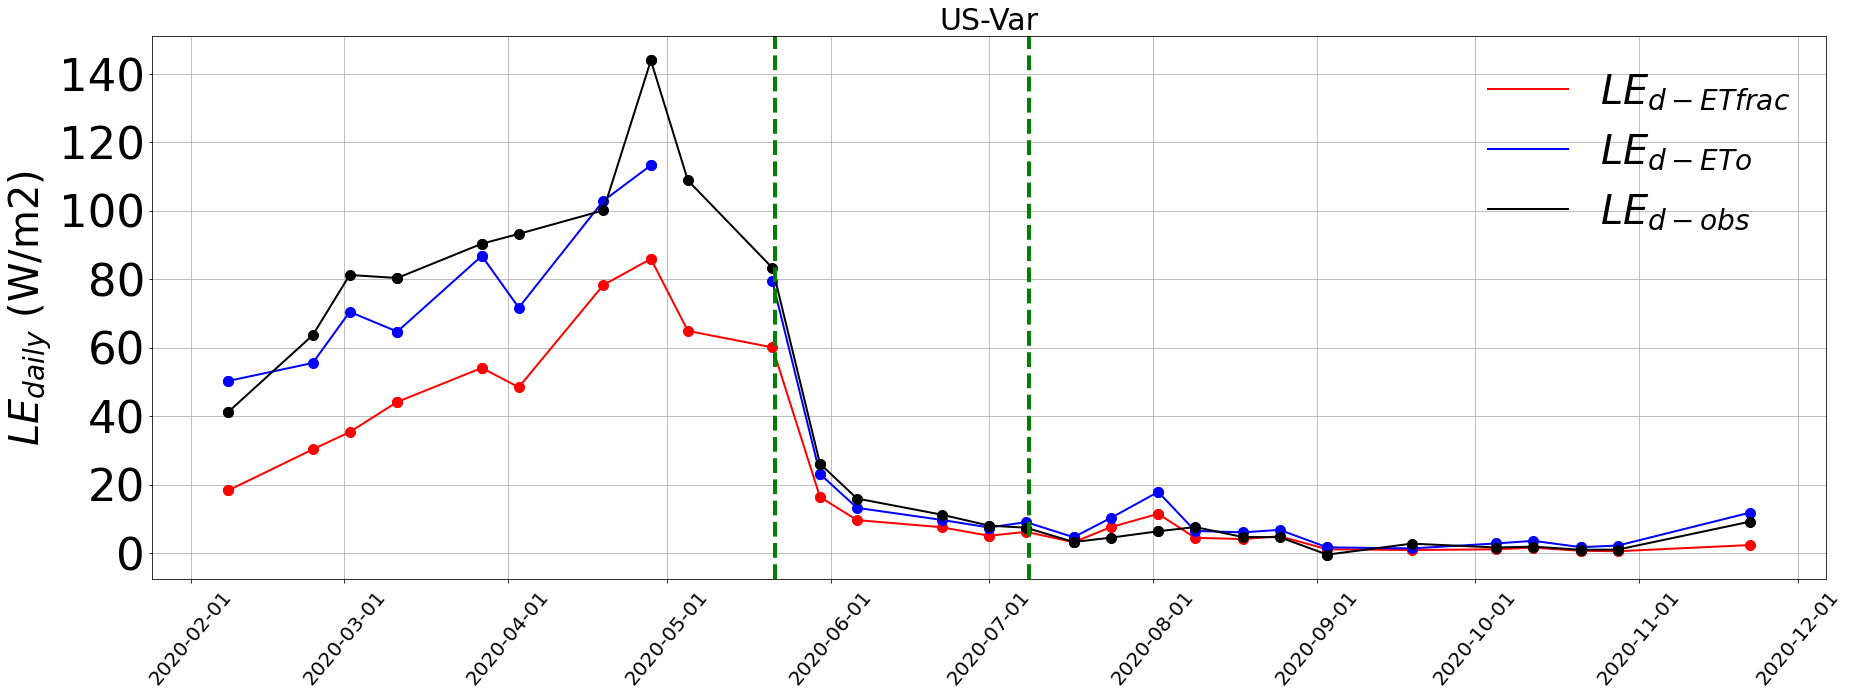

In [235]:
#### Plotting these (with G's i.e observed G's are not ideal and daily values have something)
fig,ax=plt.subplots(figsize=(30,10))
date_format = mdates.DateFormatter('%d\n%b')
##
# x=daily_data["bi1"][(daily_data["bi1"][cols[0]["LE"].iloc[0]].notna()) & (daily_data["bi1"]["ET_24h"].notna())][cols[0]["LE"].iloc[0]]
# y=daily_data["bi1"][(daily_data["bi1"][cols[0]["LE"].iloc[0]].notna()) & (daily_data["bi1"]["ET_24h"].notna())]["ET_24h"]
ax.plot(df_merge[df_merge.Date.dt.year==2020]["Date"],df_merge[df_merge.Date.dt.year==2020]['ET_ups_rad'],c="r",label="$LE_{d-ETfrac}$",linewidth=2)
ax.plot(df_merge[df_merge.Date.dt.year==2020]["Date"],df_merge[df_merge.Date.dt.year==2020]['ET_ups_rad'],"o",c="r",markersize=10)
ax.plot(df_merge[df_merge.Date.dt.year==2020]["Date"],df_merge[df_merge.Date.dt.year==2020]['ET_ups_eto'],c="b",label="$LE_{d-ETo}$",linewidth=2)
ax.plot(df_merge[df_merge.Date.dt.year==2020]["Date"],df_merge[df_merge.Date.dt.year==2020]['ET_ups_eto'],"o",c="b",markersize=10)
ax.plot(df_merge[df_merge.Date.dt.year==2020]["Date"],df_merge[df_merge.Date.dt.year==2020]['LE_closed']*28.36,c="k",label="$LE_{d-obs}$",linewidth=2)
ax.plot(df_merge[df_merge.Date.dt.year==2020]["Date"],df_merge[df_merge.Date.dt.year==2020]['LE_closed']*28.36,"o",c="k",markersize=10)
# ax.set_ylim(-0.5,2)
ax.xaxis.set_major_locator(MonthLocator(interval=90))
ax.set_ylabel("$LE_{daily}$ (W/m2)",fontsize=40)
plt.axvline(pd.Timestamp('2020-07-08 11:30:00'),color='g',linestyle="--",linewidth=4)
plt.axvline(pd.Timestamp('2020-05-21 11:30:00'),color='g',linestyle="--",linewidth=4)

ax.grid()

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# ax.set_xticklabels(["May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],fontsize=45)
ax.set_title("US-Var",fontsize=30)

# # ax.set_ylim(20,220)
plt.xticks(fontsize=20,rotation=50)
plt.yticks(fontsize=45)
# plt.xticks(fontsize=25)
ax.legend(fontsize=40,loc="upper right",frameon=False)

In [232]:
(df_merge[df_merge.Date.dt.year==2020]['ET_ups_rad'].mean()-df_merge[df_merge.Date.dt.year==2020]['LE_unclosed'].mean())/df_merge[df_merge.Date.dt.year==2020]['LE_unclosed'].mean()
# (df_merge[df_merge.Date.dt.year==2020]['ET_ups_eto'].mean()-df_merge[df_merge.Date.dt.year==2020]['LE_unclosed'].mean())/df_merge[df_merge.Date.dt.year==2020]['LE_unclosed'].mean()

-0.2211340158425721

In [233]:
df_merge[df_merge.Date.dt.year==2020]['LE_unclosed'].mean()

28.6454650625

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


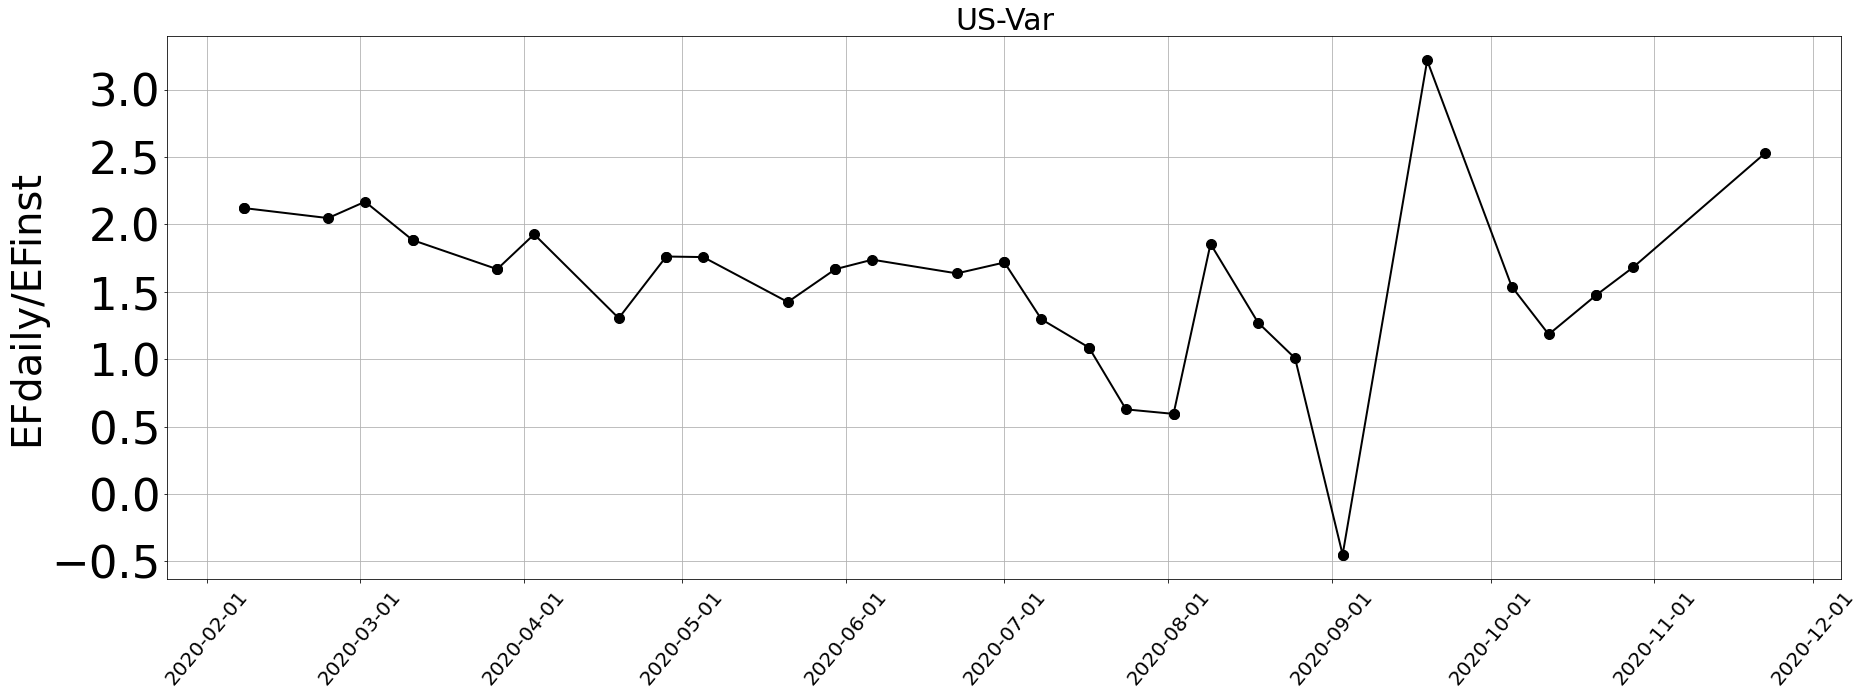

In [188]:
#### Plotting these (with G's i.e observed G's are not ideal and daily values have something)
fig,ax=plt.subplots(figsize=(30,10))
date_format = mdates.DateFormatter('%d\n%b')
##
# x=daily_data["bi1"][(daily_data["bi1"][cols[0]["LE"].iloc[0]].notna()) & (daily_data["bi1"]["ET_24h"].notna())][cols[0]["LE"].iloc[0]]
# y=daily_data["bi1"][(daily_data["bi1"][cols[0]["LE"].iloc[0]].notna()) & (daily_data["bi1"]["ET_24h"].notna())]["ET_24h"]
ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['ET_frac_daily_obs_G']/daily_data["var"][daily_data["var"].Date.dt.year==2020]['ET_frac_inst_obs'],c="k",linewidth=2)
ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['ET_frac_daily_obs_G']/daily_data["var"][daily_data["var"].Date.dt.year==2020]['ET_frac_inst_obs'],"o",c="k",markersize=10)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['ET_frac_inst_obs'],c="g",label="$ETfrac_{inst}$",linewidth=2)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['ET_frac_inst_obs'],"o",c="g",markersize=10)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['SWC_PI_1_1_A'],"o",c="g",markersize=10)

# ax.plot(daily_data["var"]["Date"],daily_data["var"]["ET_frac_sim"],c="r",label="$ETfrac_{sim}$",linewidth=2)
# ax.plot(daily_data["var"]["Date"],daily_data["var"]["ET_frac_sim"],"o",c="r",markersize=10)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]["EF"],c="b",label="$ETfrac_{sim}$",linewidth=2)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]["EF"],"o",c="b",markersize=10)
# ax.set_ylim(-0.5,2)
ax.xaxis.set_major_locator(MonthLocator(interval=90))
ax.set_ylabel("EFdaily/EFinst",fontsize=40)

ax.grid()

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# ax.set_xticklabels(["May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],fontsize=45)
ax.set_title("US-Var",fontsize=30)

# # ax.set_ylim(20,220)
plt.xticks(fontsize=20,rotation=50)
plt.yticks(fontsize=45)
# plt.xticks(fontsize=25)
ax.legend(fontsize=40,loc="upper left",frameon=False)

In [221]:
MAPE(daily_data["var"][daily_data["var"].Date.dt.year==2020]['LE_closed']*28.36,daily_data["var"][daily_data["var"].Date.dt.year==2020]["ET_sim_EFinst"]*28.36)
MAPE(daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]['LE_closed']*28.36,daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]["ET_sim_EFinst"]*28.36)

-36.15766063172878

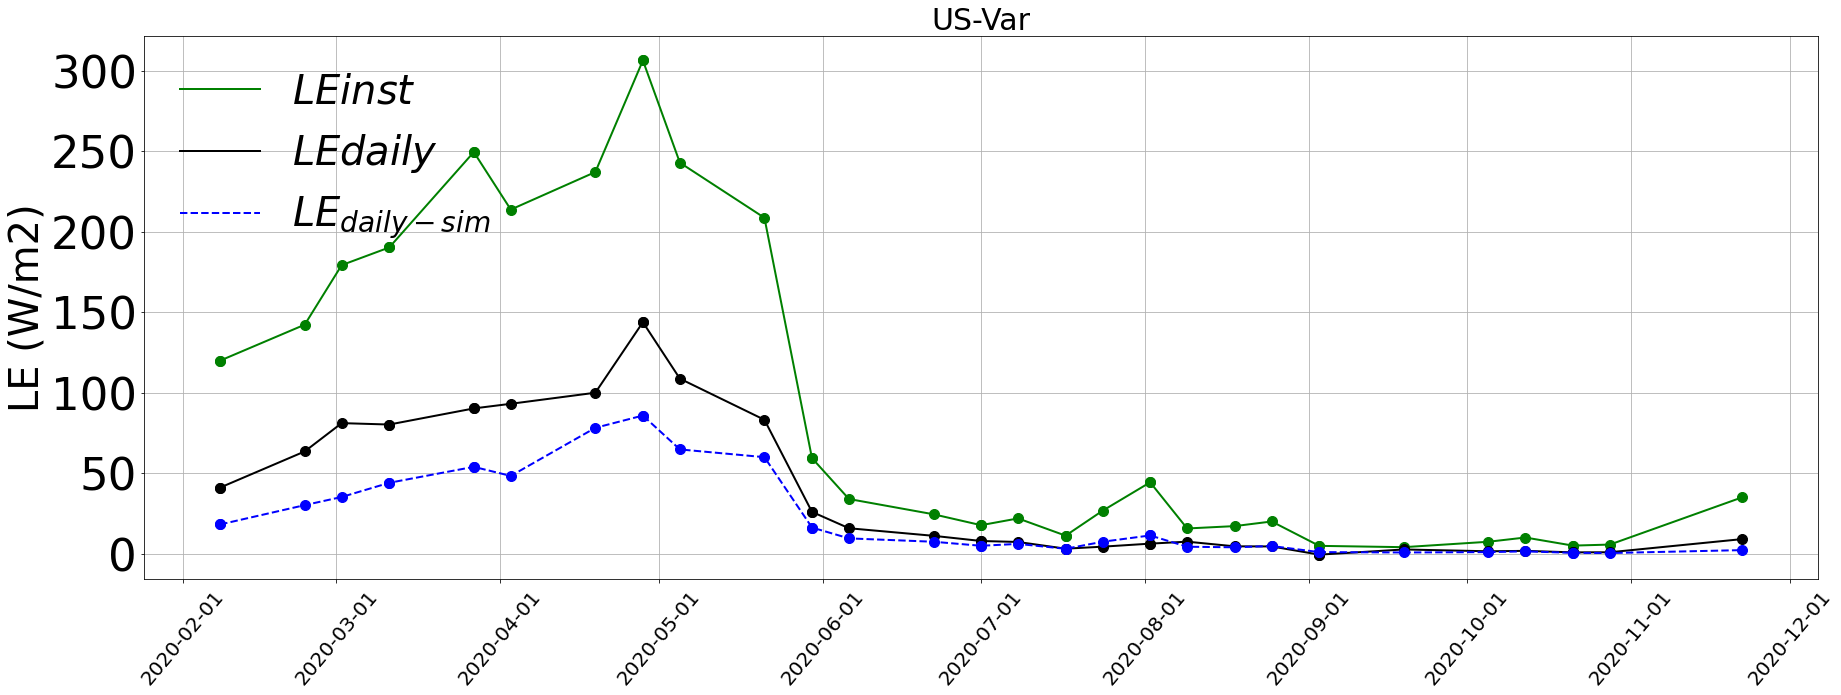

In [219]:
#### Plotting these (with G's i.e observed G's are not ideal and daily values have something)
fig,ax=plt.subplots(figsize=(30,10))
date_format = mdates.DateFormatter('%d\n%b')
##
# x=daily_data["bi1"][(daily_data["bi1"][cols[0]["LE"].iloc[0]].notna()) & (daily_data["bi1"]["ET_24h"].notna())][cols[0]["LE"].iloc[0]]
# y=daily_data["bi1"][(daily_data["bi1"][cols[0]["LE"].iloc[0]].notna()) & (daily_data["bi1"]["ET_24h"].notna())]["ET_24h"]
ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['LE_inst_af'],c="g",label="$LE inst$",linewidth=2)
ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['LE_inst_af'],"o",c="g",markersize=10)
ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['LE_closed']*28.36,c="k",label="$LE daily$",linewidth=2)
ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['LE_closed']*28.36,"o",c="k",markersize=10)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['SWC_PI_1_1_A'],"o",c="k",markersize=10)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['ET_sim_EFinst']*28.36,"o",c="k",markersize=10)
ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]["ET_sim_EFinst"]*28.36,"o",c="b",markersize=10)
ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]["ET_sim_EFinst"]*28.36,c="b",label="$LE_{daily-sim} $",linewidth=2,linestyle="--")


# ax.plot(daily_data["var"]["Date"],daily_data["var"]["ET_frac_sim"],c="r",label="$ETfrac_{sim}$",linewidth=2)
# ax.plot(daily_data["var"]["Date"],daily_data["var"]["ET_frac_sim"],"o",c="r",markersize=10)
# ax.plot(daily_data["var"]["Date"],daily_data["var"]["EF"],c="b",label="$ETfrac_{sim}$",linewidth=2)
# ax.plot(daily_data["var"]["Date"],daily_data["var"]["EF"],"o",c="b",markersize=10)
# ax.set_ylim(-0.5,2)
ax.xaxis.set_major_locator(MonthLocator(interval=90))
ax.set_ylabel("LE (W/m2)",fontsize=40)

ax.grid()

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# ax.set_xticklabels(["May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],fontsize=45)
ax.set_title("US-Var",fontsize=30)

# # ax.set_ylim(20,220)
plt.xticks(fontsize=20,rotation=50)
plt.yticks(fontsize=45)
# plt.xticks(fontsize=25)
ax.legend(fontsize=40,loc="upper left",frameon=False)

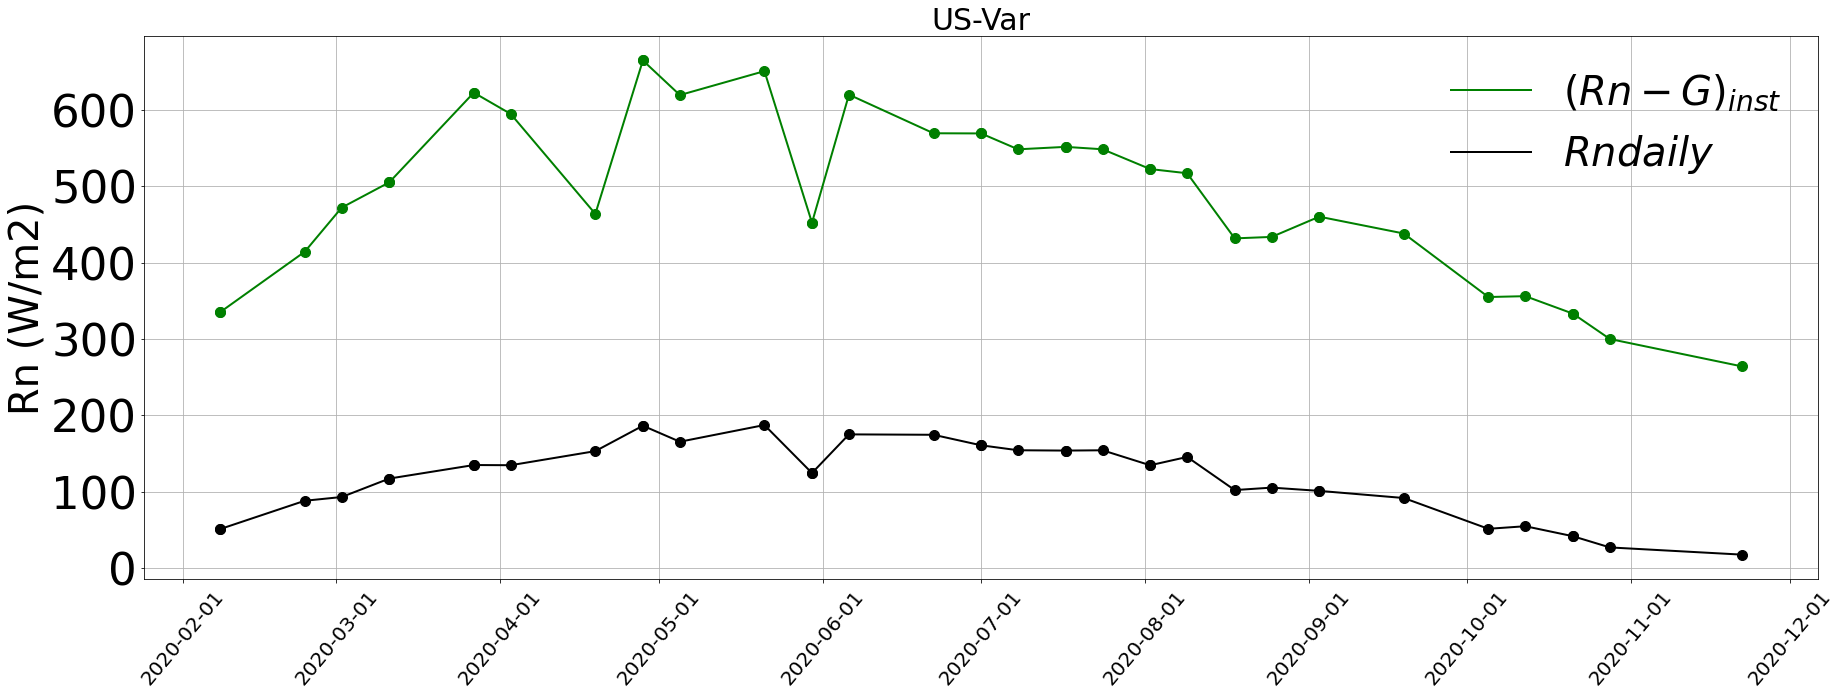

In [196]:
#### Plotting these (with G's i.e observed G's are not ideal and daily values have something)
fig,ax=plt.subplots(figsize=(30,10))
date_format = mdates.DateFormatter('%d\n%b')
##
# x=daily_data["bi1"][(daily_data["bi1"][cols[0]["LE"].iloc[0]].notna()) & (daily_data["bi1"]["ET_24h"].notna())][cols[0]["LE"].iloc[0]]
# y=daily_data["bi1"][(daily_data["bi1"][cols[0]["LE"].iloc[0]].notna()) & (daily_data["bi1"]["ET_24h"].notna())]["ET_24h"]
ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['Rn_inst_af']-daily_data["var"][daily_data["var"].Date.dt.year==2020]['G_inst_af'],c="g",label="$(Rn-G)_{inst}$",linewidth=2)
ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['Rn_inst_af']-daily_data["var"][daily_data["var"].Date.dt.year==2020]['G_inst_af'],"o",c="g",markersize=10)
ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['Rn_unclosed'],c="k",label="$Rn daily$",linewidth=2)
ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['Rn_unclosed'],"o",c="k",markersize=10)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['G_inst_af'],c="c",label="$G inst$",linewidth=2)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['G_inst_af'],"o",c="c",markersize=10)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['Rn'],c="r",label="$Rn daily$",linewidth=2)
# ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['Rn'],"o",c="r",markersize=10)
# ax.plot(daily_data["var"]["Date"],daily_data["var"]["ET_frac_sim"],c="r",label="$ETfrac_{sim}$",linewidth=2)
# ax.plot(daily_data["var"]["Date"],daily_data["var"]["ET_frac_sim"],"o",c="r",markersize=10)
# ax.plot(daily_data["var"]["Date"],daily_data["var"]["EF"],c="b",label="$ETfrac_{sim}$",linewidth=2)
# ax.plot(daily_data["var"]["Date"],daily_data["var"]["EF"],"o",c="b",markersize=10)
# ax.set_ylim(-0.5,2)
ax.xaxis.set_major_locator(MonthLocator(interval=90))
ax.set_ylabel("Rn (W/m2)",fontsize=40)

ax.grid()

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# ax.set_xticklabels(["May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],fontsize=45)
ax.set_title("US-Var",fontsize=30)

# # ax.set_ylim(20,220)
plt.xticks(fontsize=20,rotation=50)
plt.yticks(fontsize=45)
# plt.xticks(fontsize=25)
ax.legend(fontsize=40,loc="upper right",frameon=False)

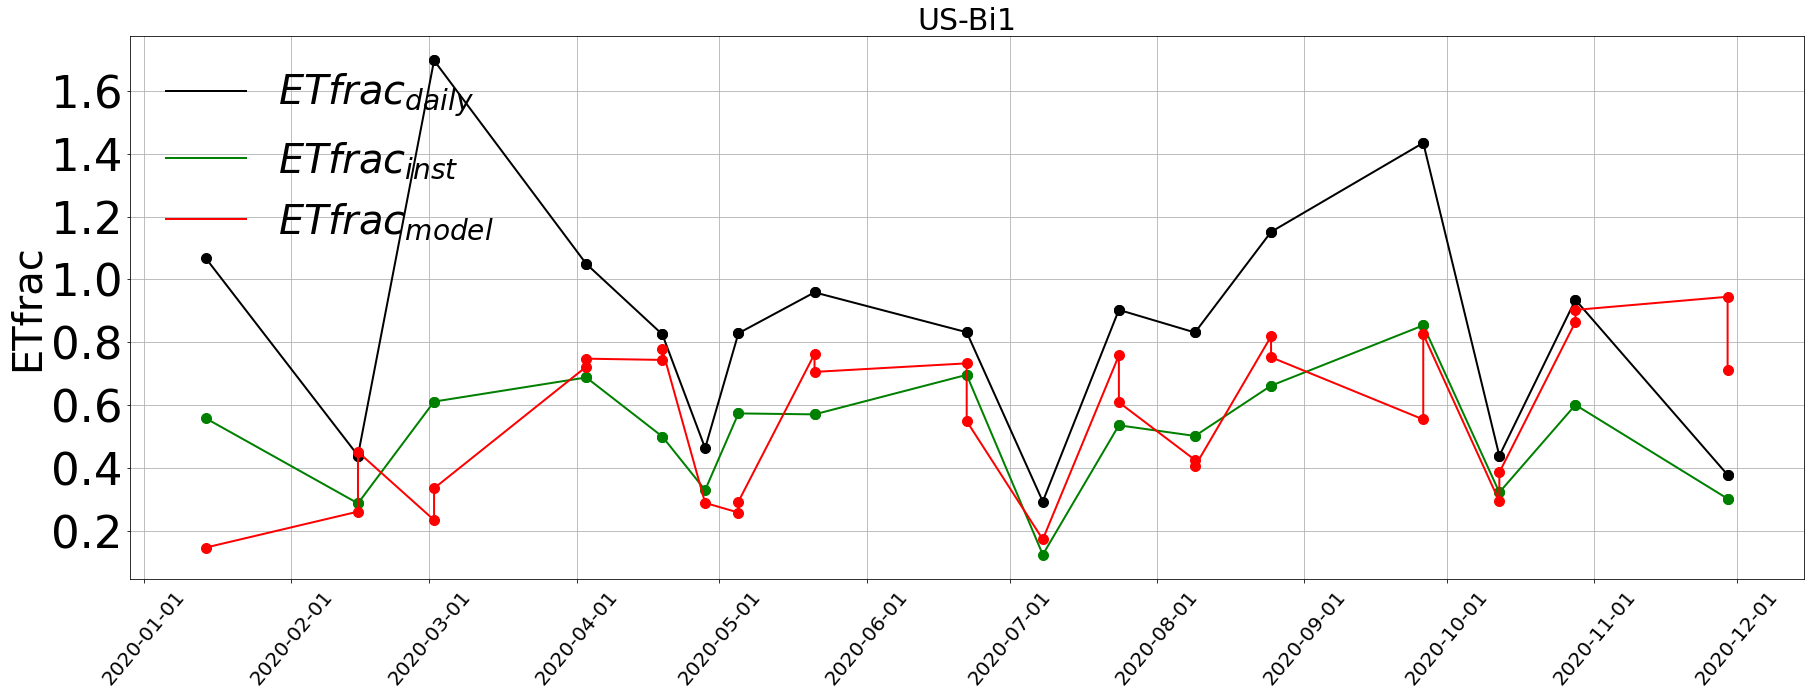

In [206]:
#### Plotting these (with G's i.e observed G's are not ideal and daily values have something)
fig,ax=plt.subplots(figsize=(30,10))
date_format = mdates.DateFormatter('%d\n%b')
##
# x=daily_data["bi1"][(daily_data["bi1"][cols[0]["LE"].iloc[0]].notna()) & (daily_data["bi1"]["ET_24h"].notna())][cols[0]["LE"].iloc[0]]
# y=daily_data["bi1"][(daily_data["bi1"][cols[0]["LE"].iloc[0]].notna()) & (daily_data["bi1"]["ET_24h"].notna())]["ET_24h"]
ax.plot(daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]["Date"],daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]['ET_frac_daily_obs_G'],c="k",label="$ETfrac_{daily}$",linewidth=2)
ax.plot(daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]["Date"],daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]['ET_frac_daily_obs_G'],"o",c="k",markersize=10)
ax.plot(daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]["Date"],daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]['ET_frac_inst_obs'],c="g",label="$ETfrac_{inst}$",linewidth=2)
ax.plot(daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]["Date"],daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]['ET_frac_inst_obs'],"o",c="g",markersize=10)
# ax.plot(daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]["Date"],daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]['SWC_PI_1'],"o",c="g",markersize=10)
# ax.plot(daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]["Date"],daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]['WS'],"o",c="g",markersize=10)

# # ax.plot(daily_data["bi1"]["Date"],daily_data["bi1"]["ET_frac_sim"],c="r",label="$ETfrac_{sim}$",linewidth=2)
# # ax.plot(daily_data["bi1"]["Date"],daily_data["bi1"]["ET_frac_sim"],"o",c="r",markersize=10)
ax.plot(daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]["Date"],daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]["EF"],c="r",label="$ETfrac_{model}$",linewidth=2)
ax.plot(daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]["Date"],daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]["EF"],"o",c="r",markersize=10)
# ax.set_ylim(0,2)
ax.xaxis.set_major_locator(MonthLocator(interval=90))
ax.set_ylabel("ETfrac",fontsize=40)

ax.grid()

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# ax.set_xticklabels(["May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],fontsize=45)
ax.set_title("US-Bi1",fontsize=30)

# # ax.set_ylim(20,220)
plt.xticks(fontsize=20,rotation=50)
plt.yticks(fontsize=45)
# plt.xticks(fontsize=25)
ax.legend(fontsize=40,loc="upper left",frameon=False)

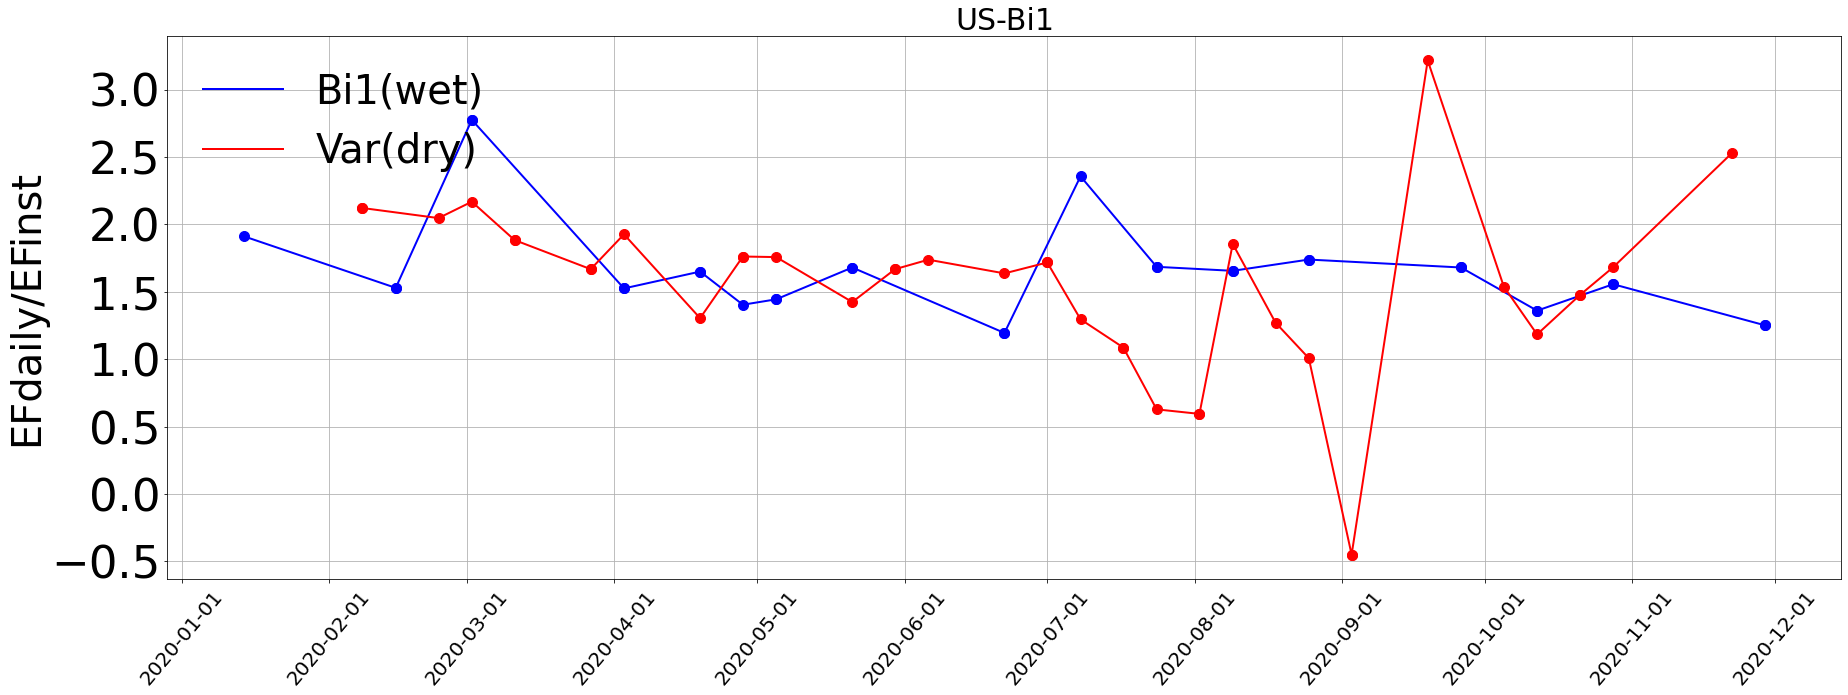

In [209]:
#### Plotting these (with G's i.e observed G's are not ideal and daily values have something)
fig,ax=plt.subplots(figsize=(30,10))
date_format = mdates.DateFormatter('%d\n%b')
##
# x=daily_data["bi1"][(daily_data["bi1"][cols[0]["LE"].iloc[0]].notna()) & (daily_data["bi1"]["ET_24h"].notna())][cols[0]["LE"].iloc[0]]
# y=daily_data["bi1"][(daily_data["bi1"][cols[0]["LE"].iloc[0]].notna()) & (daily_data["bi1"]["ET_24h"].notna())]["ET_24h"]
ax.plot(daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]["Date"],daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]['ET_frac_daily_obs_G']/daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]['ET_frac_inst_obs'],c="b",label="Bi1(wet)",linewidth=2)
ax.plot(daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]["Date"],daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]['ET_frac_daily_obs_G']/daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]['ET_frac_inst_obs'],"o",c="b",markersize=10)
ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['ET_frac_daily_obs_G']/daily_data["var"][daily_data["var"].Date.dt.year==2020]['ET_frac_inst_obs'],c="r",label="Var(dry)",linewidth=2)
ax.plot(daily_data["var"][daily_data["var"].Date.dt.year==2020]["Date"],daily_data["var"][daily_data["var"].Date.dt.year==2020]['ET_frac_daily_obs_G']/daily_data["var"][daily_data["var"].Date.dt.year==2020]['ET_frac_inst_obs'],"o",c="r",markersize=10)

# ax.plot(daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]["Date"],daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]['ET_frac_inst_obs'],c="g",label="$ETfrac_{inst}$",linewidth=2)
# ax.plot(daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]["Date"],daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]['ET_frac_inst_obs'],"o",c="g",markersize=10)
# ax.plot(daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]["Date"],daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]['SWC_PI_1'],"o",c="g",markersize=10)

# # ax.plot(daily_data["bi1"]["Date"],daily_data["bi1"]["ET_frac_sim"],c="r",label="$ETfrac_{sim}$",linewidth=2)
# # ax.plot(daily_data["bi1"]["Date"],daily_data["bi1"]["ET_frac_sim"],"o",c="r",markersize=10)
# ax.plot(daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]["Date"],daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]["EF"],c="b",label="$ETfrac_{sim}$",linewidth=2)
# ax.plot(daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]["Date"],daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]["EF"],"o",c="b",markersize=10)
# ax.set_ylim(0,2)
ax.xaxis.set_major_locator(MonthLocator(interval=90))
ax.set_ylabel("EFdaily/EFinst",fontsize=40)

ax.grid()

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# ax.set_xticklabels(["May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],fontsize=45)
ax.set_title("US-Bi1",fontsize=30)

# # ax.set_ylim(20,220)
plt.xticks(fontsize=20,rotation=50)
plt.yticks(fontsize=45)
# plt.xticks(fontsize=25)
ax.legend(fontsize=40,loc="upper left",frameon=False)

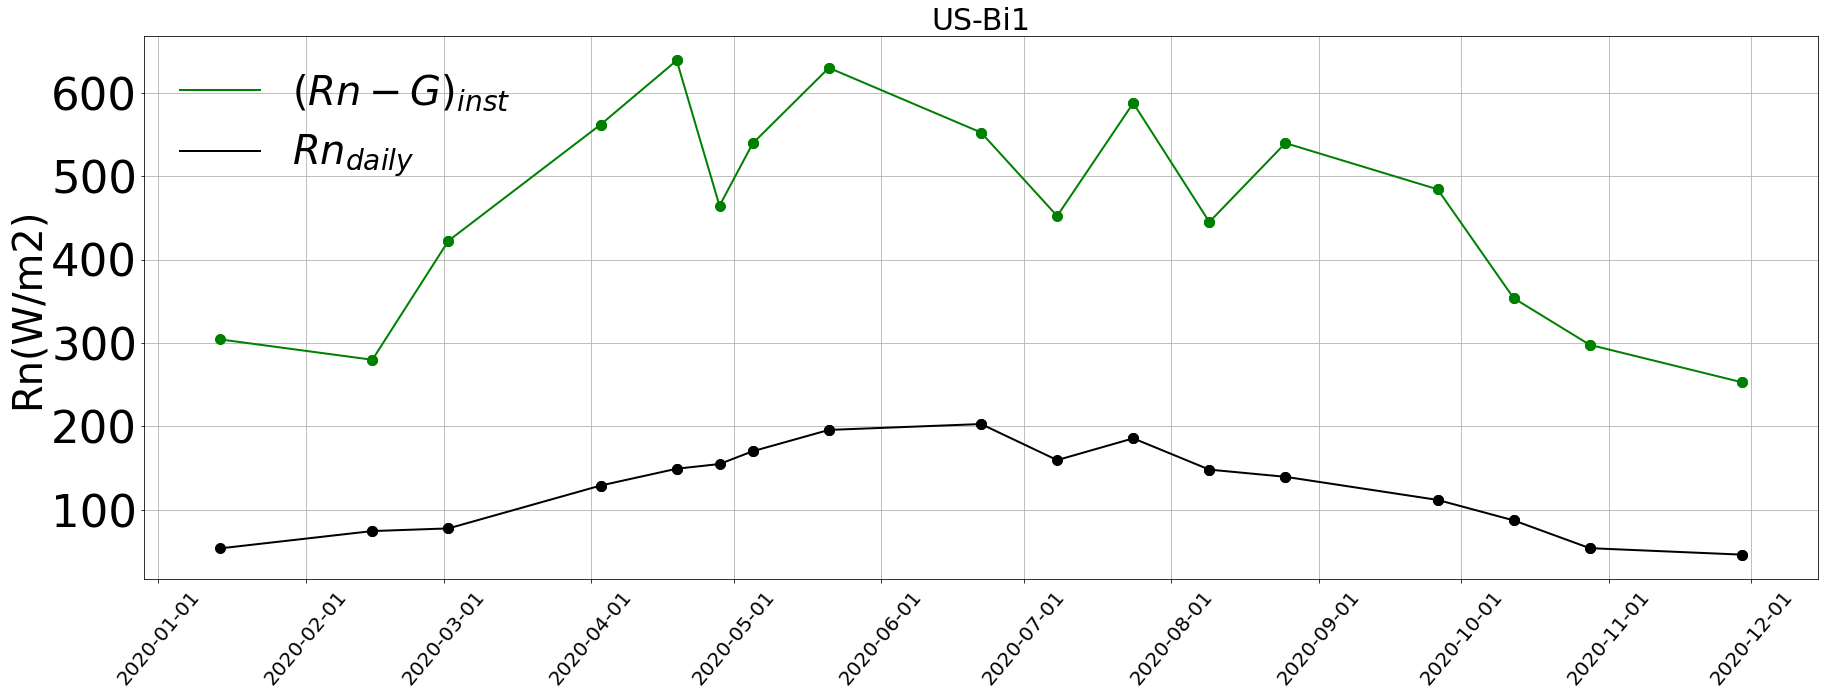

In [199]:
#### Plotting these (with G's i.e observed G's are not ideal and daily values have something)
fig,ax=plt.subplots(figsize=(30,10))
date_format = mdates.DateFormatter('%d\n%b')
##
# x=daily_data["bi1"][(daily_data["bi1"][cols[0]["LE"].iloc[0]].notna()) & (daily_data["bi1"]["ET_24h"].notna())][cols[0]["LE"].iloc[0]]
# y=daily_data["bi1"][(daily_data["bi1"][cols[0]["LE"].iloc[0]].notna()) & (daily_data["bi1"]["ET_24h"].notna())]["ET_24h"]
ax.plot(daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]["Date"],daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]['Rn_inst_af']-daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]['G_inst_af'],c="g",label="$(Rn-G)_{inst}$",linewidth=2)
ax.plot(daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]["Date"],daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]['Rn_inst_af']-daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]['G_inst_af'],"o",c="g",markersize=10)
ax.plot(daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]["Date"],daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]['Rn_unclosed'],c="k",label="$Rn_{daily}$",linewidth=2)
ax.plot(daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]["Date"],daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]['Rn_unclosed'],"o",c="k",markersize=10)
# # ax.plot(daily_data["bi1"]["Date"],daily_data["bi1"]["ET_frac_sim"],c="r",label="$ETfrac_{sim}$",linewidth=2)
# # ax.plot(daily_data["bi1"]["Date"],daily_data["bi1"]["ET_frac_sim"],"o",c="r",markersize=10)
# ax.plot(daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]["Date"],daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]["EF"],c="b",label="$ETfrac_{sim}$",linewidth=2)
# ax.plot(daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]["Date"],daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]["EF"],"o",c="b",markersize=10)
# ax.set_ylim(0,2)
ax.xaxis.set_major_locator(MonthLocator(interval=90))
ax.set_ylabel("Rn(W/m2)",fontsize=40)

ax.grid()

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# ax.set_xticklabels(["May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],fontsize=45)
ax.set_title("US-Bi1",fontsize=30)
# # ax.set_ylim(20,220)
plt.xticks(fontsize=20,rotation=50)
plt.yticks(fontsize=45)
# plt.xticks(fontsize=25)
ax.legend(fontsize=40,loc="upper left",frameon=False)

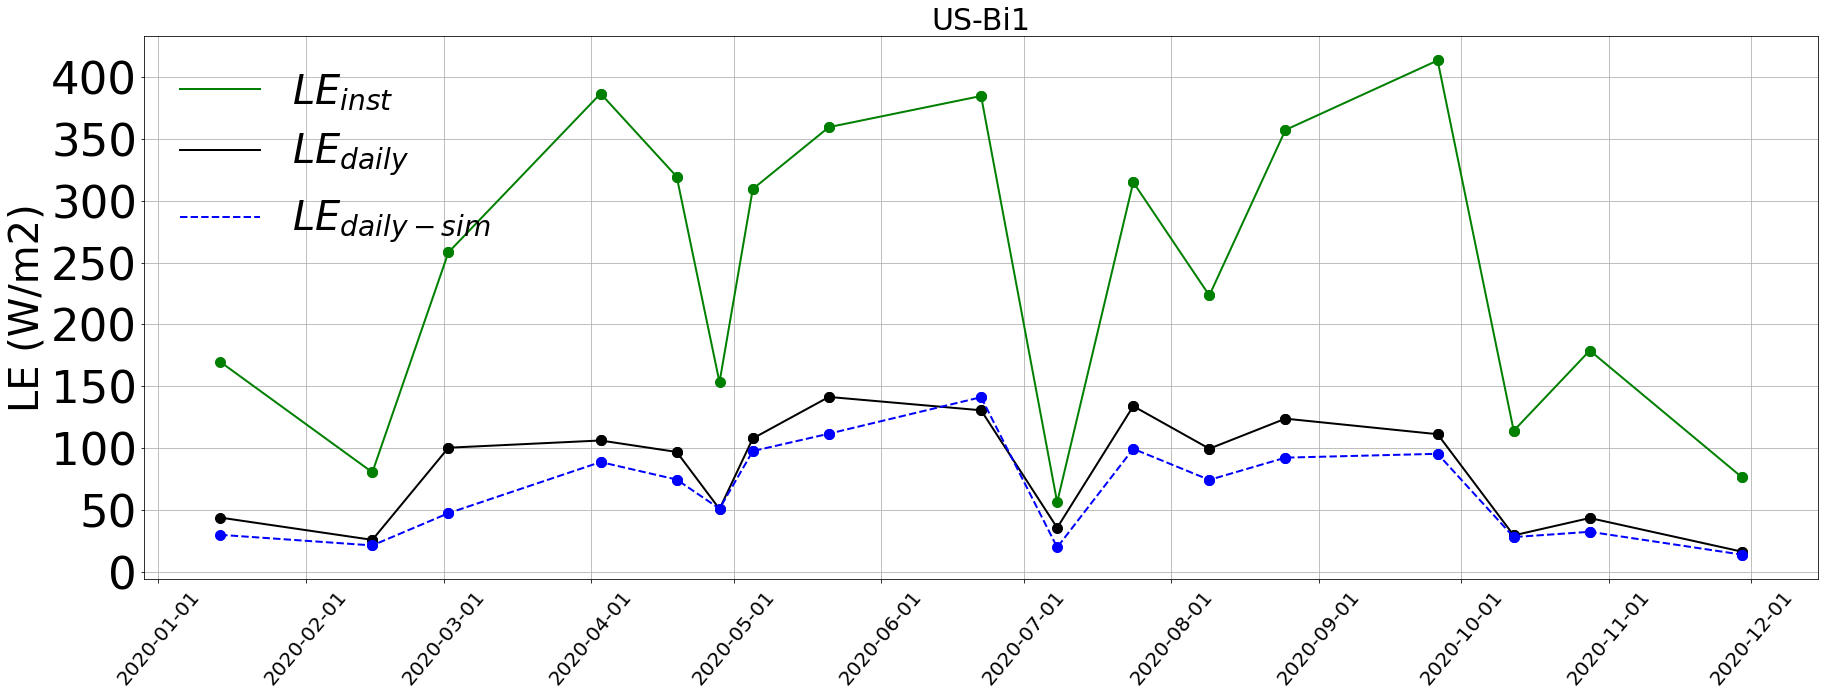

In [218]:
#### Plotting these (with G's i.e observed G's are not ideal and daily values have something)
fig,ax=plt.subplots(figsize=(30,10))
date_format = mdates.DateFormatter('%d\n%b')
##
# x=daily_data["bi1"][(daily_data["bi1"][cols[0]["LE"].iloc[0]].notna()) & (daily_data["bi1"]["ET_24h"].notna())][cols[0]["LE"].iloc[0]]
# y=daily_data["bi1"][(daily_data["bi1"][cols[0]["LE"].iloc[0]].notna()) & (daily_data["bi1"]["ET_24h"].notna())]["ET_24h"]
ax.plot(daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]["Date"],daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]['LE_inst_af'],c="g",label="$LE_{inst}$",linewidth=2)
ax.plot(daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]["Date"],daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]['LE_inst_af'],"o",c="g",markersize=10)
ax.plot(daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]["Date"],daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]['LE_unclosed'],c="k",label="$LE_{daily}$",linewidth=2)
ax.plot(daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]["Date"],daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]['LE_unclosed'],"o",c="k",markersize=10)
# # ax.plot(daily_data["bi1"]["Date"],daily_data["bi1"]["ET_frac_sim"],c="r",label="$ETfrac_{sim}$",linewidth=2)
# # ax.plot(daily_data["bi1"]["Date"],daily_data["bi1"]["ET_frac_sim"],"o",c="r",markersize=10)
# ax.plot(daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]["Date"],daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]["EF"],c="b",label="$ETfrac_{sim}$",linewidth=2)
# ax.plot(daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]["Date"],daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]["EF"],"o",c="b",markersize=10)
ax.plot(daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]["Date"],daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]["ET_sim_EFinst"]*28.36,"o",c="b",markersize=10)
ax.plot(daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]["Date"],daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]["ET_sim_EFinst"]*28.36,c="b",label="$LE_{daily-sim} $",linewidth=2,linestyle="--")


# ax.set_ylim(0,2)
ax.xaxis.set_major_locator(MonthLocator(interval=90))
ax.set_ylabel("LE (W/m2)",fontsize=40)

ax.grid()

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# ax.set_xticklabels(["May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],fontsize=45)
ax.set_title("US-Bi1",fontsize=30)
# # ax.set_ylim(20,220)
plt.xticks(fontsize=20,rotation=50)
plt.yticks(fontsize=45)
# plt.xticks(fontsize=25)
ax.legend(fontsize=40,loc="upper left",frameon=False)

In [200]:
0.2/1.2

0.16666666666666669

In [ ]:
#### Plotting these (with G's i.e observed G's are not ideal and daily values have something)
fig,ax=plt.subplots(figsize=(30,10))
date_format = mdates.DateFormatter('%d\n%b')
##
# x=daily_data["bi1"][(daily_data["bi1"][cols[0]["LE"].iloc[0]].notna()) & (daily_data["bi1"]["ET_24h"].notna())][cols[0]["LE"].iloc[0]]
# y=daily_data["bi1"][(daily_data["bi1"][cols[0]["LE"].iloc[0]].notna()) & (daily_data["bi1"]["ET_24h"].notna())]["ET_24h"]
ax.plot(daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]["Date"],daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]['LE_inst_af'],c="g",label="$LE_{inst}$",linewidth=2)
ax.plot(daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]["Date"],daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]['LE_inst_af'],"o",c="g",markersize=10)
ax.plot(daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]["Date"],daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]['LE_unclosed'],c="k",label="$LE_{daily}$",linewidth=2)
ax.plot(daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]["Date"],daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]['LE_unclosed'],"o",c="k",markersize=10)
# # ax.plot(daily_data["bi1"]["Date"],daily_data["bi1"]["ET_frac_sim"],c="r",label="$ETfrac_{sim}$",linewidth=2)
# # ax.plot(daily_data["bi1"]["Date"],daily_data["bi1"]["ET_frac_sim"],"o",c="r",markersize=10)
# ax.plot(daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]["Date"],daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]["EF"],c="b",label="$ETfrac_{sim}$",linewidth=2)
# ax.plot(daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]["Date"],daily_data["bi1"][daily_data["bi1"].Date.dt.year==2020]["EF"],"o",c="b",markersize=10)
# ax.set_ylim(0,2)
ax.xaxis.set_major_locator(MonthLocator(interval=90))
ax.set_ylabel("LE (W/m2)",fontsize=40)

ax.grid()

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# ax.set_xticklabels(["May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],fontsize=45)
ax.set_title("US-Bi1",fontsize=30)
# # ax.set_ylim(20,220)
plt.xticks(fontsize=20,rotation=50)
plt.yticks(fontsize=45)
# plt.xticks(fontsize=25)
ax.legend(fontsize=40,loc="upper left",frameon=False)

In [25]:
## Here we will copmare the same days we select for LE daily with the instantaneous observations
# So wherever the days match we will keep the observations 
merged_inst={}
for i, key in enumerate(daily_data):
    # print(daily_data[key][cols[i]["LE"].iloc[0]].dropna().shape)
    merged_inst[key]=inst_data[key][inst_data[key]["Date"].isin(daily_data[key]["Date"])]
    merged_inst[key]=merged_inst[key][merged_inst[key]["LEinst"]>0]

In [99]:
## Here we will copmare the same days we select for LE daily with the instantaneous observations
# So wherever the days match we will keep the observations 
inst_daily={}
for i, key in enumerate(daily_data):
    # print(daily_data[key][cols[i]["LE"].iloc[0]].dropna().shape)
    daily_data[key]=daily_data[key].rename(columns={cols[i]["LE"].iloc[0]:"LE_d",cols[i]["H"].iloc[0]:"H_d",cols[i]["G"].iloc[0]:"G_d",cols[i]["Rn"].iloc[0]:"Rn_d"} )
    inst_daily[key]=pd.merge(daily_data[key],inst_data[key],on="Date",how="left")

In [101]:
for i, key in enumerate(inst_daily):
    # print(daily_data[key][cols[i]["LE"].iloc[0]].dropna().shape)
    inst_daily[key]["LE_inst_error"]=inst_daily[key]["LE_inst_y"]
    inst_daily[key]=pd.merge(daily_data[key],inst_data[key],on="Date",how="left")

0    376.431589
1    376.431589
2    376.431589
3    376.431589
Name: LE_PI_F, dtype: float64


In [10]:
south=pd.read_csv("C:\\Rouhin_Lenovo\\US_project\\Alfalfa\\Data_download\\EC_data\\Palo_Verde_EC\\south_pvid_processed.csv",parse_dates=["Date"])
alfa=pd.read_csv("C:\\Users\\rouhi\\Downloads\\alfa_concat.csv",parse_dates=["date"])
alfa["Date"]=pd.to_datetime(alfa["date"].dt.date)
merged_data=pd.merge(alfa,south,on="Date",how="left")
# merged_data=merged_data[(merged_data["Date"].dt.month>=3) & (merged_data["Date"].dt.month<=9)]

C:\Users\rouhi\AppData\Local\Temp\ipykernel_5604\3611021750.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_data=pd.merge(alfa,south,on="Date",how="left")


In [1]:
# create a 3x2 grid of subplots
from sklearn.metrics import r2_score
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# plot data in the first subplot
ax = axes[0]
ax.plot(daily_data["bi1"]["LE_unclosed"]/28.36, daily_data["bi1"]["ET_24h"],"o")
ax.plot(np.linspace(0,8,3),np.linspace(0,8,3), ls='--', c='r')
x=daily_data["bi1"][(daily_data["bi1"]["LE_unclosed"].notna()) & (daily_data["bi1"]["ET_24h"].notna())]["LE_unclosed"]/28.36
y=daily_data["bi1"][(daily_data["bi1"]["LE_unclosed"].notna()) & (daily_data["bi1"]["ET_24h"].notna())]["ET_24h"]
bias_bi1=MAPE(x,y)
rmse_bi1=rmse(x,y)
r2 = r2_score(x, y)
ax.annotate(f'$R^2$={r2:.2f}', xy=(0.7, 0.1), xycoords='axes fraction',fontsize=15)
ax.annotate('RMSE=1.12 mm/day \n                  (42.2%)', xy=(0.5, 0.2), xycoords='axes fraction',fontsize=12)

ax.set_ylabel("Daily ET GEESEBAL(mm/day)",fontsize=15)
ax.set_xlabel("Daily ET Observed(mm/day)",fontsize=15)

ax.set_title('US-Bi1 (Alfalfa)',fontsize=20)

# plot data in the second subplot
ax = axes[1]
ax.plot(daily_data["var"]["LE_unclosed"]/28.36, daily_data["var"]["ET_24h"],"o")
ax.plot(np.linspace(0,8,3),np.linspace(0,8,3), ls='--', c='r')
x=daily_data["var"][(daily_data["var"]["LE_unclosed"].notna()) & (daily_data["var"]["ET_24h"].notna())& (daily_data["var"]["ET_24h"]<=4)]["LE_unclosed"]/28.36
y=daily_data["var"][(daily_data["var"]["LE_unclosed"].notna()) & (daily_data["var"]["ET_24h"].notna())& (daily_data["var"]["ET_24h"]<=4)]["ET_24h"]
bias_var=MAPE(x,y)
rmse_var=rmse(x,y)
r2 = r2_score(x,y,multioutput='variance_weighted',)
ax.annotate(f'$R^2$={r2:.2f}', xy=(0.7, 0.1), xycoords='axes fraction',fontsize=15)
ax.annotate('RMSE=2.06mm/day \n                   (213%)', xy=(0.5, 0.2), xycoords='axes fraction',fontsize=12)

ax.set_title('US-Var (Grassland-dry)',fontsize=20)
ax.set_ylabel("Daily ET GEESEBAL(mm/day)",fontsize=15)
ax.set_xlabel("Daily ET Observed(mm/day)",fontsize=15)

# plot data in the third subplot
ax = axes[2]
ax.plot(alfa["LE"]/28.36, alfa["ET_24h"],"o")
ax.plot(np.linspace(0,8,3),np.linspace(0,8,3), ls='--', c='r')
x=alfa[(alfa["LE"].notna()) & (alfa["ET_24h"].notna()) & (alfa["ET_24h"]>0.5)]["LE"]/28.36
y=merged_data[(alfa["LE"].notna()) & (alfa["ET_24h"].notna()) & (alfa["ET_24h"]>0.5)]["ET_24h"]
bias_wkg=MAPE(x,y)
rmse_wkg=rmse(x,y)
r2 = r2_score(x, y)
ax.annotate(f'$R^2$={r2:.2f}', xy=(0.7, 0.1), xycoords='axes fraction',fontsize=15)
ax.annotate('RMSE=1.433 mm/day \n                   (27.6%)', xy=(0.5, 0.2), xycoords='axes fraction',fontsize=12)

ax.set_title('PVID (Irrigated Alfalfa)',fontsize=20)
ax.set_ylabel("Daily ET GEESEBAL(mm/day)",fontsize=15)
ax.set_xlabel("Daily ET Observed(mm/day)",fontsize=15)

# set spacing between subplots
fig.tight_layout()

# display the plot
plt.show()



NameError: name 'plt' is not defined

,Date,id,LEinst,LE_inst_af,T_LST_DEM,dT,rah,rah_first,TA,ET_24h,LE_closed,dT_insitu,NDVI
0,2018-02-02,LC08_043034_20180202,27.856408,92.895,296.261674,3.150930,16.374193,277.257050,19.38,0.198926,1.249291,3.721674,0.560671
1,2018-02-09,LC08_044033_20180209,6.198837,129.640,296.731615,4.541798,18.574251,62.075779,19.72,0.046940,1.862510,3.851615,0.653611
2,2018-02-25,LC08_044033_20180225,186.270634,120.000,292.790502,2.982459,20.385410,44.356548,11.17,1.669898,1.873232,8.460502,0.652884
3,2018-03-06,LC08_043034_20180306,281.626365,112.170,294.809527,2.692603,24.089378,88.602357,13.89,2.287206,2.352598,7.759527,0.656076
4,2018-04-14,LC08_044033_20180414,262.611369,270.270,302.628592,3.952177,18.926917,46.888503,20.67,3.249096,4.487331,8.798592,0.726024
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,2022-03-24,LC08_044033_20220324,246.005324,203.480,305.634502,2.949008,18.220100,33.990583,23.80,2.763519,3.061339,8.674502,0.799062
157,2022-04-18,LC08_043033_20220418,360.929908,193.110,297.830705,2.413370,17.774536,28.945582,17.45,4.380896,2.833975,7.220705,0.664048
158,2022-04-18,LC08_043034_20220418,433.359940,193.110,297.673109,2.002835,18.499018,28.993463,17.45,4.897288,2.833975,7.063109,0.659088
159,2022-05-11,LC08_044033_20220511,28.046004,90.588,309.102011,5.348499,12.898609,21.341128,17.47,0.430852,1.352111,18.472011,0.513841


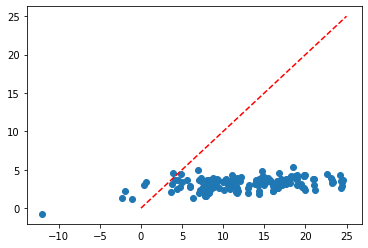

In [261]:
## 
daily_data["var"]["dT_insitu"]=daily_data["var"]["T_LST_DEM"]-daily_data["var"]["TA"]-273.16
plt.plot(daily_data["var"]["dT_insitu"],daily_data["var"]["dT"],"o")
plt.plot(np.linspace(0,25,3),np.linspace(0,25,3), ls='--', c='r')
daily_data["var"][["Date","id","LEinst","LE_inst_af","T_LST_DEM","dT","rah","rah_first","TA","ET_24h","LE_closed","dT_insitu","NDVI"]]

# print(daily_data["var"].columns.to_list())

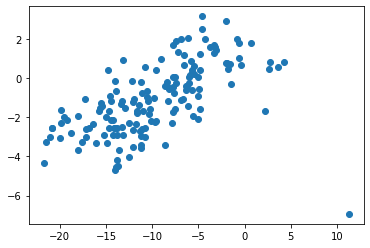

In [233]:
plt.plot(daily_data["var"]["dT"]-daily_data["var"]["dT_insitu"],daily_data["var"]["LE_closed"]-daily_data["var"]["ET_24h"],"o")


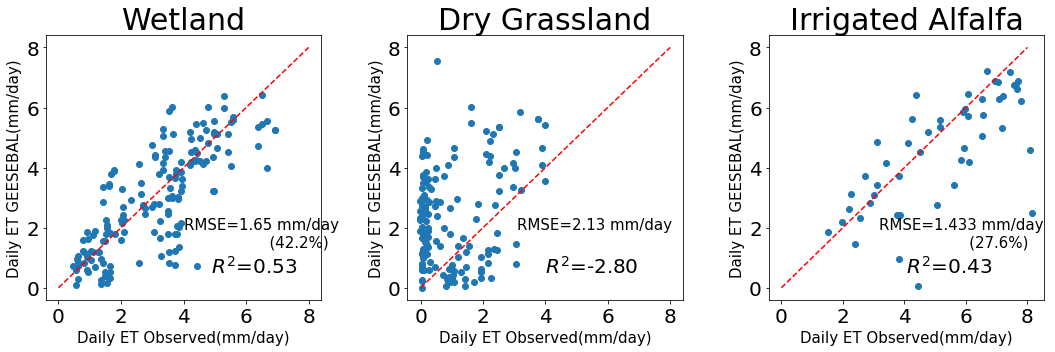

In [74]:
# create a 3x2 grid of subplots
from sklearn.metrics import r2_score
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# plot data in the first subplot
ax = axes[0]
ax.plot(daily_data["bi1"]["LE_unclosed"]/28.36, daily_data["bi1"]["ET_24h"],"o")
ax.plot(np.linspace(0,8,3),np.linspace(0,8,3), ls='--', c='r')
x=daily_data["bi1"][(daily_data["bi1"]["LE_unclosed"].notna()) & (daily_data["bi1"]["ET_24h"].notna())]["LE_unclosed"]/28.36
y=daily_data["bi1"][(daily_data["bi1"]["LE_unclosed"].notna()) & (daily_data["bi1"]["ET_24h"].notna())]["ET_24h"]
bias_bi1=MAPE(x,y)
rmse_bi1=rmse(x,y)
r2 = r2_score(x, y)
ax.annotate(f'$R^2$={r2:.2f}', xy=(0.6, 0.1), xycoords='axes fraction',fontsize=20)
ax.annotate('RMSE=1.65 mm/day \n                  (42.2%)', xy=(0.5, 0.2), xycoords='axes fraction',fontsize=15)

ax.set_ylabel("Daily ET GEESEBAL(mm/day)",fontsize=15)
ax.set_xlabel("Daily ET Observed(mm/day)",fontsize=15)

ax.set_title('Wetland',fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xticks([0,2,4,6,8])

# plot data in the second subplot
ax = axes[1]
ax.plot(daily_data["var"]["LE_unclosed"]/28.36, daily_data["var"]["ET_24h"],"o")
ax.plot(np.linspace(0,8,3),np.linspace(0,8,3), ls='--', c='r')
x=daily_data["var"][(daily_data["var"]["LE_unclosed"].notna()) & (daily_data["var"]["ET_24h"].notna())& (daily_data["var"]["ET_24h"]<=4)]["LE_unclosed"]/28.36
y=daily_data["var"][(daily_data["var"]["LE_unclosed"].notna()) & (daily_data["var"]["ET_24h"].notna())& (daily_data["var"]["ET_24h"]<=4)]["ET_24h"]
bias_var=MAPE(x,y)
rmse_var=rmse(x,y)
r2 = r2_score(x,y,multioutput='variance_weighted',)
ax.annotate(f'$R^2$={r2:.2f}', xy=(0.5, 0.1), xycoords='axes fraction',fontsize=20)
ax.annotate('RMSE=2.13 mm/day \n                   ', xy=(0.4, 0.2), xycoords='axes fraction',fontsize=15)
# ax.tick_params(axis='both', which='major', labelsize=20)

ax.set_title('Dry Grassland',fontsize=30)
ax.set_ylabel("Daily ET GEESEBAL(mm/day)",fontsize=15)
ax.set_xlabel("Daily ET Observed(mm/day)",fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xticks([0,2,4,6,8])

# plot data in the third subplot
ax = axes[2]
ax.plot(alfa["LE"]/28.36, alfa["ET_24h"],"o")
ax.plot(np.linspace(0,8,3),np.linspace(0,8,3), ls='--', c='r')
x=alfa[(alfa["LE"].notna()) & (alfa["ET_24h"].notna()) & (alfa["ET_24h"]>0.5)]["LE"]/28.36
y=merged_data[(alfa["LE"].notna()) & (alfa["ET_24h"].notna()) & (alfa["ET_24h"]>0.5)]["ET_24h"]
bias_wkg=MAPE(x,y)
rmse_wkg=rmse(x,y)
r2 = r2_score(x, y)
ax.annotate(f'$R^2$={r2:.2f}', xy=(0.5, 0.1), xycoords='axes fraction',fontsize=20)
ax.annotate('RMSE=1.433 mm/day \n                   (27.6%)', xy=(0.4, 0.2), xycoords='axes fraction',fontsize=15)

ax.set_title('Irrigated Alfalfa',fontsize=30)
ax.set_ylabel("Daily ET GEESEBAL(mm/day)",fontsize=15)
ax.set_xlabel("Daily ET Observed(mm/day)",fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xticks([0,2,4,6,8])
# set spacing between subplots
fig.tight_layout()
# display the plot
plt.show()



In [61]:
def rmse(Y_actual,Y_Predicted):
    return mean_squared_error(Y_actual,Y_Predicted,squared=False)

In [63]:
rmse(daily_data["bi1"][(daily_data["bi1"]["ET_24h"]>0) & (daily_data["bi1"]["LE_unclosed"].notna())]["LE_closed"],\
                       daily_data["bi1"][(daily_data["bi1"]["ET_24h"]>0) & (daily_data["bi1"]["LE_unclosed"].notna())]["ET_24h"])  
# rmse(daily_data["var"][(daily_data["var"]["ET_24h"]>0) & (daily_data["var"]["LE_unclosed"].notna())]["LE_unclosed"]/28.36,\
#                        daily_data["var"][(daily_data["var"]["ET_24h"]>0) & (daily_data["var"]["LE_unclosed"].notna())]["ET_24h"])  
# rmse(alfa[(alfa["LE"]>0) & (alfa["ET_24h"].notna())& (alfa["ET_24h"]>0.5)]["LE"]/28.36,\
#                        alfa[(alfa["LE"]>0) & (alfa["ET_24h"].notna())& (alfa["ET_24h"]>0.5)]["ET_24h"])  
# rmse(daily_data["tw3"][(daily_data["tw3"]["ET_24h"]>0) & (daily_data["tw3"]["LE_unclosed"].notna())]["LE_unclosed"]/28.36,\
#                        daily_data["tw3"][(daily_data["tw3"]["ET_24h"]>0) & (daily_data["tw3"]["LE_unclosed"].notna())]["ET_24h"])  


1.6596869305031459

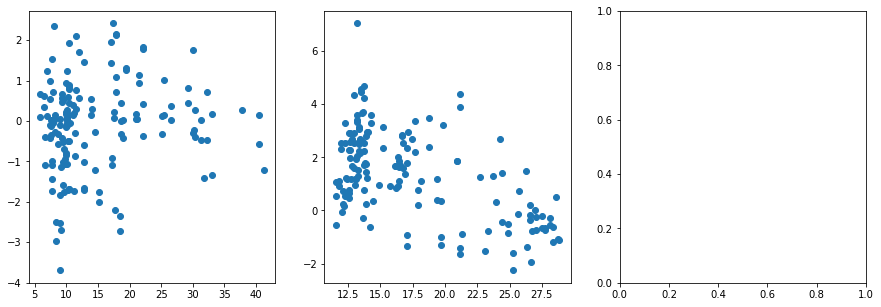

In [72]:
from sklearn.metrics import r2_score
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# plot data in the first subplot
ax = axes[0]
ax.plot( daily_data["bi1"]["SWC_PI_1"],daily_data["bi1"]["ET_24h"]-(daily_data["bi1"]["LE_unclosed"]/28.36),"o")
# ax.plot(np.linspace(0,8,3),np.linspace(0,8,3), ls='--', c='r')
x=daily_data["bi1"][(daily_data["bi1"]["LE_unclosed"].notna()) & (daily_data["bi1"]["ET_24h"].notna())]["LE_unclosed"]/28.36
## Vaira
ax = axes[1]
ax.plot( daily_data["var"]["SWC_PI_F_1_3_A"],daily_data["var"]["ET_24h"]-(daily_data["var"]["LE_unclosed"]/28.36),"o")
# ax.plot(np.linspace(0,8,3),np.linspace(0,8,3), ls='--', c='r')
x=daily_data["var"][(daily_data["var"]["LE_unclosed"].notna()) & (daily_data["var"]["ET_24h"].notna())]["LE_unclosed"]/28.36

In [99]:
def error(df,Y_actual,Y_Predicted,var):
    print("Y_actual nans",df[Y_actual].isna().sum())
    print("y_predict nans",df[Y_Predicted].isna().sum())
    df[var] = ((df[Y_Predicted]-df[Y_actual])/df[Y_actual])*100
    print(df[var].describe())
    return df

In [93]:
pd.concat([daily_data["bi1"],daily_data["tw3"]])

,Unnamed: 0.2,Date,LE_closed,LE_unclosed,H_closed,H_unclosed,G_unclosed,Rn_unclosed,Name_x,Unnamed: 0,...,Tao_sa,Tao_ding,Tao_sebal_insitu,Datetime_Local_y,Name,NDVI,TAU_SSITC_TEST,SWC_1_1_1,SWC_1_2_1,PPFD_DIF
0,0,2016-08-14,5.683132,124.552358,-17.816028,-13.767938,10.416033,172.893813,US-Bi1,60,...,0.813810,0.713810,0.738841,2016-08-14 12:00:00-07:00,US-Bi1,NaN,NaN,NaN,NaN,NaN
1,1,2016-08-14,5.683132,124.552358,-17.816028,-13.767938,10.416033,172.893813,US-Bi1,62,...,0.813810,0.713810,0.738841,2016-08-14 12:00:00-07:00,US-Bi1,NaN,NaN,NaN,NaN,NaN
2,2,2016-08-30,4.485553,105.393536,18.113692,15.007168,8.151061,155.140392,US-Bi1,61,...,0.811750,0.711750,0.738325,2016-08-30 12:00:00-07:00,US-Bi1,NaN,NaN,NaN,NaN,NaN
3,3,2016-08-30,4.485553,105.393536,18.113692,15.007168,8.151061,155.140392,US-Bi1,63,...,0.811750,0.711750,0.738325,2016-08-30 12:00:00-07:00,US-Bi1,NaN,NaN,NaN,NaN,NaN
4,4,2016-09-15,4.552919,103.198135,4.953275,3.958842,1.970989,125.023925,US-Bi1,64,...,0.808789,0.708789,0.721332,2016-09-15 12:00:00-07:00,US-Bi1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,58,2018-02-25,2.121443,45.864862,13.842503,10.552540,3.699592,72.926762,US-Tw3,112,...,0.800965,0.700965,0.761030,2018-02-25 11:00:00-08:00,US-Tw3,0.842422,1.0,30.7140,13.7465,163.556338
59,59,2018-03-29,4.534653,90.649269,3.586983,2.528386,5.234287,128.752790,US-Tw3,115,...,0.809698,0.709698,0.740769,2018-03-29 12:00:00-07:00,US-Tw3,0.902329,0.0,38.0455,14.4890,207.394366
60,60,2018-03-29,4.534653,90.649269,3.586983,2.528386,5.234287,128.752790,US-Tw3,116,...,0.809698,0.709698,0.740769,2018-03-29 12:00:00-07:00,US-Tw3,0.901212,0.0,38.0455,14.4890,207.394366
61,61,2018-04-14,2.616937,63.830268,67.225150,57.817455,6.410875,162.619871,US-Tw3,117,...,0.812366,0.712366,0.749763,2018-04-14 12:00:00-07:00,US-Tw3,0.585884,0.0,38.2490,14.8520,170.422535


In [97]:
print(daily_data["tw3"].columns.to_list())

['Unnamed: 0.2', 'Date', 'LE_closed', 'LE_unclosed', 'H_closed', 'H_unclosed', 'G_unclosed', 'Rn_unclosed', 'Name_x', 'Unnamed: 0', 'Unnamed: 0_x', 'Unnamed: 0.1', 'id', 'longitude', 'latitude', 'date', 'UB', 'B', 'GR', 'R', 'NIR', 'SWIR_1', 'SWIR_2', 'ST_B10', 'pixel_qa', 'ALFA', 'NDVI', 'EVI', 'SAVI', 'T_LST', 'LAI', 'e_0', 'e_NB', 'longitude.1', 'latitude.1', 'NDVI_neg', 'pos_NDVI', 'int', 'sd_ndvi', 'NDWI', 'LST_neg', 'LST_NW', 'T_LST_DEM', 'LST_neg_1', 'LST_NW_1', 'Tao_sw', 'EA', 'W_ATM', 'Rl_up', 'Rs_down', 'Tao_sw_1', 'ES', 'EA_1', 'Rl_down', 'Rn', 'Ginst', 'zom', 'u_fr', 'Hinst', 'rah', 'dT', 'rah_first', 'zom_1', 'u_fr_1', 'ufric_star', 'ET_inst', 'ET_24h', 'LEinst', 'EF', 'id.1', 'longitude.2', 'latitude.2', 'Rn24h_G', 'AirT_G', 'RH_G', 'ux_G', 'SW_Down', 'cold_pixel_lat', 'cold_pixel_lon', 'cold_pixel_ndvi', 'cold_pixel_sum', 'cold_pixel_temp', 'hot_pixel_sum', 'hot_pixel_lat', 'hot_pixel_lon', 'hot_pixel_ndvi', 'hot_pixel_Rn', 'hot_pixel_G', 'hot_pixel_temp', 'zenith_angle'

In [236]:
##lets calculate errors in albedo
alb=error(daily_data["tw3"],"Albedo","ALFA","Albedo_error")
tao=error(daily_data["tw3"],"Tao_sw_am","Tao_sw","tao_error") #Remove error<100
sw=error(daily_data["tw3"],"SW_IN","Rs_down","rs_down_error") #Remove error<100
lwin=error(daily_data["tw3"],"LW_IN","Rl_down","lw_down_error")
lwout=error(daily_data["tw3"],"LW_OUT","Rl_up","lw_up_error") 
netrad=error(daily_data["tw3"],"Rn_inst_af","Rn","netrad_error") #Remove error<97
g=error(daily_data["tw3"],"G_inst_af","Ginst","g_error") #Remove error<97
h=error(daily_data["tw3"],"H_inst_af","Hinst","h_error") #Remove error >-3000 &<3000
le=error(daily_data["tw3"],"LE_inst_af","LEinst","le_error") #Remove error >-3000 &<3000
le_d=error(daily_data["tw3"],"LE_closed","ET_24h","le_d_error") #Remove error >-3000 &<3000
## What if we use Ts-Ta as dT in the model(ddoes the error in that dT sebal affect errors)
daily_data["tw3"]["dT_insitu"]=daily_data["tw3"]["T_LST_DEM"]-daily_data["tw3"]["TA"]-273.16
dt=error(daily_data["tw3"],"dT_insitu","dT","dT_error") #Remove error >-3000 &<3000




Y_actual nans 0
y_predict nans 0
Y_actual nans 0
y_predict nans 0
Y_actual nans 0
y_predict nans 0
Y_actual nans 0
y_predict nans 0
Y_actual nans 0
y_predict nans 0
Y_actual nans 0
y_predict nans 0
Y_actual nans 0
y_predict nans 0
Y_actual nans 0
y_predict nans 0
Y_actual nans 0
y_predict nans 0
Y_actual nans 0
y_predict nans 0
Y_actual nans 0
y_predict nans 0


In [237]:
##lets calculate errors in albedo
alb=error(daily_data["bi1"],"Albedo","ALFA","Albedo_error")
tao=error(daily_data["bi1"],"Tao_sw_am","Tao_sw","tao_error") #Remove error<100
sw=error(daily_data["bi1"],"SW_IN","Rs_down","rs_down_error") #Remove error<100
lwin=error(daily_data["bi1"],"LW_IN","Rl_down","lw_down_error")
lwout=error(daily_data["bi1"],"LW_OUT","Rl_up","lw_up_error") 
netrad=error(daily_data["bi1"],"Rn_inst_af","Rn","netrad_error") #Remove error<97
g=error(daily_data["bi1"],"G_inst_af","Ginst","g_error") #Remove error<97
h=error(daily_data["bi1"],"H_inst_af","Hinst","h_error") #Remove error >-3000 &<3000
le=error(daily_data["bi1"],"LE_inst_af","LEinst","le_error") #Remove error >-3000 &<3000
le_d=error(daily_data["bi1"],"LE_closed","ET_24h","le_d_error") #Remove error >-3000 &<3000
## What if we use Ts-Ta as dT in the model(ddoes the error in that dT sebal affect errors)
daily_data["bi1"]["dT_insitu"]=daily_data["bi1"]["T_LST_DEM"]-daily_data["bi1"]["TA"]-273.16
dt=error(daily_data["bi1"],"dT_insitu","dT","dT_error") #Remove error >-3000 &<3000


Y_actual nans 0
y_predict nans 0
Y_actual nans 0
y_predict nans 0
Y_actual nans 0
y_predict nans 0
Y_actual nans 0
y_predict nans 0
Y_actual nans 0
y_predict nans 0
Y_actual nans 0
y_predict nans 0
Y_actual nans 0
y_predict nans 0
Y_actual nans 0
y_predict nans 0
Y_actual nans 0
y_predict nans 0
Y_actual nans 0
y_predict nans 0
Y_actual nans 5
y_predict nans 0


In [136]:
print(sw["rs_down_error"].describe())
print(lwin["lw_down_error"].describe())
print(lwin["lw_up_error"].describe())
print(netrad["netrad_error"].describe()) #97 $ max
print(g["g_error"].describe()) #97 $ max
print(h["h_error"].describe()) #97 $ max
print(le["le_error"].describe()) #97 $ max
print(le_d["le_d_error"].describe()) #97 $ max


count    161.000000
mean      -6.555429
std        9.472702
min      -20.855944
25%       -9.618714
50%       -8.008957
75%       -6.193624
max       73.875970
Name: rs_down_error, dtype: float64
count    161.000000
mean      -6.585261
std        6.066951
min      -21.104382
25%      -10.044591
50%       -7.383021
75%       -2.063761
max        8.094292
Name: lw_down_error, dtype: float64
count    161.000000
mean      -0.781127
std        4.108174
min      -12.918655
25%       -2.790354
50%       -0.960406
75%        1.774809
max        9.552994
Name: lw_up_error, dtype: float64
count    161.000000
mean      -7.488552
std       16.611728
min      -22.243175
25%      -15.142055
50%      -10.671265
75%       -4.757221
max      130.922852
Name: netrad_error, dtype: float64
count    161.000000
mean      -4.365441
std       35.828887
min      -69.548635
25%      -26.702020
50%       -7.949130
75%       15.851490
max      126.831621
Name: g_error, dtype: float64
count     161.000000
mean    

In [238]:
a=daily_data["tw3"][["Albedo_error","tao_error","rs_down_error","lw_down_error","lw_up_error","netrad_error","g_error","h_error","le_error","le_d_error","dT_error"]]
b=daily_data["bi1"][["Albedo_error","tao_error","rs_down_error","lw_down_error","lw_up_error","netrad_error","g_error","h_error","le_error","le_d_error","dT_error"]]
alfa_error=pd.concat([a,b])

In [239]:
alfa_error.corr()
alfa_error.to_csv("C:\\Users\\rouhi\\Downloads\\Alfa_error.csv")

In [ ]:
### Random Forest (of errors)

In [241]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
#- Read dataframe
print(alfa_error.columns)
# df.columns
df_select=alfa_error.dropna()
features=df_select[["Albedo_error","tao_error","rs_down_error","lw_down_error","lw_up_error","netrad_error","g_error","h_error","le_error","dT_error"]]
labels=df_select['le_d_error']

Index(['Albedo_error', 'tao_error', 'rs_down_error', 'lw_down_error',
       'lw_up_error', 'netrad_error', 'g_error', 'h_error', 'le_error',
       'le_d_error', 'dT_error'],
      dtype='object')


In [242]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 39)

In [243]:
train_features

,Albedo_error,tao_error,rs_down_error,lw_down_error,lw_up_error,netrad_error,g_error,h_error,le_error,dT_error
107,-12.470421,-9.435451,-7.607307,-14.952892,1.767093,-16.603257,3.969990,105.285109,-7.827027,-83.034807
9,-10.535385,-10.135949,-8.435132,-6.391876,3.737364,-13.653428,28.071404,46.510334,6.173363,-66.882998
142,-17.158725,0.776781,1.085385,-9.207869,-0.606964,-0.352492,38.882337,-175.629345,18.891501,-59.274259
122,6.447471,27.960941,-3.201268,-12.309017,-11.504472,-7.051841,-68.712810,28.186262,110.173394,-71.322277
55,-10.085879,-4.443124,-9.456783,-7.521501,-1.681650,-16.021298,74.088540,38.444931,-40.716955,-71.941934
...,...,...,...,...,...,...,...,...,...,...
89,-8.378883,22.190610,-0.906128,-16.087622,-6.383417,-9.027281,-59.554219,148.483302,-5.604370,-50.754991
5,-17.017966,-4.549738,-6.768150,-8.367741,4.774572,-14.304306,6.946716,100.521063,-29.253968,-64.955967
43,-1.766295,-11.400560,-8.623276,-4.791513,2.764446,-16.918925,-19.360171,179.019567,-53.127772,-70.746062
46,-11.110271,-6.882249,-4.529592,-12.549216,3.665605,-15.142055,28.211872,75.955991,-78.719190,-79.926291


In [244]:
from sklearn import metrics
def create_polynomial_regression_model(degree):
  "Creates a polynomial regression model for the given degree"
  
  poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
  train_features_poly = poly_features.fit_transform(train_features)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(train_features_poly, train_labels)
  
  # predicting on training data-set
  train_labels_predicted = poly_model.predict(train_features_poly)
  
  # predicting on test data-set
  test_labels_predict = poly_model.predict(poly_features.fit_transform(test_features))
  
  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(train_labels, train_labels_predicted))
  r2_train = r2_score(train_labels, train_labels_predicted)
  
  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(test_labels, test_labels_predict))
  r2_test = r2_score(test_labels, test_labels_predict)
  mae_test=metrics.mean_absolute_error(test_labels, test_labels_predict)
  print("The model performance for the training set")
  print("-------------------------------------------")
  print("MAE of test set is {}".format(mae_test))

  print("RMSE of test set is {}".format(rmse_test))
  print("RMSE of training set is {}".format(rmse_train))
  print("R2 score of training set is {}".format(r2_train))  
  print("R2 score of test set is {}".format(r2_test))
  
  print("\n")
  
#   print("The model performance for the test set")
#   print("-------------------------------------------")
#   print("RMSE of test set is {}".format(rmse_test))
#   print("R2 score of test set is {}".format(r2_test))
create_polynomial_regression_model(1)

The model performance for the training set
-------------------------------------------
MAE of test set is 14.602515374474184
RMSE of test set is 20.11850218270665
RMSE of training set is 17.656232417198858
R2 score of training set is 0.7208223320547591
R2 score of test set is 0.7630846544007766




In [245]:
##- Random forest regressor
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 100,random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [246]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), '%')
rmse_train = np.sqrt(mean_squared_error(predictions, test_labels))
print("RMSE of training set is {}".format(rmse_train))
print("R2 value of test",r2_score(test_labels, predictions))

Mean Absolute Error: 12.77 %
RMSE of training set is 18.451252580252778
R2 value of test 0.8007246360541637


In [247]:
### Best params after random and grid search 
'n_estimators': [300,400,500,600],
    'min_samples_split': [1,2,4,6],
    'min_samples_leaf': [1,2,4],
    'max_features': [2,3],
    'max_depth': [30,50,60,80],

SyntaxError: illegal target for annotation (2403788271.py, line 2)

In [248]:
rf = RandomForestRegressor(n_estimators = 400,min_samples_split=2,min_samples_leaf=2, \
                           max_features=4,max_depth=60,random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [249]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'W/m2.')
rmse_train = np.sqrt(mean_squared_error(predictions, test_labels))
print("RMSE of training set is {}".format(rmse_train))
print("R2 value of test",r2_score(test_labels, predictions))

Mean Absolute Error: 13.09 W/m2.
RMSE of training set is 19.024342861328538
R2 value of test 0.7881535300534954


In [250]:
## Randomized grid search for hyper parameter tuning
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,3,5,10]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 3, 5, 10],
 'min_samples_split': [2, 5, 10, 15],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [251]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_features,train_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [252]:
from sklearn.metrics import accuracy_score
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    avg_error=predictions - test_labels
    print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_labels, predictions))
    print('Mean Squared Error (MSE):', metrics.mean_squared_error(test_labels, predictions))
    print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(test_labels, predictions)))
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(avg_error)))
    print("R2 of test",r2_score(test_labels,predictions))
#     print('Accuracy = {:0.2f}%.'.format(accuracy))
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(train_features, train_labels)
base_accuracy = evaluate(base_model, test_features, test_labels)
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, test_features, test_labels)
# print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Mean Absolute Error (MAE): 14.267750150697122
Mean Squared Error (MSE): 431.0947555297692
Root Mean Squared Error (RMSE): 20.762821473243207
Model Performance
Average Error: -6.3395 degrees.
R2 of test 0.7476666563642509
Mean Absolute Error (MAE): 12.569897653785402
Mean Squared Error (MSE): 327.72700807468345
Root Mean Squared Error (RMSE): 18.10323197870158
Model Performance
Average Error: -4.9667 degrees.
R2 of test 0.8081710559303837


In [253]:
rf_random.best_params_
# rf_random.get_params

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': True}

In [254]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators': [500,550,600,650,700],
    'min_samples_split': [3,4,5,6,7],
    'min_samples_leaf': [1],
    'max_features': ['auto'],
    'max_depth': [85,90,95],
    'bootstrap': [True]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
##without dt
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators': [1750,1770,1800,1820,1850],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [1],
    'max_features': ['auto'],
    'max_depth': [63,65,67,69],
    'bootstrap': [True]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [255]:
# Fit the grid search to the data
grid_search.fit(train_features, train_labels)
grid_search.best_params_


Fitting 3 folds for each of 75 candidates, totalling 225 fits


{'bootstrap': True,
 'max_depth': 90,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 600}

In [256]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, test_features, test_labels)

Mean Absolute Error (MAE): 12.377826419140604
Mean Squared Error (MSE): 329.9444580147276
Root Mean Squared Error (RMSE): 18.16437331742352
Model Performance
Average Error: -5.0706 degrees.
R2 of test 0.8068731126115682


In [179]:
best_grid

RandomForestRegressor(max_depth=69, min_samples_split=3, n_estimators=1750)

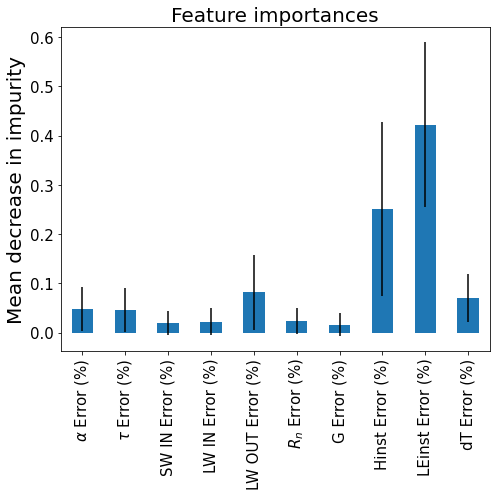

In [257]:
importances=pd.Series(grid_search.best_estimator_.feature_importances_)
feature_names=[r'$ \alpha $'+" Error (%)",r'$ \tau $'+" Error (%)","SW IN Error (%)","LW IN Error (%)","LW OUT Error (%)","$R_n$ Error (%)","G Error (%)","Hinst Error (%)","LEinst Error (%)","dT Error (%)"]
forest_importances = importances.set_axis(feature_names)
std = np.std([tree.feature_importances_ for tree in grid_search.best_estimator_], axis=0)
fig, ax = plt.subplots(figsize=(7,7))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances",fontsize=20)
ax.set_ylabel("Mean decrease in impurity",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

fig.tight_layout()

ModuleNotFoundError: No module named 'seaborn'